In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


In [ ]:
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import word_tokenize
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('all')




# Download the 'punkt' tokenizer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Language_Research/Dataset/Final Dataset/Normal/Final_Dataset.xlsx')




In [ ]:
data

content  category
0     কবি মহাদেৱ সাহাই ১৯৬০ চনত বগড়াৰ ধনুট হাইস্কুল...  Assamese
1     মহাদেৱ সাহা বাংলা সাহিত্য আৰু কবিতাৰ জগতৰ অন্য...  Assamese
2     শৈশৱত ফুলেজোৰা নদীৰ পাৰত ডাঙৰ-দীঘল হোৱা মহাদেৱ...  Assamese
3     এই সাধাৰণ জীৱনত যে কিছু জটিলতা আছে জানেনে? - প...  Assamese
4     মেহৰাজ চাহাবৰ লগত মোৰ বহুত ভাল সম্পৰ্ক আছে। ঘৈ...  Assamese
...                                                 ...       ...
9231  ” ভৈরবী মানখাই বিনি য়াক রমাই ফান' কইখাম', ফিয...  Kokborok
9232   বন' খেম কতরমানি মৗথাংগীই লাকাই খাইমান' কিসা ল...  Kokborok
9233   চাথায় - চামানি মানীয়, চামুঙ বীথাই, চানা বাগ...  Kokborok
9234  জেথানি থানি বরক কুথুমরাই বুজিরীখা, পানদা খালাই...  Kokborok
9235   বুজিস্লাপ মানলিয়া, থত মত' খাই ব’ সাংফিখা, “ত...  Kokborok

[9236 rows x 2 columns]

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
data = data.sample(frac=1).reset_index(drop=True)


In [ ]:
data

content      category
0     একসপ্তাহ পর কল দিই ,   ‘ হ্যাঁলো রুমকি ,  আমি ...        Bangla
1     তঁই মইনদ্দিনঅর লয় ইয়ান-উইয়ান হতা হঁইতে হঁইতে এ...  Chittagonian
2     আমাকে ভালবাসার পর আর কিছুই আগের মত থাকবে না তো...        Bangla
3     তিনু, ধ্যানেশ এবং ইউনিস তৈরি করা দুর্ঘটনায় পড...        Bangla
4      ইতাল্লাই ইবে ২০০ জাআজ লই ওগ্গ বাহিনী বানাইয়ে...        Chakma
...                                                 ...           ...
9231  য়াসি চকফানক, খাজু খাবরক খানাইজীকনি বাগীই অ খু...      Kokborok
9232  ” রামবাহাদুর বিহিকনি খুকনি ককন সীনামাই সাখা, “...      Kokborok
9233  তিন্নো চেরবো দল অলাক পারং হলে পারন এক্কা যুদি ...        Chakma
9234  সেইটো লৈ আপুনি চিন্তা কৰাৰ কোনো কাৰণ নাই। ডাক্...      Assamese
9235  পুরোন দিনর হদা জুড়ি,মনান মর যার উড়ি, রিপরিপ্যে...        Chakma

[9236 rows x 2 columns]

In [ ]:

print("Total Contents:",len(data),
      "\nTotal Assamese Contents:",len(data[data.category =='Assamese']),
      "\nTotal Bangla Contents:",len(data[data.category=='Bangla']),
      "\nTotal Chakma Contents:",len(data[data.category =='Chakma']),
      "\nTotal Chittagonian Contents:",len(data[data.category=='Chittagonian']),
      "\nTotal Kokborok Contents:",len(data[data.category =='Kokborok']))

Total Contents: 9236 
Total Assamese Contents: 2132 
Total Bangla Contents: 1842 
Total Chakma Contents: 1647 
Total Chittagonian Contents: 1874 
Total Kokborok Contents: 1741


In [ ]:
# print some unprocessed reviews

print("Some Unprocessed Reviews")
print("\n")

sample_data = [ 1500, 2500,  5000]
for i in sample_data:
      print(data.content[i],'\n','Language:-- ',data.category[i],'\n')

Some Unprocessed Reviews


সে দ্রুত বুড়ির কাছে মুখ নিয়ে গিয়ে জিজ্ঞাসা করল, কি হয়েছে তোমার ? অমন করছ কেন ? ’ বুড়ি একবারও নির্মলের ওপর থেকে দৃষ্টি সরায়নি । সেই অবস্থায় বিড়বিড় করে বলতে লাগল, ‘দেওতা, মেরি দেওতা আ গিয়া । ব্যস । ব্যস । ’ অবাক লাবণ্য সেখান থেকেই মুখ ঘুরিয়ে নির্মলের দিকে তাকাল । হাত দুয়েক দূরে হতভম্ব নির্মল দাঁড়িয়ে । কিন্তু পেছনের নীল আকাশের চালচিত্রে নির্মলকে তার এক অনিন্দ্যসুন্দর পুরুষ বলে মনে হল । আর তখনই নির্মল জিজ্ঞাসা করল, ‘কি ব্যাপার বলুন তো ? ’লাবণ্য হেসে সোজা হয়ে দাঁড়াল, ‘আপনি সত্যি সুন্দর । একটু বেশি সুন্দর । ’ লজ্জা পেল নির্মল, ‘কি আজেবাজে বকছেন । ’‘নইলে ও আপনাকে দেবতা বলে ভাবত না । ’ লাবণ্য হাসল, ‘দেবতা সবসময় ভক্তকে রক্ষা করে । অতএব ওকে কাঁধে তুলুন । ’ একটু ইতস্তত করে বুড়ির শরীরটাকে যখন নির্মল কাঁধে তুলে নিল তখন সেই দুর্বল কণ্ঠ প্রায় চিৎকার করে যাচ্ছে, ‘দেওতা, দেওতা, দেওতা । 
 Language:--  Bangla 

 তুমি যারা য়ুত থোবেও তুমিও তা’ সান্যান বিজ্ঞানী ওবার চেও।  নির্বাণ অলদে বুদ্ধ ধর্মর আঝল আহ্ বেগতুন ডাঙর চানাহ্ (লক্ষ্য)।  তর মরা হিজেক্ এব' মিলে ন' যা

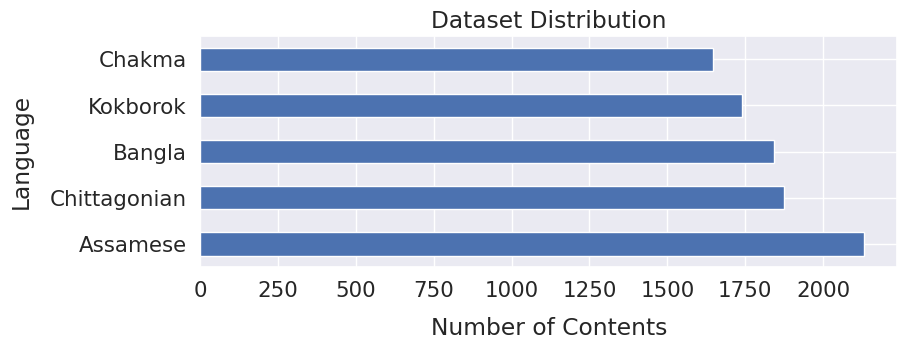

In [ ]:
sns.set(font_scale=1.4)
data['category'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Contents", labelpad=12)
plt.ylabel("Language", labelpad=12)
plt.yticks(rotation = 0)
plt.title("Dataset Distribution", y=1);

In [ ]:
import pandas as pd


# Assume 'class_label' is the column containing class labels
class_labels = data['category']

# Calculate class distribution
class_distribution = class_labels.value_counts()
print(class_distribution)


category
Assamese        2132
Chittagonian    1874
Bangla          1842
Kokborok        1741
Chakma          1647
Name: count, dtype: int64


<ipython-input-15-85ad6a237a45>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


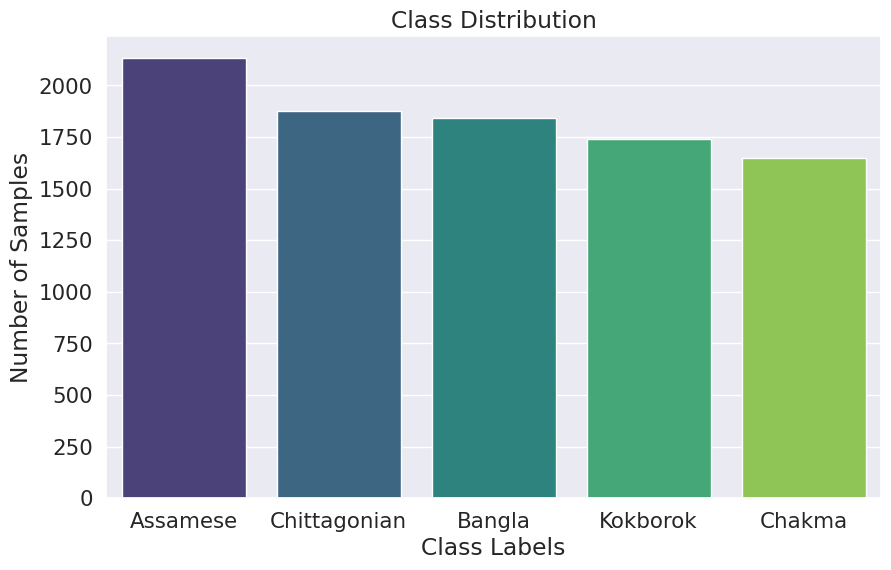

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


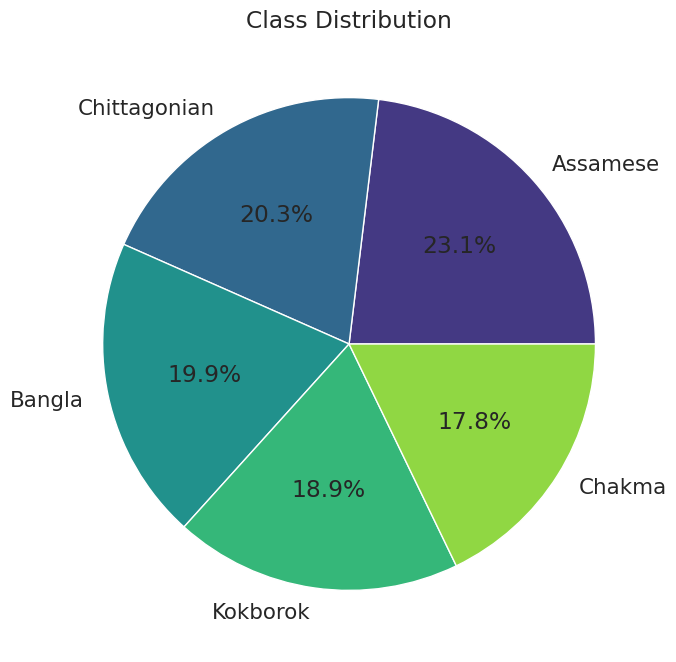

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(class_distribution)))
plt.title('Class Distribution')
plt.show()


<ipython-input-166-ab4cb8165503>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=class_distribution.index, x=class_distribution.values, palette='viridis')


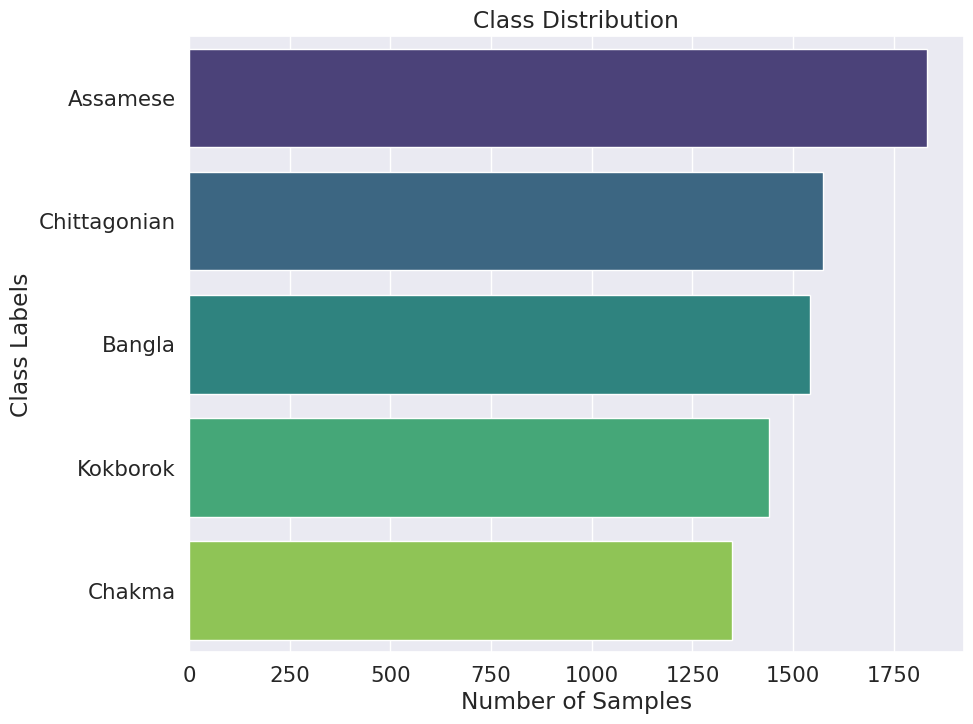

In [ ]:

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(y=class_distribution.index, x=class_distribution.values, palette='viridis')
plt.ylabel('Class Labels')
plt.xlabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


## **Data Cleaning**

In [ ]:
# Data cleaning function
def process_content(content):
    content = re.sub('[^\u0980-\u09FFa-zA-Z]',' ',str(content)) #removing unnecessary punctuation
    return content

In [ ]:
data

content  category
0     তাতোকৈ আচৰিত কথাটো হ’ল তেওঁলোকৰ লণ্ডনত এটা ঘৰ ...  Kokborok
1     লগ পাব গায়কক। মই ভবা নাছিলো যে স্বীকৃতি কিমান...  Kokborok
2     মই তোমাৰ লগত খেলা নকৰো মই তোমাৰ পেঁপা নাখাম। আ...  Kokborok
3     মিনহাজুল আবেদিন বাংলাদেশ ক্ৰিকেটৰ ইতিহাসৰ অন্য...  Kokborok
4     কপালত বিৰিয়ানী নাই আৰু কি কৰিব।  ঠিকেই কৈছে, ...  Kokborok
...                                                 ...       ...
7731  ইতিমধ্যে নির্মলের কাছে দুই বিপরীত মানসিকতার পা...    Bangla
7732  হয়তো মহিলা বলেই এখনও সে কিছুটা কাজ করে যেতে প...    Bangla
7733  । কিছু অরাজনৈতিক ছেলেমেয়েকে নিয়ে কাজ শুরু কর...    Bangla
7734  এখন সে প্যান্ট আর সার্টের ওপর ভরসা রেখেছে । শা...    Bangla
7735  লিফটের  দরজাটা খুলে সন্তর্পণে যে লোকটি নামলতার...    Bangla

[7736 rows x 2 columns]

In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['content'].apply(process_content)

# print some cleaned reviews from the dataset
sample_data = [1500, 2500,  5000]
for i in sample_data:
     print('Original:\n',data.content[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Category:-- ',data.category[i],'\n')

Original:
 ক্ৰিকেট ব’ৰ্ডক ব্যক্তিগত কথা ক’লেও সেয়া কোনো গোপন কথা নহয়, সংবাদ মাধ্যমলৈ আহে। তামিম ইকবালে দাবী কৰে যে ক্ৰিকেটাৰ এজনে ক্ৰিকেট ব’ৰ্ডক ব্যক্তিগত বিষয়ৰ বিষয়ে কিবা এটা ক’লেও সংবাদ মাধ্যমৰ ওচৰলৈ আহে। গতিকে ক্ৰিকেটাৰসকলে একো শ্বেয়াৰ কৰি সুস্থ হ’ব নোৱাৰে। কেতিয়াবা সকলো সংবাদ মাধ্যমৰ ওচৰলৈ সকলো আহে। কিন্তু জালাল ইউনুছৰ ওপৰত তামিমৰ বিশ্বাস আছে। আৰু সেয়ে তামিমে অৱসৰৰ কাৰণবোৰ ব’ৰ্ডৰ বৈঠকত তেওঁকহে ক’ব বিচাৰে। এই সন্দৰ্ভত তমিমে কয়, "জালাল ভাইৰ ওপৰত মোৰ বিশ্বাস আছে।" আগতেও বহু কথা কৈছিলো। তেওঁ ইচ্ছা কৰিলে বৰ্ডত আন কাৰোবাক যোগ কৰিব পাৰে। 
Cleaned:
 ক্ৰিকেট ব ৰ্ডক ব্যক্তিগত কথা ক লেও সেয়া কোনো গোপন কথা নহয়  সংবাদ মাধ্যমলৈ আহে  তামিম ইকবালে দাবী কৰে যে ক্ৰিকেটাৰ এজনে ক্ৰিকেট ব ৰ্ডক ব্যক্তিগত বিষয়ৰ বিষয়ে কিবা এটা ক লেও সংবাদ মাধ্যমৰ ওচৰলৈ আহে  গতিকে ক্ৰিকেটাৰসকলে একো শ্বেয়াৰ কৰি সুস্থ হ ব নোৱাৰে  কেতিয়াবা সকলো সংবাদ মাধ্যমৰ ওচৰলৈ সকলো আহে  কিন্তু জালাল ইউনুছৰ ওপৰত তামিমৰ বিশ্বাস আছে  আৰু সেয়ে তামিমে অৱসৰৰ কাৰণবোৰ ব ৰ্ডৰ বৈঠকত তেওঁকহে ক ব বিচাৰে  এই সন্দৰ্ভত তমিমে কয়   জালাল ভ

In [ ]:
data

content  category  \
0     তাতোকৈ আচৰিত কথাটো হ’ল তেওঁলোকৰ লণ্ডনত এটা ঘৰ ...  Kokborok   
1     লগ পাব গায়কক। মই ভবা নাছিলো যে স্বীকৃতি কিমান...  Kokborok   
2     মই তোমাৰ লগত খেলা নকৰো মই তোমাৰ পেঁপা নাখাম। আ...  Kokborok   
3     মিনহাজুল আবেদিন বাংলাদেশ ক্ৰিকেটৰ ইতিহাসৰ অন্য...  Kokborok   
4     কপালত বিৰিয়ানী নাই আৰু কি কৰিব।  ঠিকেই কৈছে, ...  Kokborok   
...                                                 ...       ...   
7731  ইতিমধ্যে নির্মলের কাছে দুই বিপরীত মানসিকতার পা...    Bangla   
7732  হয়তো মহিলা বলেই এখনও সে কিছুটা কাজ করে যেতে প...    Bangla   
7733  । কিছু অরাজনৈতিক ছেলেমেয়েকে নিয়ে কাজ শুরু কর...    Bangla   
7734  এখন সে প্যান্ট আর সার্টের ওপর ভরসা রেখেছে । শা...    Bangla   
7735  লিফটের  দরজাটা খুলে সন্তর্পণে যে লোকটি নামলতার...    Bangla   

                                                cleaned  
0     তাতোকৈ আচৰিত কথাটো হ ল তেওঁলোকৰ লণ্ডনত এটা ঘৰ ...  
1     লগ পাব গায়কক  মই ভবা নাছিলো যে স্বীকৃতি কিমান...  
2     মই তোমাৰ লগত খেলা নকৰো মই তোমাৰ পেঁপা নাখাম  আ...  
3     মিনহাজুল আবেদিন বাংলাদেশ ক্ৰিকেটৰ ইতিহাসৰ অন্য...  
4     কপালত বিৰিয়ানী নাই আৰু কি কৰিব   ঠিকেই কৈছে  ...  
...                                                 ...  
7731  ইতিমধ্যে নির্মলের কাছে দুই বিপরীত মানসিকতার পা...  
7732  হয়তো মহিলা বলেই এখনও সে কিছুটা কাজ করে যেতে প...  
7733    কিছু অরাজনৈতিক ছেলেমেয়েকে নিয়ে কাজ শুরু কর...  
7734  এখন সে প্যান্ট আর সার্টের ওপর ভরসা রেখেছে   শা...  
7735  লিফটের  দরজাটা খুলে সন্তর্পণে যে লোকটি নামলতার...  

[7736 rows x 3 columns]

In [ ]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))




# Remove the reviews with least words
dataset = data.loc[(data.length > 59) & (data.length < 151)]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small contents".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))


After Cleaning: 
Removed 291 Small contents 
Total Reviews: 7445


In [ ]:
dataset

content  category  \
0     তাতোকৈ আচৰিত কথাটো হ’ল তেওঁলোকৰ লণ্ডনত এটা ঘৰ ...  Kokborok   
1     লগ পাব গায়কক। মই ভবা নাছিলো যে স্বীকৃতি কিমান...  Kokborok   
2     মই তোমাৰ লগত খেলা নকৰো মই তোমাৰ পেঁপা নাখাম। আ...  Kokborok   
3     মিনহাজুল আবেদিন বাংলাদেশ ক্ৰিকেটৰ ইতিহাসৰ অন্য...  Kokborok   
4     কপালত বিৰিয়ানী নাই আৰু কি কৰিব।  ঠিকেই কৈছে, ...  Kokborok   
...                                                 ...       ...   
7440  ইতিমধ্যে নির্মলের কাছে দুই বিপরীত মানসিকতার পা...    Bangla   
7441  হয়তো মহিলা বলেই এখনও সে কিছুটা কাজ করে যেতে প...    Bangla   
7442  । কিছু অরাজনৈতিক ছেলেমেয়েকে নিয়ে কাজ শুরু কর...    Bangla   
7443  এখন সে প্যান্ট আর সার্টের ওপর ভরসা রেখেছে । শা...    Bangla   
7444  লিফটের  দরজাটা খুলে সন্তর্পণে যে লোকটি নামলতার...    Bangla   

                                                cleaned  length  
0     তাতোকৈ আচৰিত কথাটো হ ল তেওঁলোকৰ লণ্ডনত এটা ঘৰ ...      70  
1     লগ পাব গায়কক  মই ভবা নাছিলো যে স্বীকৃতি কিমান...      87  
2     মই তোমাৰ লগত খেলা নকৰো মই তোমাৰ পেঁপা নাখাম  আ...      71  
3     মিনহাজুল আবেদিন বাংলাদেশ ক্ৰিকেটৰ ইতিহাসৰ অন্য...     120  
4     কপালত বিৰিয়ানী নাই আৰু কি কৰিব   ঠিকেই কৈছে  ...      73  
...                                                 ...     ...  
7440  ইতিমধ্যে নির্মলের কাছে দুই বিপরীত মানসিকতার পা...     136  
7441  হয়তো মহিলা বলেই এখনও সে কিছুটা কাজ করে যেতে প...     141  
7442    কিছু অরাজনৈতিক ছেলেমেয়েকে নিয়ে কাজ শুরু কর...     133  
7443  এখন সে প্যান্ট আর সার্টের ওপর ভরসা রেখেছে   শা...     135  
7444  লিফটের  দরজাটা খুলে সন্তর্পণে যে লোকটি নামলতার...     137  

[7445 rows x 4 columns]

In [ ]:
# Assume 'class_label' is the column containing class labels
class_labels = dataset['category']

# Calculate class distribution
class_distribution = class_labels.value_counts()
print(class_distribution)

category
Assamese        1693
Chittagonian    1535
Bangla          1473
Kokborok        1416
Chakma          1328
Name: count, dtype: int64


In [ ]:
def data_summary(dataset):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)



Class Name :  Assamese
Number of Documents:1693
Number of Words:171707
Number of Unique Words:24389
Most Frequent Words:

আৰু	1897
ল	1593
মই	1547
ক	1469
হ	1193
এই	1186
মোৰ	1179
লে	1178
তেওঁ	1145
নাই	1142

Class Name :  Chittagonian
Number of Documents:1535
Number of Words:149502
Number of Unique Words:31971
Most Frequent Words:

ন	3010
আর	1100
দে	1073
আঁই	1053
গরি	1032
কি	961
তো	947
আঁর	901
না	828
গরে	688

Class Name :  Bangla
Number of Documents:1473
Number of Words:147173
Number of Unique Words:21284
Most Frequent Words:

না	2749
করে	1494
আমি	1213
আমার	1115
আর	1007
এই	980
তার	887
ও	885
কি	851
থেকে	848

Class Name :  Kokborok
Number of Documents:1416
Number of Words:138906
Number of Unique Words:28488
Most Frequent Words:

সাখা	1473
খাই	1349
ব	1280
কক	1274
বিনি	1235
তাই	1106
অ	926
তাম	790
আঙ	786
সামপারি	652

Class Name :  Chakma
Number of Documents:1328
Number of Words:125297
Number of Unique Words:30024
Most Frequent Words:

ন	2126
আর	824
তুই	703
গরি	653
মুই	648
তা	606
সে	576
কি	515

<ipython-input-175-099026cc9f6c>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(class_names, rotation=0);


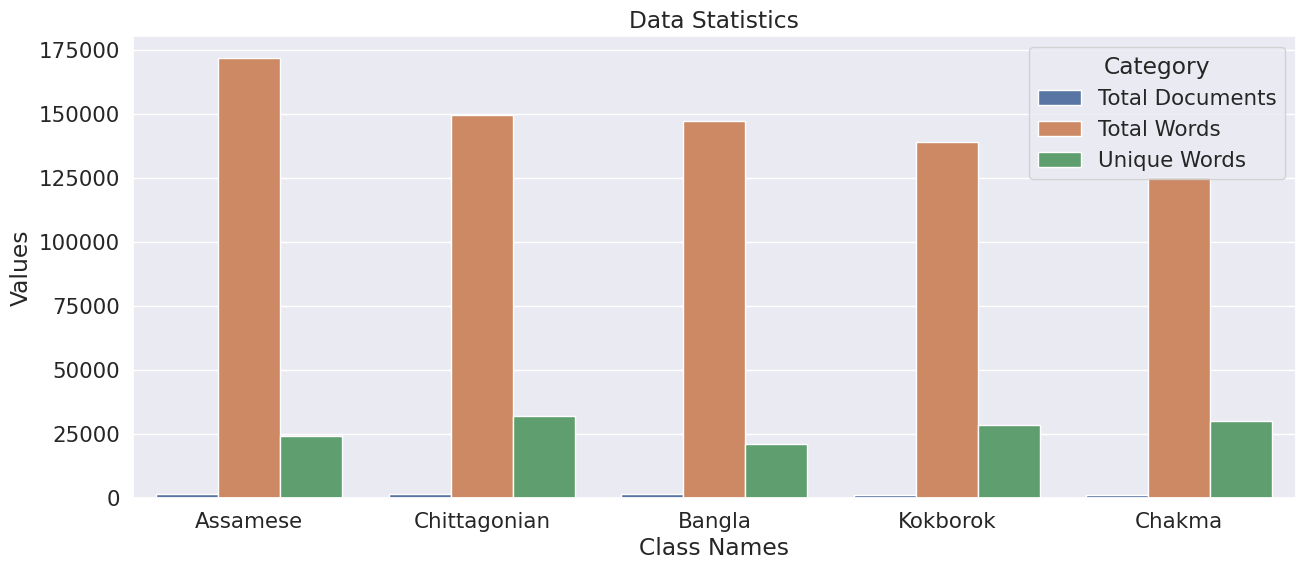

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(15, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=0);

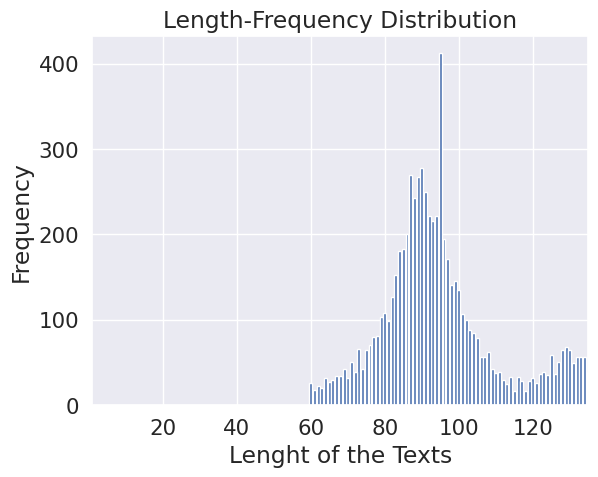

Maximum Length of a review: 150
Minimum Length of a review: 60
Average Length of a reviews: 98.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

In [ ]:
Assamese = dataset[dataset.category == 'Assamese']
Bangla = dataset[dataset.category == 'Bangla']
Chittagonian = dataset[dataset.category == 'Chittagonian']
Chakma = dataset[dataset.category == 'Chakma']
Kokborok = dataset[dataset.category == 'Kokborok']

dataset.category.value_counts()

category
Assamese        1693
Chittagonian    1535
Bangla          1473
Kokborok        1416
Chakma          1328
Name: count, dtype: int64

In [ ]:
dataset

content  category  \
0     তাতোকৈ আচৰিত কথাটো হ’ল তেওঁলোকৰ লণ্ডনত এটা ঘৰ ...  Kokborok   
1     লগ পাব গায়কক। মই ভবা নাছিলো যে স্বীকৃতি কিমান...  Kokborok   
2     মই তোমাৰ লগত খেলা নকৰো মই তোমাৰ পেঁপা নাখাম। আ...  Kokborok   
3     মিনহাজুল আবেদিন বাংলাদেশ ক্ৰিকেটৰ ইতিহাসৰ অন্য...  Kokborok   
4     কপালত বিৰিয়ানী নাই আৰু কি কৰিব।  ঠিকেই কৈছে, ...  Kokborok   
...                                                 ...       ...   
7440  ইতিমধ্যে নির্মলের কাছে দুই বিপরীত মানসিকতার পা...    Bangla   
7441  হয়তো মহিলা বলেই এখনও সে কিছুটা কাজ করে যেতে প...    Bangla   
7442  । কিছু অরাজনৈতিক ছেলেমেয়েকে নিয়ে কাজ শুরু কর...    Bangla   
7443  এখন সে প্যান্ট আর সার্টের ওপর ভরসা রেখেছে । শা...    Bangla   
7444  লিফটের  দরজাটা খুলে সন্তর্পণে যে লোকটি নামলতার...    Bangla   

                                                cleaned  length  ReviewLength  
0     তাতোকৈ আচৰিত কথাটো হ ল তেওঁলোকৰ লণ্ডনত এটা ঘৰ ...      70            70  
1     লগ পাব গায়কক  মই ভবা নাছিলো যে স্বীকৃতি কিমান...      87            87  
2     মই তোমাৰ লগত খেলা নকৰো মই তোমাৰ পেঁপা নাখাম  আ...      71            71  
3     মিনহাজুল আবেদিন বাংলাদেশ ক্ৰিকেটৰ ইতিহাসৰ অন্য...     120           120  
4     কপালত বিৰিয়ানী নাই আৰু কি কৰিব   ঠিকেই কৈছে  ...      73            73  
...                                                 ...     ...           ...  
7440  ইতিমধ্যে নির্মলের কাছে দুই বিপরীত মানসিকতার পা...     136           136  
7441  হয়তো মহিলা বলেই এখনও সে কিছুটা কাজ করে যেতে প...     141           141  
7442    কিছু অরাজনৈতিক ছেলেমেয়েকে নিয়ে কাজ শুরু কর...     133           133  
7443  এখন সে প্যান্ট আর সার্টের ওপর ভরসা রেখেছে   শা...     135           135  
7444  লিফটের  দরজাটা খুলে সন্তর্পণে যে লোকটি নামলতার...     137           137  

[7445 rows x 5 columns]

In [ ]:
data = dataset.drop(columns=['content', 'ReviewLength'])

In [ ]:
data.rename(columns={'cleaned': 'content'}, inplace=True)
data

category                                            content  length
0     Kokborok  তাতোকৈ আচৰিত কথাটো হ ল তেওঁলোকৰ লণ্ডনত এটা ঘৰ ...      70
1     Kokborok  লগ পাব গায়কক  মই ভবা নাছিলো যে স্বীকৃতি কিমান...      87
2     Kokborok  মই তোমাৰ লগত খেলা নকৰো মই তোমাৰ পেঁপা নাখাম  আ...      71
3     Kokborok  মিনহাজুল আবেদিন বাংলাদেশ ক্ৰিকেটৰ ইতিহাসৰ অন্য...     120
4     Kokborok  কপালত বিৰিয়ানী নাই আৰু কি কৰিব   ঠিকেই কৈছে  ...      73
...        ...                                                ...     ...
7440    Bangla  ইতিমধ্যে নির্মলের কাছে দুই বিপরীত মানসিকতার পা...     136
7441    Bangla  হয়তো মহিলা বলেই এখনও সে কিছুটা কাজ করে যেতে প...     141
7442    Bangla    কিছু অরাজনৈতিক ছেলেমেয়েকে নিয়ে কাজ শুরু কর...     133
7443    Bangla  এখন সে প্যান্ট আর সার্টের ওপর ভরসা রেখেছে   শা...     135
7444    Bangla  লিফটের  দরজাটা খুলে সন্তর্পণে যে লোকটি নামলতার...     137

[7445 rows x 3 columns]

In [ ]:
pip install wordcloud matplotlib pandas


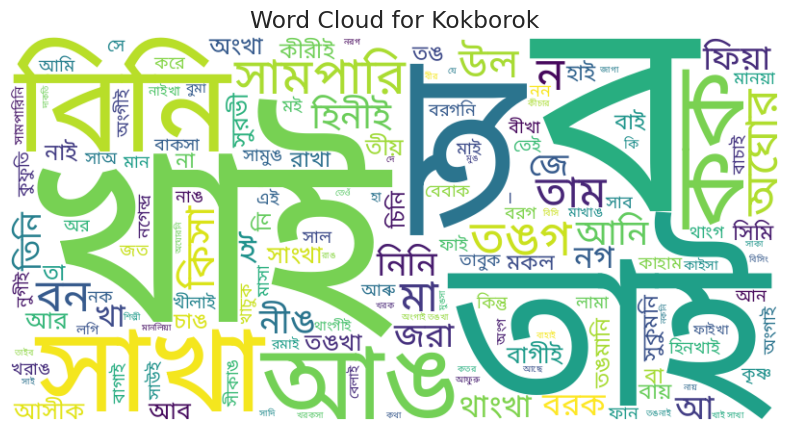

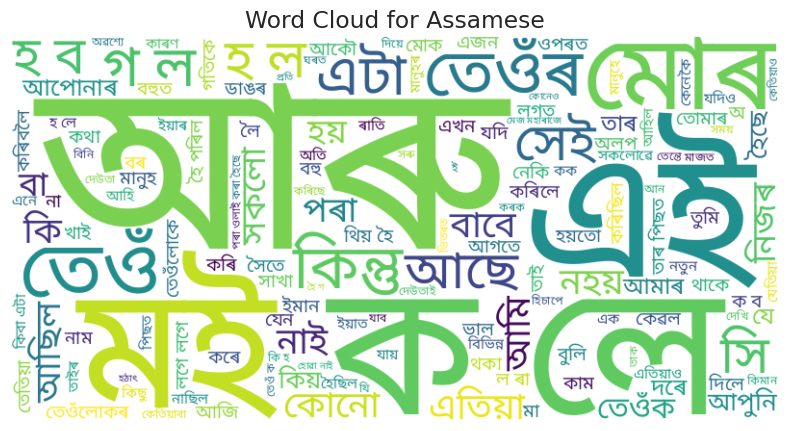

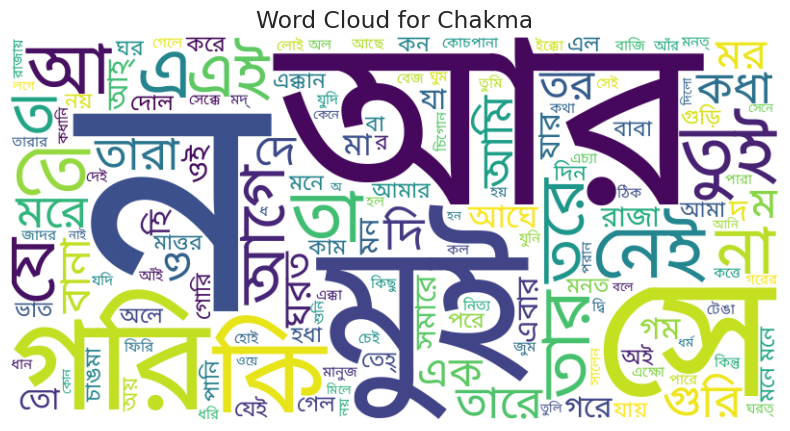

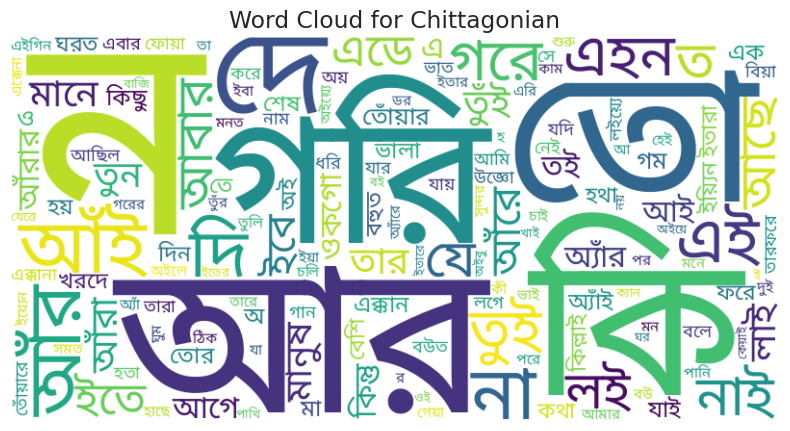

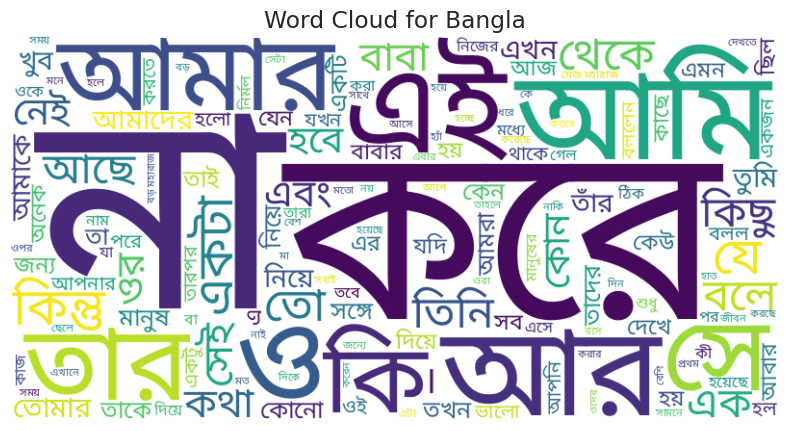

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to preprocess the text (simple cleaning)
def preprocess_text(text):
    # Remove unnecessary spaces and ensure basic cleaning (if needed)
    return ' '.join(text.split())

# Function to generate word cloud for a specific language category
def generate_wordcloud(text, category, font_path):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis', font_path=font_path,
                          regexp=r'[^\s]+', max_words=150).generate(text)

    # Plotting the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category}")
    plt.show()

# Path to a Unicode font that supports the languages
font_path = '/content/drive/MyDrive/Language_Research/NotoSansBengali-VariableFont_wdth,wght.ttf'

# Group by category and generate word cloud for each
for category in data['category'].unique():
    # Get all the content for the current category
    text = " ".join(data[data['category'] == category]['content'])

    # Preprocess the text to clean it up (optional)
    processed_text = preprocess_text(text)

    # Generate the word cloud with the custom font
    generate_wordcloud(processed_text, category, font_path)


In [ ]:

# Extract the texts and labels
texts = data['content'].values
labels = data['category'].values

In [ ]:
def preprocess_text(text):
    # Convert the input to a string (if it's not already) and handle NaN values
    if isinstance(text, float):
        return ""  # Return an empty string for NaN values or floats
    # Convert to lowercase, remove punctuation, etc.
    text = re.sub(r'[^\w\s\u0980-\u09FF]', '', text)
    return word_tokenize(text)

# # Apply preprocessing
# texts = [preprocess_text(text) for text in texts]

In [ ]:
reviews_lines1=list()
lines= data['content'].values.tolist()

for line in lines:
  tokens=word_tokenize(line)

  reviews_lines1.append(tokens)

In [ ]:
len(reviews_lines1)

7445

In [ ]:
import gensim
EMBEDDING_DIM=100
min_count = 5
window = 3
negative = 5
epochs = 10
alpha = 0.1
model=gensim.models.Word2Vec(sentences=reviews_lines1,\
                             vector_size=EMBEDDING_DIM, window=window,negative= negative, alpha=alpha, epochs= epochs, min_count=min_count)

In [ ]:
words = list(model.wv.index_to_key)


In [ ]:
len(words)

19856

In [ ]:
model.wv.most_similar("আমাদের")

[('পেয়েছে', 0.5001409649848938),
 ('দাঁড়াতে', 0.4919992983341217),
 ('নিতান্তই', 0.49119293689727783),
 ('এঁদের', 0.488650918006897),
 ('সনাতননাথ', 0.4852811098098755),
 ('ওঁর', 0.4762405455112457),
 ('সৌরজগৎ', 0.4742417335510254),
 ('গেলেই', 0.46731892228126526),
 ('নিজেদের', 0.4646965265274048),
 ('তাদের', 0.4629386365413666)]

In [ ]:
similarity_score = model.wv.similarity("স্কুল", "ইস্কুল")
print(similarity_score)


0.39112753


In [ ]:
filename = '/content/drive/MyDrive/Language_Research/Embedding_Models/Word2Vec_1.txt'
model.wv.save_word2vec_format(filename, binary=False)

# **Load the Trained Embedding Models**

In [ ]:
import os
embedding_index={}

f = open('/content/drive/MyDrive/Language_Research/Embedding_Models/Word2Vec_1.txt',encoding='utf-8')
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:])
  embedding_index[word]=coefs

f.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Initialize the label encoder
label_encoder = LabelEncoder()

# Convert string labels (e.g., 'A', 'B', etc.) to integers
encoded_labels = label_encoder.fit_transform(labels)

# Now convert the integer labels to one-hot encoding
y = to_categorical(encoded_labels, num_classes=5)  # Assuming 5 classes

# Check if the labels have been correctly transformed
print(f"Encoded labels: {encoded_labels}")
print(f"One-hot encoded labels shape: {y.shape}")

Encoded labels: [4 4 4 ... 1 1 1]
One-hot encoded labels shape: (7445, 5)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Initialize the Tokenizer
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(reviews_lines1)

# Convert texts to sequences of integers
sequences = tokenizer_obj.texts_to_sequences(reviews_lines1)

# Define maximum length for padding
max_length = 200

word_index=tokenizer_obj.word_index

# Pad sequences to ensure uniform input size
review_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare sentiment labels
sentiment = y

# Print the shape of the padded sequences and sentiment labels
print("Padded reviews shape:", review_pad.shape)
print("Sentiment shape:", sentiment.shape)

# Shuffle the dataset
indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)

# Apply the shuffle to the data
review_pad = review_pad[indices]
sentiment = sentiment[indices]

# Now review_pad and sentiment can be used directly for training
X_train_pad = review_pad
y_train = sentiment

print("Training reviews shape:", X_train_pad.shape)
print("Training sentiment shape:", y_train.shape)


Padded reviews shape: (7445, 200)
Sentiment shape: (7445, 5)
Training reviews shape: (7445, 200)
Training sentiment shape: (7445, 5)


In [ ]:
# TEST_SPLIT=0.20
# num_test_samples = int(TEST_SPLIT*X_train_pad.shape[0])



# X_train_pad=X_train_pad[num_test_samples:]
# y_train= y_train[num_test_samples:]

# x_test_pad= X_train_pad[:num_test_samples]
# y_test= y_train[:num_test_samples]


In [ ]:
# Step 2: Perform a stratified split for train, validation, and test sets
# First, split into train+val and test (80% train+val, 20% test)
X_train_pad, X_test_pad, y_train, y_test = train_test_split(
    review_pad, sentiment, test_size=0.20, stratify=sentiment, random_state=42
)

# Then split train+val into train and validation (75% train, 25% validation)
X_train_pad, X_val_pad, y_train, y_val = train_test_split(
    X_train_pad, y_train, test_size=0.25, stratify=y_train, random_state=42
)

# Output the shapes of the data to check the splits
print("Train data shape:", X_train_pad.shape, y_train.shape)
print("Validation data shape:", X_val_pad.shape, y_val.shape)
print("Test data shape:", X_test_pad.shape, y_test.shape)

Train data shape: (4467, 200) (4467, 5)
Validation data shape: (1489, 200) (1489, 5)
Test data shape: (1489, 200) (1489, 5)


In [ ]:
# # Perform a stratified split into train and test sets (e.g., 80% train, 20% test)
# from sklearn.model_selection import train_test_split

# X_train_pad, X_test_pad, y_train, y_test = train_test_split(
#     review_pad, sentiment, test_size=0.30, stratify=sentiment, random_state=42
# )

# # Output the shapes of the data to check the split
# print("Train data shape:", X_train_pad.shape, y_train.shape)
# print("Test data shape:", X_test_pad.shape, y_test.shape)


In [ ]:
print(X_train_pad.shape)
print(y_train.shape)
print(X_val_pad.shape)
print(y_val.shape)
print(X_test_pad.shape)
print(y_test.shape)

(4467, 200)
(4467, 5)
(1489, 200)
(1489, 5)
(1489, 200)
(1489, 5)


In [ ]:
y_test

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
EMBEDDING_DIM=100
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,EMBEDDING_DIM))

for word, i in word_index.items():
  if i>num_words:
    continue
  embedding_vector=embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [ ]:
num_words

95159

In [ ]:
EMBEDDING_DIM

100

In [ ]:
max_length

200

In [ ]:
X_train_pad[5]

array([ 2433, 49533,   111, 13153, 74078,  3636, 11836, 14352, 74079,
       49547, 49548,   774, 74080,  2433, 24285,   148,  3651, 14352,
        7389, 74081, 31729,    60,    79,  3006,  7606,    53, 14108,
       12491,    94,  7768,   821,  8147, 74082,  3636,  7606,  7898,
         963,    23, 25879,  1049,   148, 74083, 19590,     5, 74084,
       74085,    94,    79,  7389,    94,  3006,  1380,  8616,     5,
        5509, 16190, 14352,  7389, 26215,   574,    93,  1548,    79,
        7300, 13143, 74086,  7606,  9180,  1122,  3286, 74087,  4686,
        5079,    28, 74088, 11394,  6315,    28,  1446,   343, 14352,
       49171,   155,     6,  4854,   110, 74089,  1879, 24288, 17399,
        1281,  1353,   178,   481,  3994,    26,    57,  5119,  1409,
        2575,  3765, 74090,    26,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.56325996,  0.49181303,  1.7166286 , ..., -0.4130674 ,
        -0.49704722,  0.55331296],
       [-0.659753  ,  0.16710128,  0.74547476, ...,  0.42308536,
         0.04150053,  0.37115824],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# **CNN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

def build_model():
    num_classes = 5         # Number of classes for classification
    filters = 128           # Number of filters in the Conv1D layer
    kernel_sizes = [3, 4, 5]  # Kernel sizes for Conv1D

    # Input layer
    input = Input(shape=(max_length,), dtype='int32')

    # Add embedding layer
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=EMBEDDING_DIM,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input)  # Apply the input tensor here

    # Convolutional and Max-Pooling layers
    conv_pools = []
    for kernel_size in kernel_sizes:
        conv = Conv1D(filters=filters,
                      kernel_size=kernel_size,
                      activation='relu')(embedding_layer)
        pool = MaxPooling1D(pool_size=max_length - kernel_size + 1)(conv)
        conv_pools.append(pool)

    # Concatenate pooled features
    concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

    # Flatten and add fully connected layers
    flat = Flatten()(concat)
    dense = Dense(128, activation='relu')(flat)
    output = Dense(num_classes, activation='softmax')(dense)

    # Create and compile the model
    model = Model(inputs=input, outputs=output)

    optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer= optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Summary of the model
# model.summary()

# Build the model with the input shape
# model.build(input_shape=(None, max_length))

# # Optionally, visualize the model architecture
# plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)



In [ ]:
from sklearn.model_selection import KFold
import time


# Define number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Prepare your results
fold_accuracies = []

start_time = time.time()

for fold, (train_index, val_index) in enumerate(kf.split(X_train_pad, y_train), 1):
    print(f"Training fold {fold}...")

    # Reinitialize the model for this fold
    model = build_model()

    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train_pad[train_index], X_train_pad[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the model
    history_cnn = model.fit(X_train_fold, y_train_fold, batch_size=16, epochs=10, validation_data=(X_val_fold, y_val_fold), verbose=2)

    # Evaluate the model
    score,acc=model.evaluate(X_test_pad,y_test,batch_size=128)
    accuracy = acc
    print(f"Fold {fold} accuracy: {accuracy:.4f}")


    fold_accuracies.append(accuracy)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for k-fold cross-validation: {elapsed_time} seconds")

# Calculate and print average accuracy across all folds
average_accuracy = sum(fold_accuracies) / k
print(f"Average accuracy across all folds: {average_accuracy:.4f}")

Training fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
224/224 - 15s - 69ms/step - accuracy: 0.8455 - loss: 0.5236 - val_accuracy: 0.8960 - val_loss: 0.4220
Epoch 2/10
224/224 - 14s - 62ms/step - accuracy: 0.8981 - loss: 0.2887 - val_accuracy: 0.8870 - val_loss: 0.4513
Epoch 3/10
224/224 - 15s - 67ms/step - accuracy: 0.9183 - loss: 0.2188 - val_accuracy: 0.8736 - val_loss: 0.4974
Epoch 4/10
224/224 - 18s - 82ms/step - accuracy: 0.9303 - loss: 0.1860 - val_accuracy: 0.8557 - val_loss: 0.6213
Epoch 5/10
224/224 - 13s - 59ms/step - accuracy: 0.9468 - loss: 0.1461 - val_accuracy: 0.8702 - val_loss: 0.6073
Epoch 6/10
224/224 - 11s - 51ms/step - accuracy: 0.9510 - loss: 0.1438 - val_accuracy: 0.8468 - val_loss: 0.5874
Epoch 7/10
224/224 - 22s - 100ms/step - accuracy: 0.9631 - loss: 0.1168 - val_accuracy: 0.8479 - val_loss: 0.6220
Epoch 8/10
224/224 - 13s - 58ms/step - accuracy: 0.9692 - loss: 0.0947 - val_accuracy: 0.8188 - val_loss: 0.7494
Epoch 9/10
224/224 - 13s - 59ms/step - accuracy: 0.9681 - loss: 0.0956 - val_accuracy: 0.8400 -

In [ ]:
start_time = time.time()

score,acc=model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.8430 - loss: 0.7741
Elapsed time: 2.631831169128418 seconds
Test Score: 0.7407496571540833
Accuracy: 0.8509066700935364


In [ ]:
print(history_cnn.history.keys())
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
# integer_label = 3
# original_label = label_encoder.inverse_transform([integer_label])
# print(original_label[0])

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


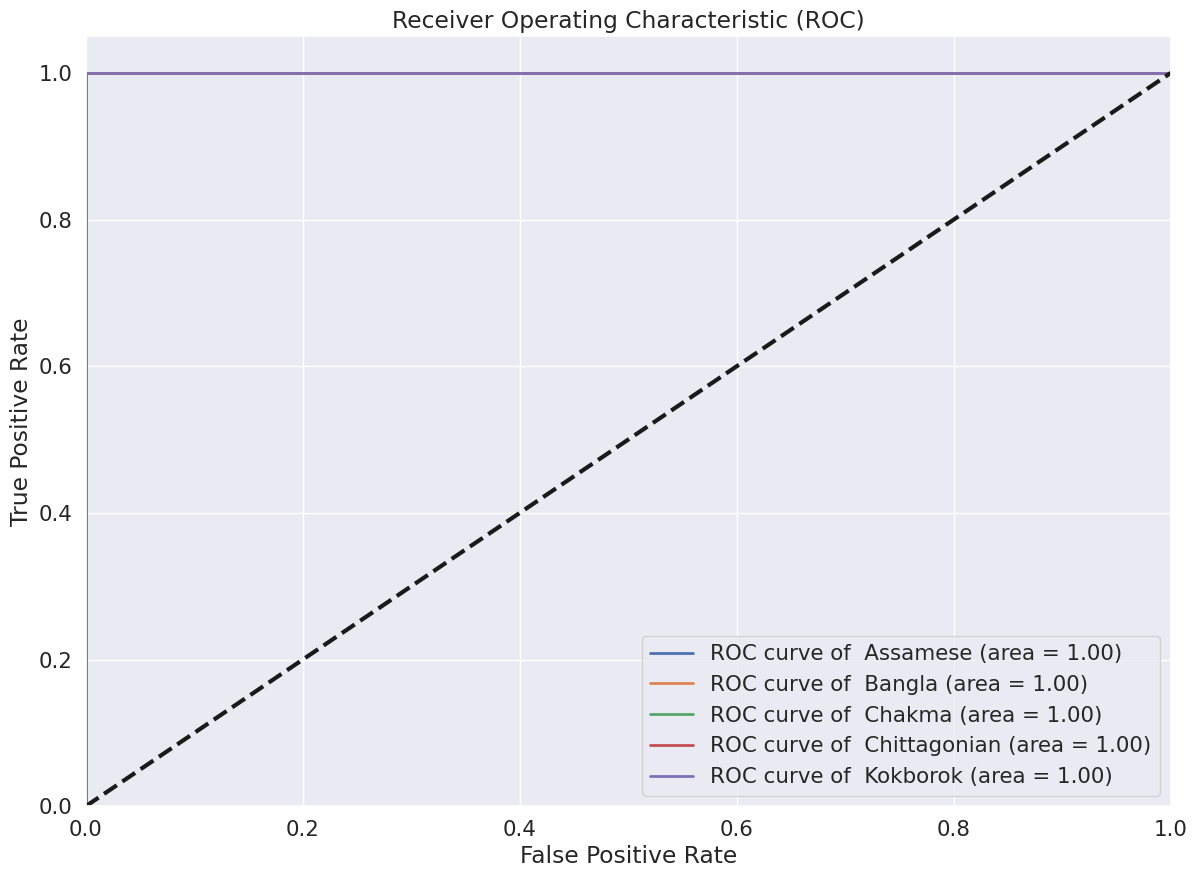

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = model.predict(X_test_pad)




# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# **DCNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Dropout, Flatten

num_classes =5

# Define the model
DCNN_model = Sequential()

# Input and Embedding layer (assuming pre-trained embeddings)
DCNN_model.add(Embedding(input_dim=num_words,
                         output_dim=EMBEDDING_DIM,
                         embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                         input_length=max_length,
                         trainable=False))

# First Convolutional Layer
DCNN_model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
DCNN_model.add(MaxPooling1D(pool_size=2))

# Second Convolutional Layer
DCNN_model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
DCNN_model.add(MaxPooling1D(pool_size=2))

# Third Convolutional Layer
DCNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
DCNN_model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the convolutional layers
DCNN_model.add(Flatten())

# First Fully Connected (FC) Layer with 512 neurons
DCNN_model.add(Dense(128, activation='relu'))
DCNN_model.add(Dropout(0.2))

# Second Fully Connected (FC) Layer with 512 neurons
DCNN_model.add(Dense(128, activation='relu'))
DCNN_model.add(Dropout(0.2))

# Output layer with softmax for multi-class classification (or sigmoid for binary classification)
DCNN_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
DCNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Build the model with the input shape
DCNN_model.build(input_shape=(None, max_length))

# Model summary
DCNN_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ (None, 200, 100)            │       9,503,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_39 (Conv1D)                   │ (None, 198, 16)             │           4,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_39 (MaxPooling1D)      │ (None, 99, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_40 (Conv1D)                   │ (None, 97, 32)              │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_40 (MaxPooling1D)      │ (None, 48, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_41 (Conv1D)                   │ (None, 46, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_41 (MaxPooling1D)      │ (None, 23, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 1472)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │         188,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,721,593 (37.08 MB)

 Trainable params: 218,293 (852.71 KB)

 Non-trainable params: 9,503,300 (36.25 MB)

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()



history_DCNN= DCNN_model.fit(X_train_pad,y_train,batch_size=16,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/20
234/234 - 9s - 40ms/step - accuracy: 0.9172 - loss: 0.2006 - val_accuracy: 0.9984 - val_loss: 0.0066
Epoch 2/20
234/234 - 1s - 3ms/step - accuracy: 0.9984 - loss: 0.0060 - val_accuracy: 0.9920 - val_loss: 0.0174
Epoch 3/20
234/234 - 1s - 3ms/step - accuracy: 0.9989 - loss: 0.0041 - val_accuracy: 0.9992 - val_loss: 0.0047
Epoch 4/20
234/234 - 1s - 3ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9992 - val_loss: 0.0054
Epoch 5/20
234/234 - 1s - 5ms/step - accuracy: 1.0000 - loss: 4.8912e-05 - val_accuracy: 0.9992 - val_loss: 0.0057
Epoch 6/20
234/234 - 1s - 3ms/step - accuracy: 1.0000 - loss: 6.6029e-05 - val_accuracy: 0.9992 - val_loss: 0.0060
Epoch 7/20
234/234 - 1s - 4ms/step - accuracy: 1.0000 - loss: 2.1700e-05 - val_accuracy: 0.9992 - val_loss: 0.0054
Epoch 8/20
234/234 - 1s - 6ms/step - accuracy: 1.0000 - loss: 1.0007e-05 - val_accuracy: 0.9992 - val_loss: 0.0063
Epoch 9/20
234/234 - 1s - 6ms/step - accuracy: 1.0000 - loss: 9.2311e-06 - val_accuracy: 0.9992

In [ ]:
start_time = time.time()

score,acc=DCNN_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 1.0000 - loss: 8.2014e-05
Elapsed time: 2.2708230018615723 seconds
Test Score: 0.00015896874538157135
Accuracy: 1.0


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


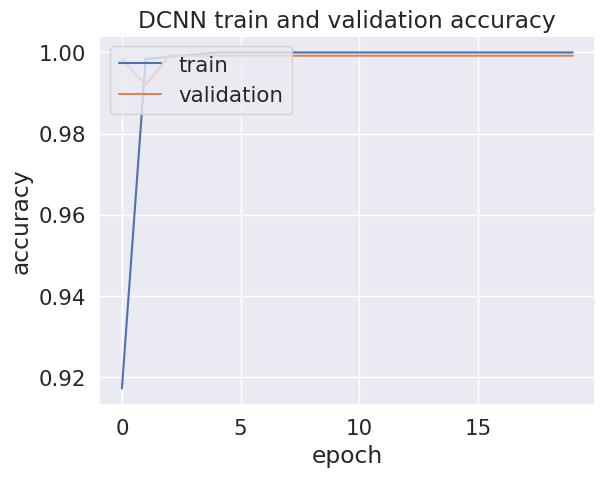

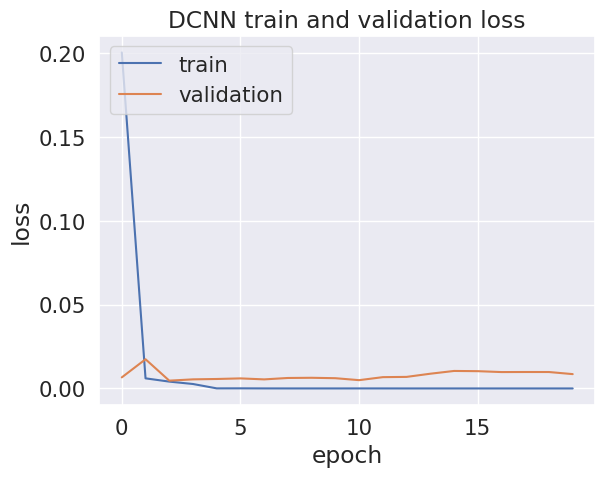

In [ ]:
print(history_DCNN.history.keys())
plt.plot(history_DCNN.history['accuracy'])
plt.plot(history_DCNN.history['val_accuracy'])
plt.title('DCNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_DCNN.history['loss'])
plt.plot(history_DCNN.history['val_loss'])
plt.title('DCNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = DCNN_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
              precision    recall  f1-score   support

    Assamese     1.0000    1.0000    1.0000       284
      Bangla     1.0000    1.0000    1.0000       291
      Chakma     1.0000    1.0000    1.0000       203
Chittagonian     1.0000    1.0000    1.0000       246
    Kokborok     1.0000    1.0000    1.0000       220

    accuracy                         1.0000      1244
   macro avg     1.0000    1.0000    1.0000      1244
weighted avg     1.0000    1.0000    1.0000      1244



39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


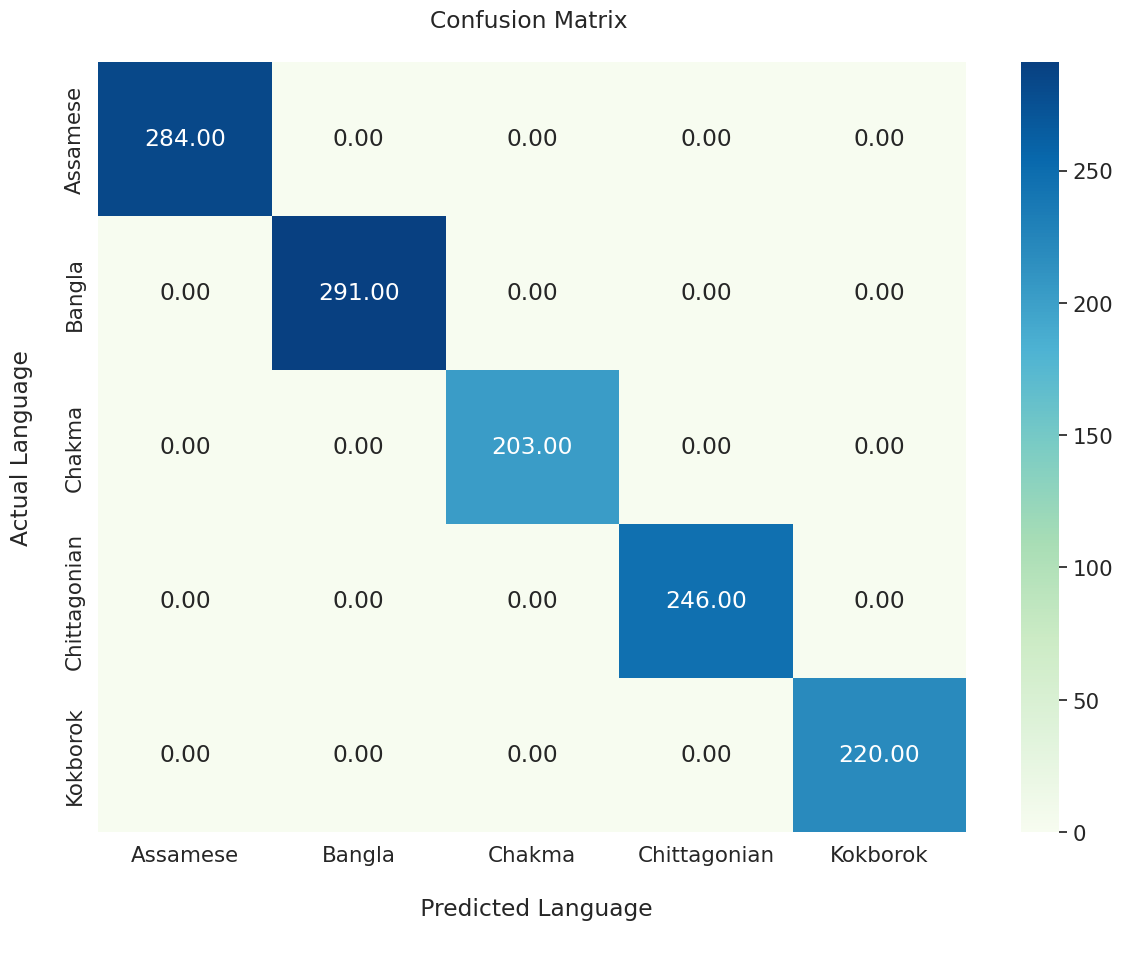

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = DCNN_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


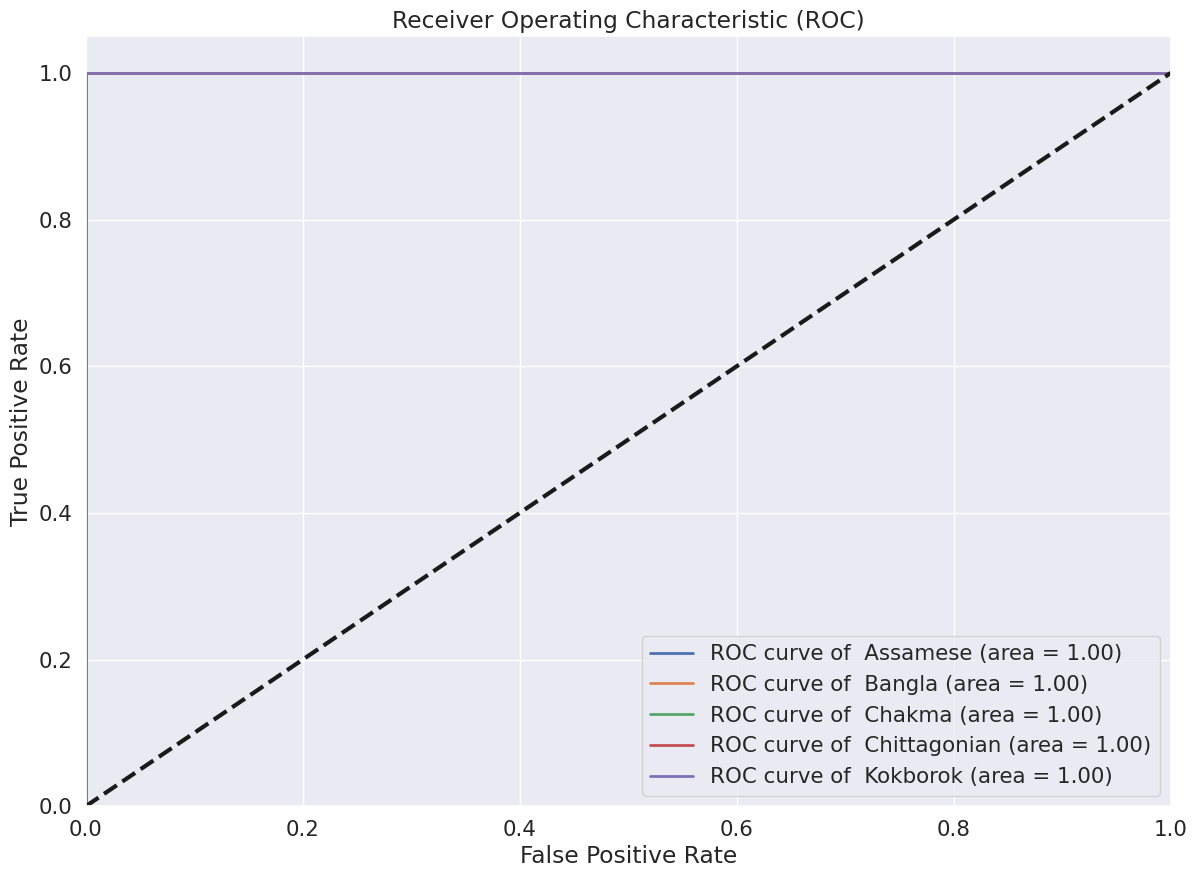

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = DCNN_model.predict(X_test_pad)




# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# **LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant
# Define parameters
hidden_dim_1 = 64            # Hidden dimension for the first LSTM layer
hidden_dim_2 = 128           # Hidden dimension for the second LSTM layer
dropout_1 = 0.2              # Dropout for the first LSTM layer
dropout_2 = 0.1              # Dropout for the second LSTM layer
num_classes = 5              # Number of classes for classification

# Model
LSTM_model = Sequential()

# Input layer
LSTM_model.add(Input(shape=(max_length,)))

# Embedding layer
embedding_layer_lstm = Embedding(input_dim=num_words,
                                   output_dim=EMBEDDING_DIM,
                                   embeddings_initializer=Constant(embedding_matrix),
                                   trainable=False)

LSTM_model.add(embedding_layer_lstm)

# First LSTM layer
LSTM_model.add(LSTM(hidden_dim_1, return_sequences=True))
LSTM_model.add(Dropout(dropout_1))

# Second LSTM layer
LSTM_model.add(LSTM(hidden_dim_2, return_sequences=False))
LSTM_model.add(Dropout(dropout_2))

# Output layer with softmax activation
LSTM_model.add(Dense(num_classes, activation='softmax'))

# Compile model
LSTM_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
LSTM_model.summary()


# # Optionally, visualize the model architecture
# plot_model(LSTM_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 200, 100)            │       9,503,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 200, 64)             │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 200, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,645,001 (36.79 MB)

 Trainable params: 141,701 (553.52 KB)

 Non-trainable params: 9,503,300 (36.25 MB)

In [ ]:
start_time = time.time()




history_lstm = LSTM_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)



end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/20
59/59 - 7s - 125ms/step - accuracy: 0.2213 - loss: 1.6034 - val_accuracy: 0.2339 - val_loss: 1.6000
Epoch 2/20
59/59 - 3s - 54ms/step - accuracy: 0.3400 - loss: 1.2805 - val_accuracy: 0.3810 - val_loss: 1.0619
Epoch 3/20
59/59 - 3s - 56ms/step - accuracy: 0.3762 - loss: 1.0359 - val_accuracy: 0.4059 - val_loss: 0.9998
Epoch 4/20
59/59 - 1s - 21ms/step - accuracy: 0.3931 - loss: 0.9984 - val_accuracy: 0.4059 - val_loss: 0.9997
Epoch 5/20
59/59 - 1s - 24ms/step - accuracy: 0.3992 - loss: 0.9961 - val_accuracy: 0.4116 - val_loss: 1.0001
Epoch 6/20
59/59 - 2s - 40ms/step - accuracy: 0.3966 - loss: 0.9967 - val_accuracy: 0.3842 - val_loss: 1.0014
Epoch 7/20
59/59 - 1s - 24ms/step - accuracy: 0.4006 - loss: 0.9967 - val_accuracy: 0.4116 - val_loss: 0.9935
Epoch 8/20
59/59 - 1s - 24ms/step - accuracy: 0.3974 - loss: 0.9969 - val_accuracy: 0.3907 - val_loss: 0.9913
Epoch 9/20
59/59 - 2s - 29ms/step - accuracy: 0.3936 - loss: 0.9968 - val_accuracy: 0.3915 - val_loss: 0.9889
Epoch 10/

In [ ]:
start_time = time.time()


score,acc=LSTM_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4185 - loss: 0.9933
Elapsed time: 0.1811678409576416 seconds
Test Score: 0.9963907599449158
Accuracy: 0.40514469146728516


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


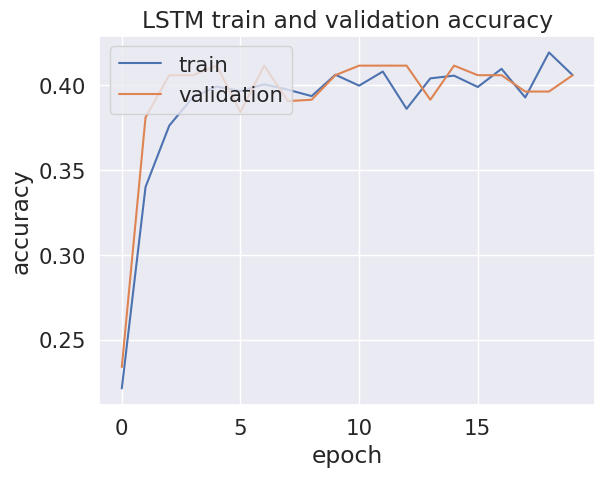

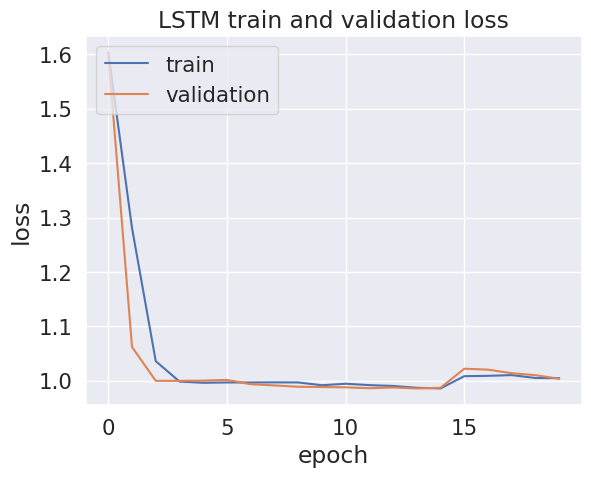

In [ ]:
print(history_lstm.history.keys())
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = LSTM_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

    Assamese     0.3498    1.0000    0.5182       284
      Bangla     0.0000    0.0000    0.0000       291
      Chakma     0.0000    0.0000    0.0000       203
Chittagonian     0.0000    0.0000    0.0000       246
    Kokborok     0.5093    1.0000    0.6748       220

    accuracy                         0.4051      1244
   macro avg     0.1718    0.4000    0.2386      1244
weighted avg     0.1699    0.4051    0.2377      1244



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


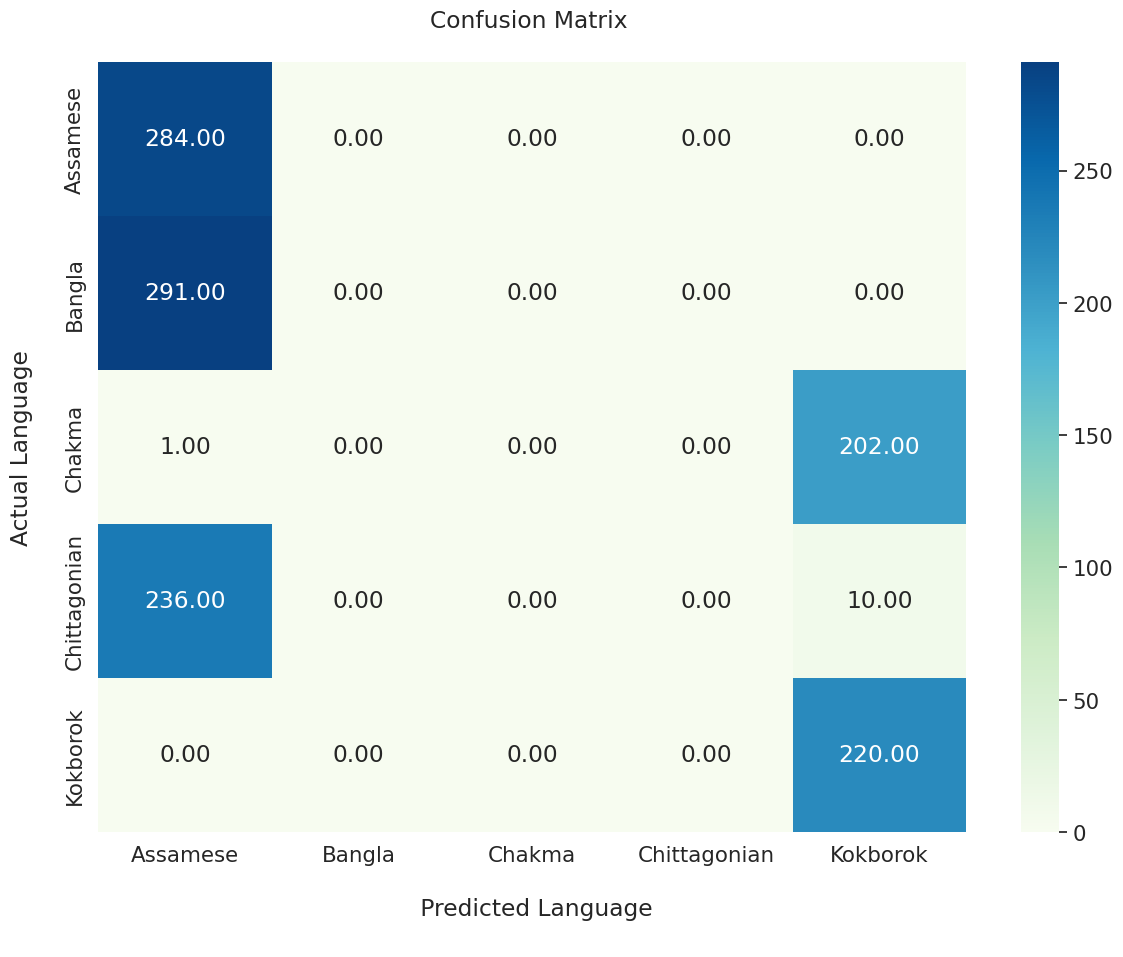

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = LSTM_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


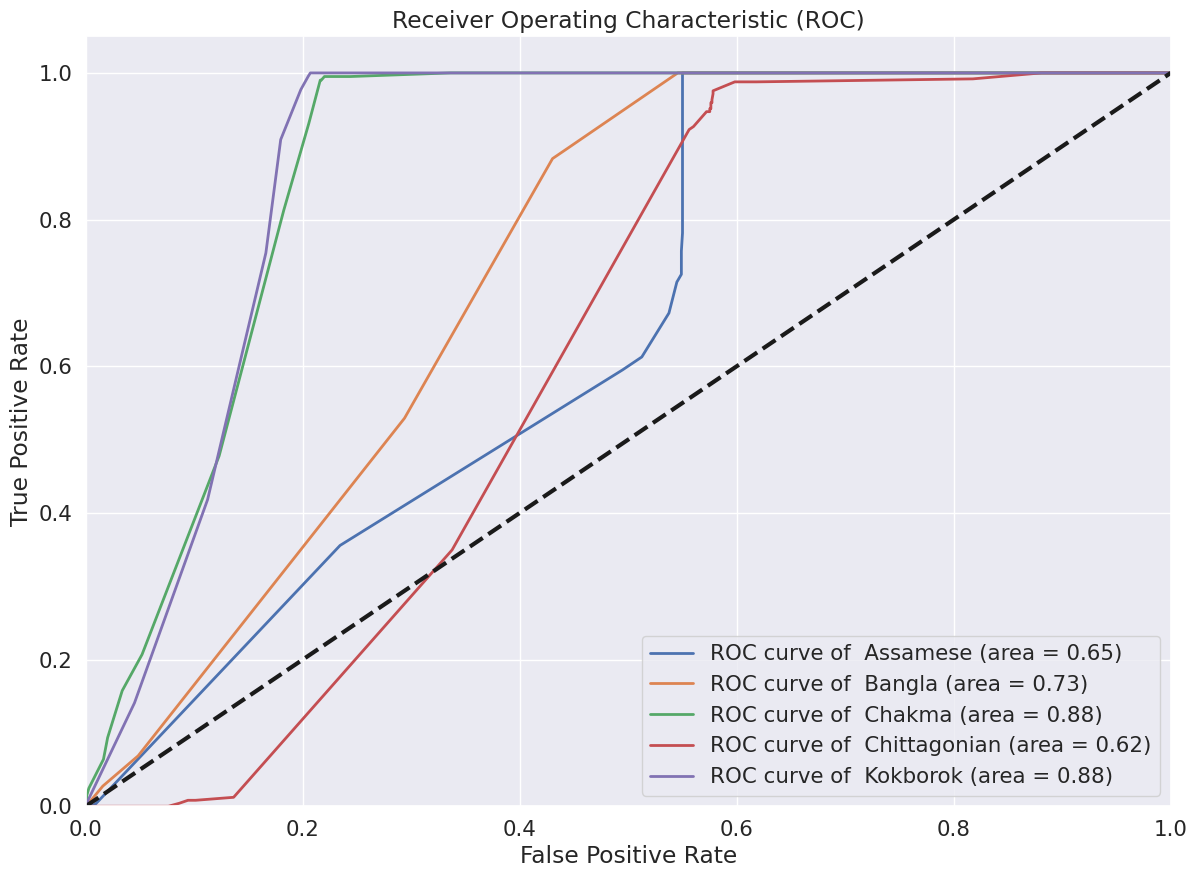

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = LSTM_model.predict(X_test_pad)




# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# **CNN+LSTM**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.utils import plot_model


num_classes = 5         # Number of classes for classification
filters = 128           # Number of filters in the Conv1D layer
kernel_sizes = [3, 4, 5]  # Kernel sizes for Conv1D

hidden_dim_1 = 64            # Hidden dimension for the first LSTM layer
hidden_dim_2 = 128           # Hidden dimension for the second LSTM layer
dropout_1 = 0.2              # Dropout for the first LSTM layer
dropout_2 = 0.1              # Dropout for the second LSTM layer
num_classes = 5              # Number of classes for classification

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Add embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)  # Apply the input tensor here

# Convolutional and Max-Pooling layers
conv_pools = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu')(embedding_layer)
    pool = MaxPooling1D(pool_size=max_length - kernel_size + 1)(conv)
    conv_pools.append(pool)

# Concatenate pooled features
concat = tf.keras.layers.concatenate(conv_pools, axis=-1)


# First LSTM layer
LSTM_model = LSTM(hidden_dim_1, return_sequences=True)(concat)
LSTM_model_dropout_1 = Dropout(dropout_1)(LSTM_model)


# Second LSTM layer
LSTM_model1 = LSTM(hidden_dim_2, return_sequences=False)(LSTM_model_dropout_1)
LSTM_model_dropout_2 = Dropout(dropout_2)(LSTM_model1)



# Add fully connected layers after LSTM
dense = Dense(128, activation='relu')(LSTM_model_dropout_2)
output = Dense(num_classes, activation='softmax')(dense)



# Create and compile the model
CNN_LSTM_model = Model(inputs=input, outputs=output)

CNN_LSTM_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
CNN_LSTM_model.summary()

# Build the model with the input shape
CNN_LSTM_model.build(input_shape=(None, max_length))

# # Optionally, visualize the model architecture
# plot_model(CNN_LSTM_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 200)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_15 (Embedding)  │ (None, 200, 100)       │      9,503,300 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_42 (Conv1D)        │ (None, 198, 128)       │         38,528 │ embedding_15[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_43 (Conv1D)        │ (None, 197, 128)       │         51,328 │ embedding_15[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_44 (Conv1D)        │ (None, 196, 128)       │         64,128 │ embedding_15[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_42          │ (None, 1, 128)         │              0 │ conv1d_42[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_43          │ (None, 1, 128)         │              0 │ conv1d_43[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_44          │ (None, 1, 128)         │              0 │ conv1d_44[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_10            │ (None, 1, 384)         │              0 │ max_pooling1d_42[0][0… │
│ (Concatenate)             │                        │                │ max_pooling1d_43[0][0… │
│                           │                        │                │ max_pooling1d_44[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 1, 64)          │        114,944 │ concatenate_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 1, 64)          │              0 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 128)            │         98,816 │ dropout_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 128)            │              0 │ lstm_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_32 (Dense)          │ (None, 128)            │         16,512 │ dropout_11[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_33 (Dense)          │ (None, 5)              │            645 │ dense_32[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,888,201 (37.72 MB)

 Trainable params: 384,901 (1.47 MB)

 Non-trainable params: 9,503,300 (36.25 MB)

In [ ]:
start_time = time.time()




history_CNN_LSTM_model = CNN_LSTM_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/20
59/59 - 6s - 108ms/step - accuracy: 0.8666 - loss: 0.5372 - val_accuracy: 0.9984 - val_loss: 0.0103
Epoch 2/20
59/59 - 1s - 17ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9984 - val_loss: 0.0063
Epoch 3/20
59/59 - 1s - 14ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9992 - val_loss: 0.0093
Epoch 4/20
59/59 - 1s - 21ms/step - accuracy: 1.0000 - loss: 4.7171e-04 - val_accuracy: 0.9992 - val_loss: 0.0086
Epoch 5/20
59/59 - 1s - 22ms/step - accuracy: 1.0000 - loss: 3.4855e-04 - val_accuracy: 0.9992 - val_loss: 0.0085
Epoch 6/20
59/59 - 1s - 14ms/step - accuracy: 1.0000 - loss: 2.3913e-04 - val_accuracy: 0.9992 - val_loss: 0.0088
Epoch 7/20
59/59 - 1s - 21ms/step - accuracy: 1.0000 - loss: 2.0794e-04 - val_accuracy: 0.9992 - val_loss: 0.0092
Epoch 8/20
59/59 - 1s - 13ms/step - accuracy: 1.0000 - loss: 1.5317e-04 - val_accuracy: 0.9992 - val_loss: 0.0094
Epoch 9/20
59/59 - 1s - 15ms/step - accuracy: 1.0000 - loss: 1.4557e-04 - val_accuracy: 0.9992 - va

In [ ]:
start_time = time.time()


score,acc=CNN_LSTM_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 6.5879e-05
Elapsed time: 0.3052210807800293 seconds
Test Score: 6.29141359240748e-05
Accuracy: 1.0


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


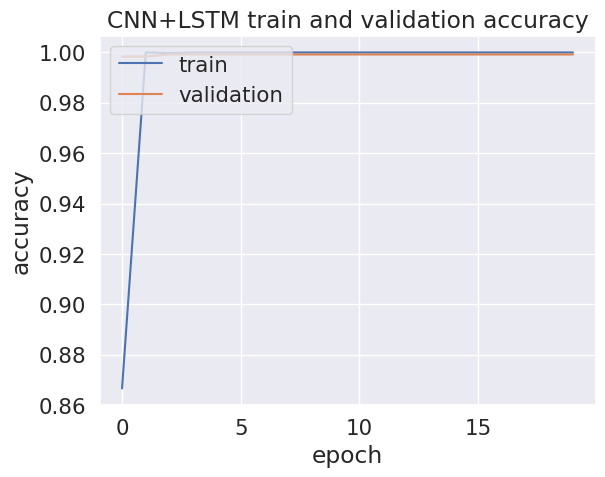

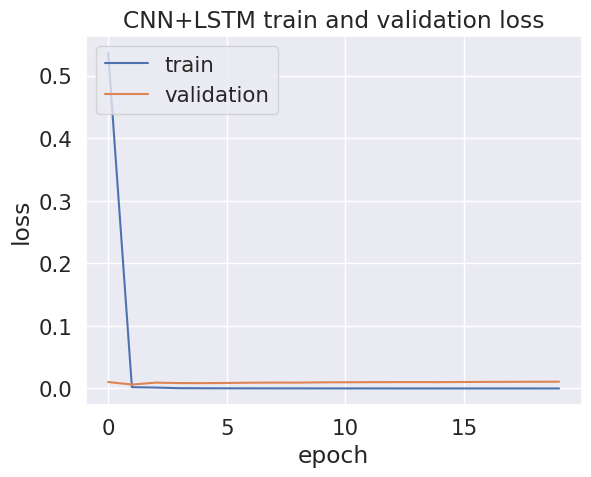

In [ ]:
print(history_CNN_LSTM_model.history.keys())
plt.plot(history_CNN_LSTM_model.history['accuracy'])
plt.plot(history_CNN_LSTM_model.history['val_accuracy'])
plt.title('CNN+LSTM train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_CNN_LSTM_model.history['loss'])
plt.plot(history_CNN_LSTM_model.history['val_loss'])
plt.title('CNN+LSTM train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = CNN_LSTM_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

    Assamese     1.0000    1.0000    1.0000       284
      Bangla     1.0000    1.0000    1.0000       291
      Chakma     1.0000    1.0000    1.0000       203
Chittagonian     1.0000    1.0000    1.0000       246
    Kokborok     1.0000    1.0000    1.0000       220

    accuracy                         1.0000      1244
   macro avg     1.0000    1.0000    1.0000      1244
weighted avg     1.0000    1.0000    1.0000      1244



39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


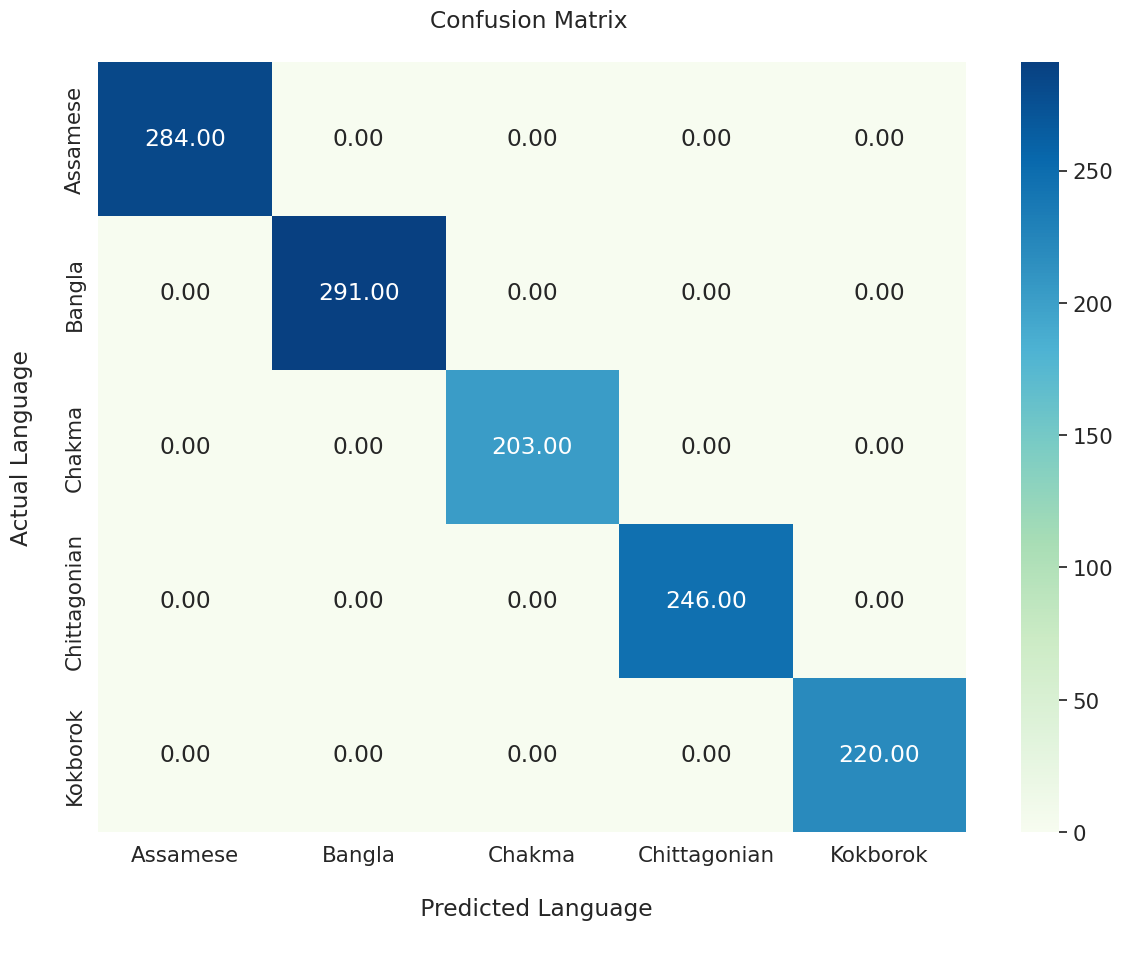

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = CNN_LSTM_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


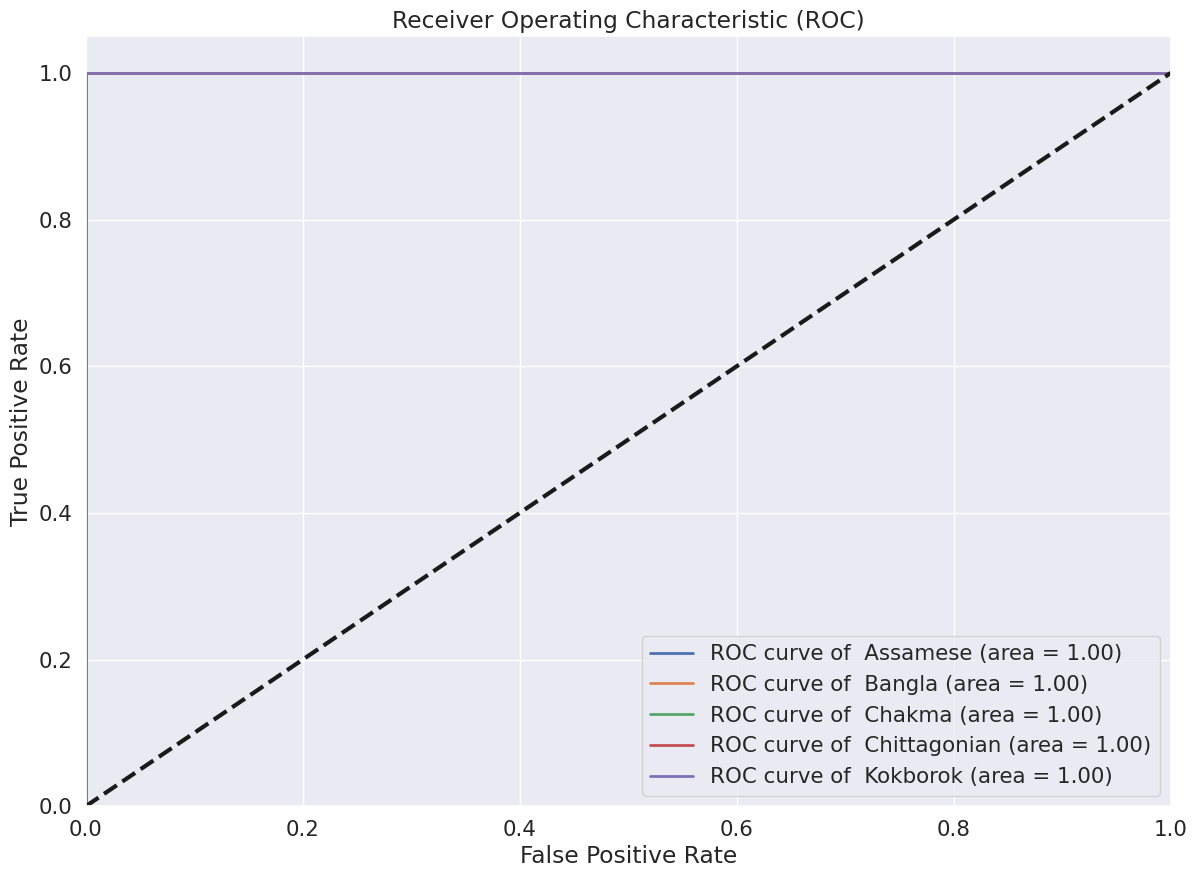

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = CNN_LSTM_model.predict(X_test_pad)




# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# **BiLSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense



# Define the model architecture
BiLSTM_model = Sequential()

# Embedding layer
embedding_layer_BiLSTM = Embedding(input_dim=num_words,
                                   output_dim=EMBEDDING_DIM,
                                   embeddings_initializer=Constant(embedding_matrix),
                                   trainable=False)

BiLSTM_model.add(embedding_layer_BiLSTM)

BiLSTM_model.add(Bidirectional(LSTM(128)))
BiLSTM_model.add(Dense(5, activation='softmax'))
adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)

# Build the model with the input shape
BiLSTM_model.build(input_shape=(None, max_length))

BiLSTM_model.summary()

# Compile the model
BiLSTM_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)             │ (None, 200, 100)            │       9,503,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         234,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,739,081 (37.15 MB)

 Trainable params: 235,781 (921.02 KB)

 Non-trainable params: 9,503,300 (36.25 MB)

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()





history_Bi = BiLSTM_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/20
59/59 - 4s - 74ms/step - accuracy: 0.9453 - loss: 0.2913 - val_accuracy: 0.9984 - val_loss: 0.0162
Epoch 2/20
59/59 - 2s - 32ms/step - accuracy: 0.9971 - loss: 0.0173 - val_accuracy: 0.9831 - val_loss: 0.0522
Epoch 3/20
59/59 - 2s - 26ms/step - accuracy: 0.9984 - loss: 0.0133 - val_accuracy: 0.9984 - val_loss: 0.0084
Epoch 4/20
59/59 - 2s - 40ms/step - accuracy: 0.9995 - loss: 0.0048 - val_accuracy: 0.9984 - val_loss: 0.0077
Epoch 5/20
59/59 - 3s - 43ms/step - accuracy: 0.9995 - loss: 0.0035 - val_accuracy: 0.9984 - val_loss: 0.0058
Epoch 6/20
59/59 - 1s - 23ms/step - accuracy: 1.0000 - loss: 7.5987e-04 - val_accuracy: 0.9992 - val_loss: 0.0074
Epoch 7/20
59/59 - 3s - 44ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 0.9960 - val_loss: 0.0240
Epoch 8/20
59/59 - 3s - 48ms/step - accuracy: 0.9992 - loss: 0.0079 - val_accuracy: 0.9984 - val_loss: 0.0041
Epoch 9/20
59/59 - 2s - 29ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9984 - val_loss: 0.0090
Epoch 

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()

score,acc=BiLSTM_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9996 - loss: 0.0024
Elapsed time: 0.36838364601135254 seconds
Test Score: 0.0045684450305998325
Accuracy: 0.9991961121559143


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


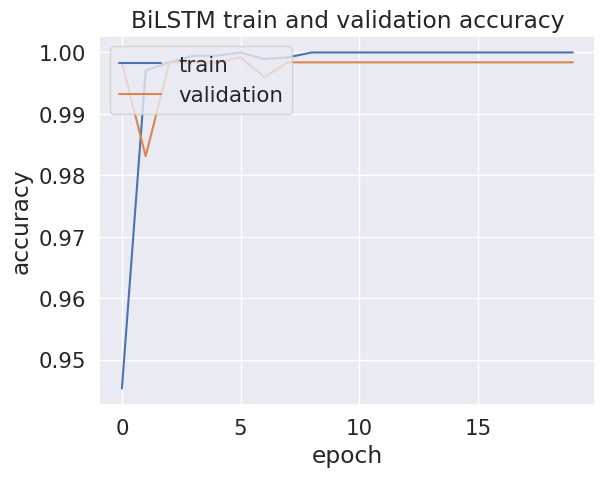

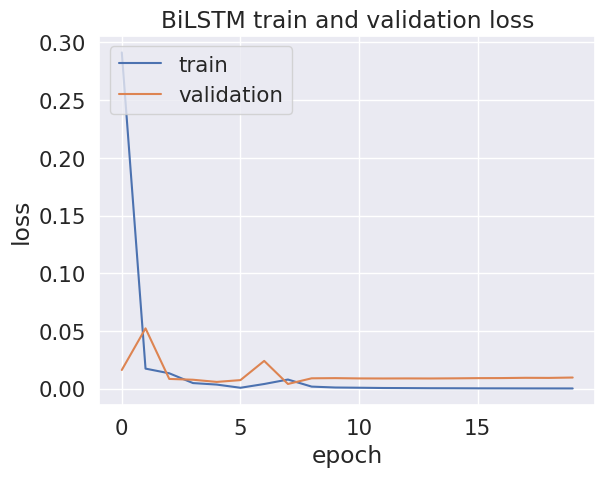

In [ ]:
print(history_Bi.history.keys())
plt.plot(history_Bi.history['accuracy'])
plt.plot(history_Bi.history['val_accuracy'])
plt.title('BiLSTM train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_Bi.history['loss'])
plt.plot(history_Bi.history['val_loss'])
plt.title('BiLSTM train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = BiLSTM_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

    Assamese     1.0000    1.0000    1.0000       284
      Bangla     0.9966    1.0000    0.9983       291
      Chakma     1.0000    1.0000    1.0000       203
Chittagonian     1.0000    0.9959    0.9980       246
    Kokborok     1.0000    1.0000    1.0000       220

    accuracy                         0.9992      1244
   macro avg     0.9993    0.9992    0.9992      1244
weighted avg     0.9992    0.9992    0.9992      1244



39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


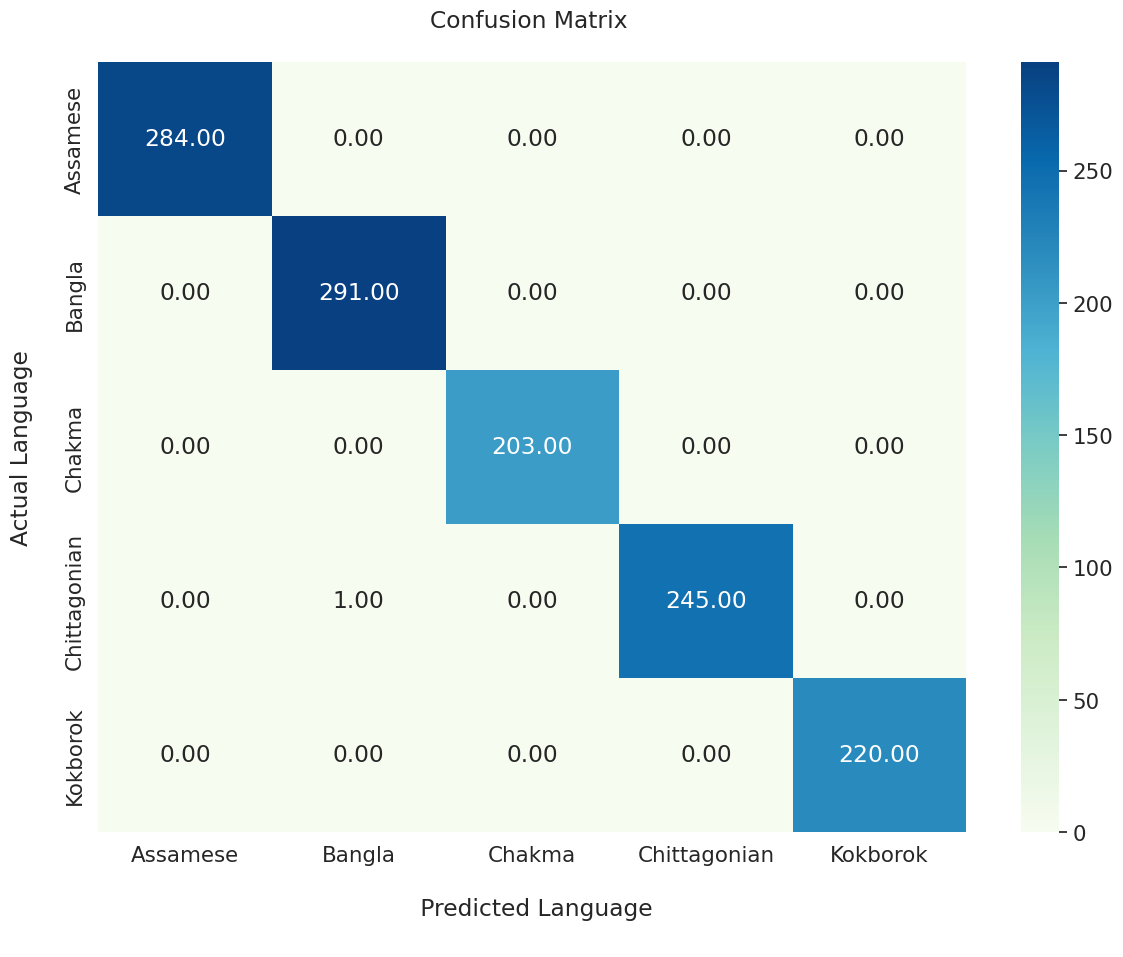

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = BiLSTM_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


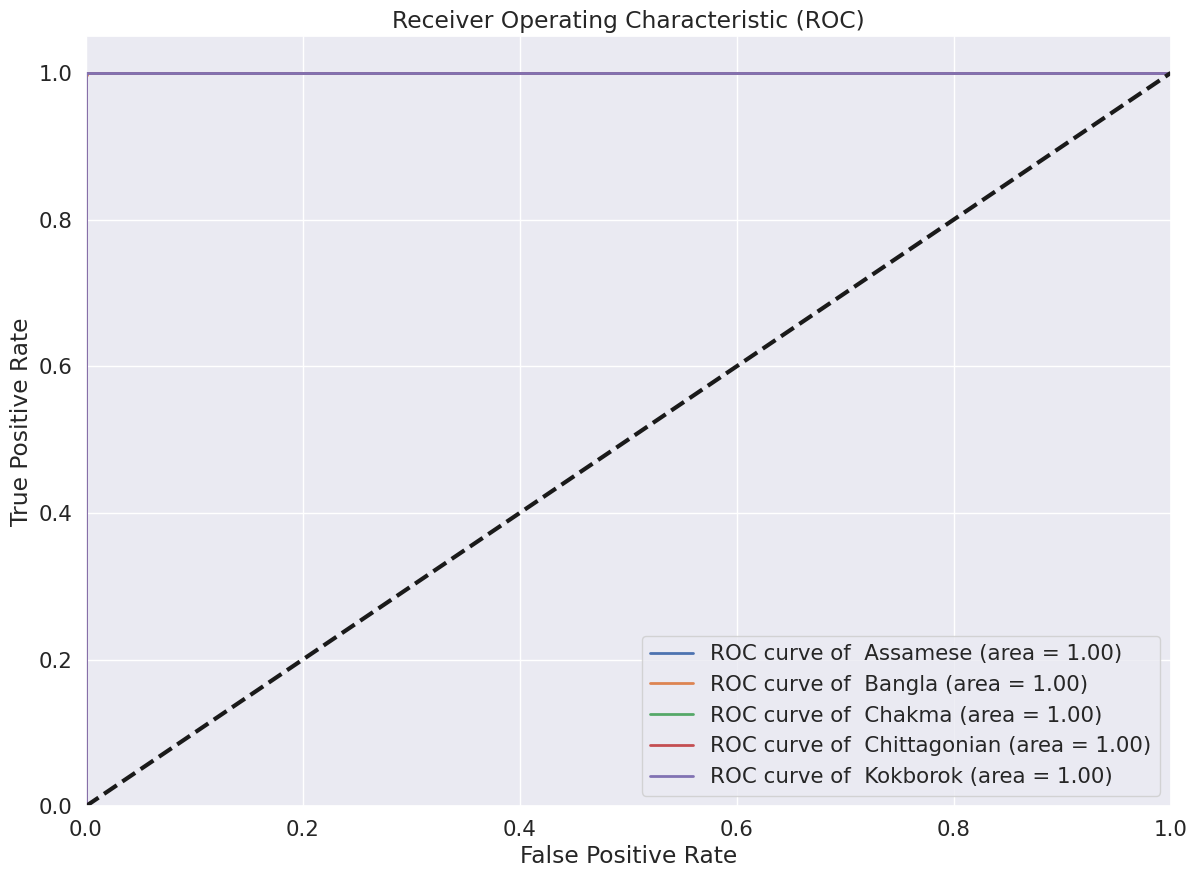

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = BiLSTM_model.predict(X_test_pad)


# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# **CNN-BiLSTM**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model

num_classes = 5         # Number of classes for classification
filters = 128           # Number of filters in the Conv1D layer
kernel_sizes = [3, 4, 5]  # Kernel sizes for Conv1D

hidden_dim_1 = 64            # Hidden dimension for the first LSTM layer
hidden_dim_2 = 128           # Hidden dimension for the second LSTM layer
dropout_1 = 0.2              # Dropout for the first LSTM layer
dropout_2 = 0.1              # Dropout for the second LSTM layer

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Add embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)  # Apply the input tensor here

# Convolutional and Max-Pooling layers
conv_pools = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu')(embedding_layer)
    pool = MaxPooling1D(pool_size=max_length - kernel_size + 1)(conv)
    conv_pools.append(pool)

# Concatenate pooled features
concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

BiLSTM_Layer = Bidirectional(LSTM(128))(concat)
dense_layer = Dense(num_classes, activation='softmax')(BiLSTM_Layer)

# Create and compile the model
CNN_BiLSTM_model = Model(inputs=input, outputs=dense_layer)

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

CNN_BiLSTM_model.summary()

# Build the model with the input shape
CNN_BiLSTM_model.build(input_shape=(None, max_length))

# Compile the model
CNN_BiLSTM_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# # Optionally, visualize the model architecture
# plot_model(CNN_BiLSTM_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15            │ (None, 200)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_17 (Embedding)  │ (None, 200, 100)       │      9,503,300 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_45 (Conv1D)        │ (None, 198, 128)       │         38,528 │ embedding_17[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_46 (Conv1D)        │ (None, 197, 128)       │         51,328 │ embedding_17[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_47 (Conv1D)        │ (None, 196, 128)       │         64,128 │ embedding_17[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_45          │ (None, 1, 128)         │              0 │ conv1d_45[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_46          │ (None, 1, 128)         │              0 │ conv1d_46[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_47          │ (None, 1, 128)         │              0 │ conv1d_47[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_11            │ (None, 1, 384)         │              0 │ max_pooling1d_45[0][0… │
│ (Concatenate)             │                        │                │ max_pooling1d_46[0][0… │
│                           │                        │                │ max_pooling1d_47[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 256)            │        525,312 │ concatenate_11[0][0]   │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_35 (Dense)          │ (None, 5)              │          1,285 │ bidirectional_1[0][0]  │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,183,881 (38.85 MB)

 Trainable params: 680,581 (2.60 MB)

 Non-trainable params: 9,503,300 (36.25 MB)

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()




history_CNN_BiLSTM_model = CNN_BiLSTM_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/20
59/59 - 5s - 79ms/step - accuracy: 0.9547 - loss: 0.2181 - val_accuracy: 0.9984 - val_loss: 0.0095
Epoch 2/20
59/59 - 1s - 12ms/step - accuracy: 0.9997 - loss: 0.0032 - val_accuracy: 0.9984 - val_loss: 0.0053
Epoch 3/20
59/59 - 1s - 12ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9984 - val_loss: 0.0053
Epoch 4/20
59/59 - 1s - 13ms/step - accuracy: 1.0000 - loss: 7.6306e-04 - val_accuracy: 0.9984 - val_loss: 0.0051
Epoch 5/20
59/59 - 1s - 21ms/step - accuracy: 1.0000 - loss: 5.5429e-04 - val_accuracy: 0.9984 - val_loss: 0.0049
Epoch 6/20
59/59 - 1s - 22ms/step - accuracy: 1.0000 - loss: 4.2405e-04 - val_accuracy: 0.9984 - val_loss: 0.0050
Epoch 7/20
59/59 - 1s - 21ms/step - accuracy: 1.0000 - loss: 3.3547e-04 - val_accuracy: 0.9984 - val_loss: 0.0052
Epoch 8/20
59/59 - 1s - 24ms/step - accuracy: 1.0000 - loss: 2.7152e-04 - val_accuracy: 0.9984 - val_loss: 0.0052
Epoch 9/20
59/59 - 1s - 17ms/step - accuracy: 1.0000 - loss: 2.2470e-04 - val_accuracy: 0.9984 - val

In [ ]:
import time
from sklearn.model_selection import cross_validate

score,acc= CNN_BiLSTM_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 3.4108e-04
Elapsed time: 25.97961711883545 seconds
Test Score: 0.00035258158459328115
Accuracy: 1.0


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


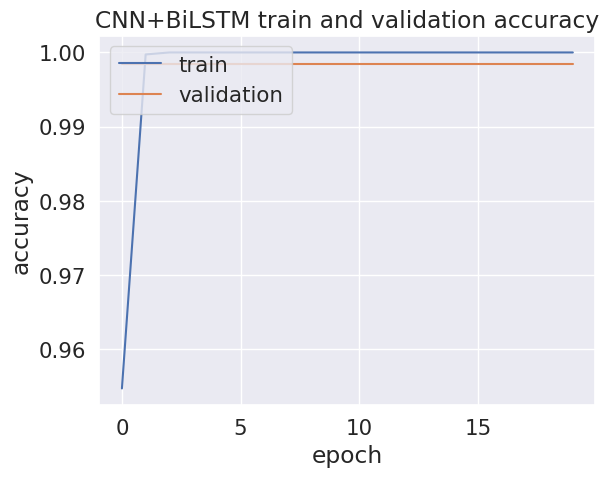

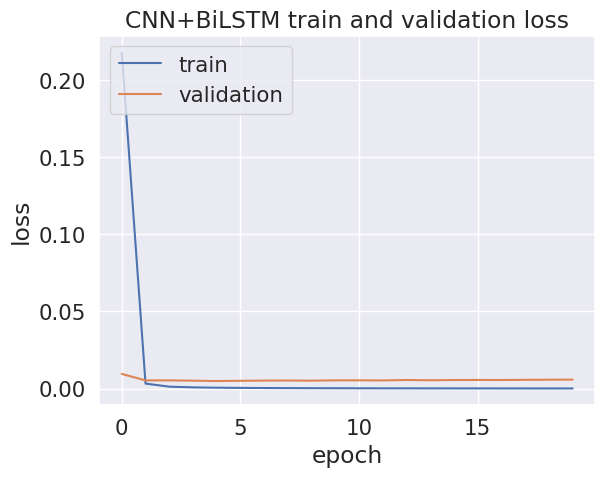

In [ ]:
print(history_CNN_BiLSTM_model.history.keys())
plt.plot(history_CNN_BiLSTM_model.history['accuracy'])
plt.plot(history_CNN_BiLSTM_model.history['val_accuracy'])
plt.title('CNN+BiLSTM train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_CNN_BiLSTM_model.history['loss'])
plt.plot(history_CNN_BiLSTM_model.history['val_loss'])
plt.title('CNN+BiLSTM train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = CNN_BiLSTM_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
              precision    recall  f1-score   support

    Assamese     1.0000    1.0000    1.0000       284
      Bangla     1.0000    1.0000    1.0000       291
      Chakma     1.0000    1.0000    1.0000       203
Chittagonian     1.0000    1.0000    1.0000       246
    Kokborok     1.0000    1.0000    1.0000       220

    accuracy                         1.0000      1244
   macro avg     1.0000    1.0000    1.0000      1244
weighted avg     1.0000    1.0000    1.0000      1244



39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


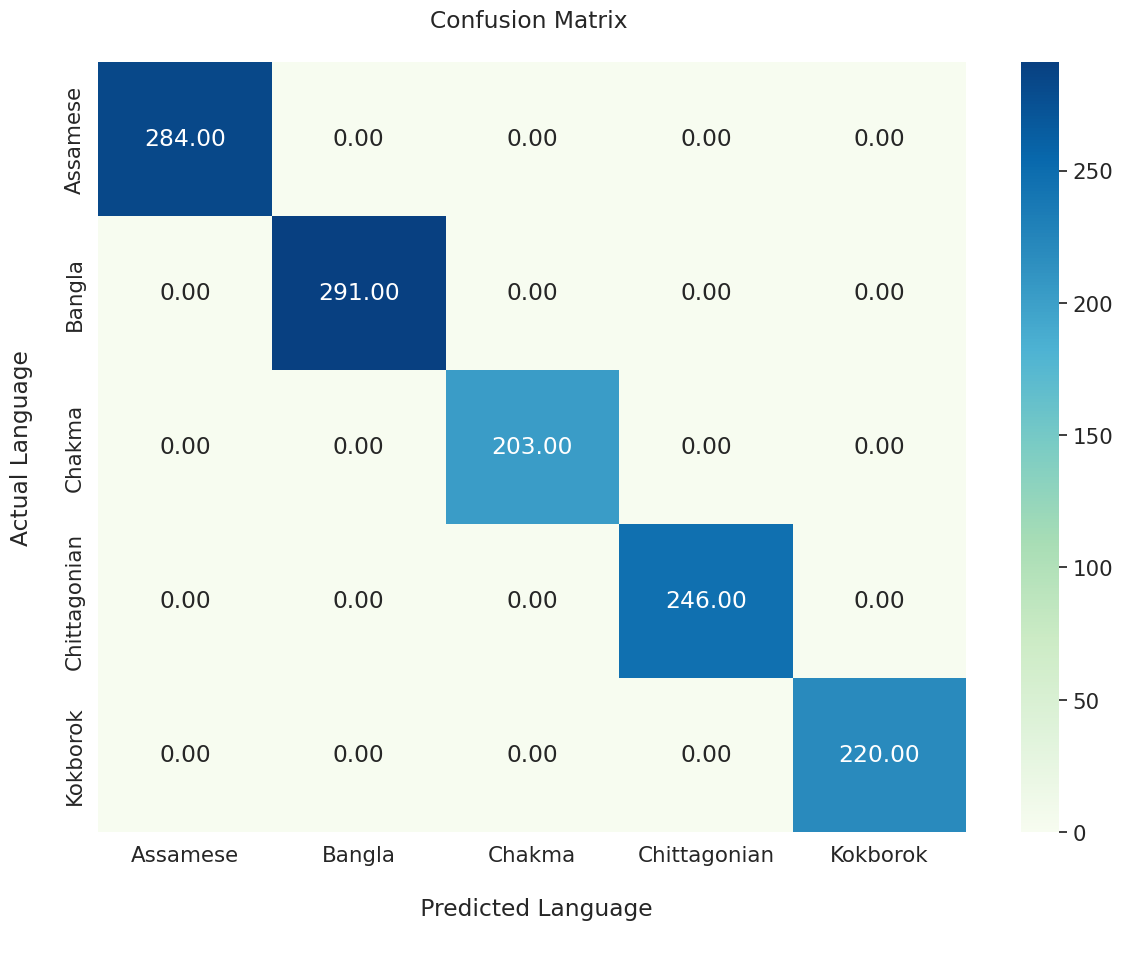

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = CNN_BiLSTM_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


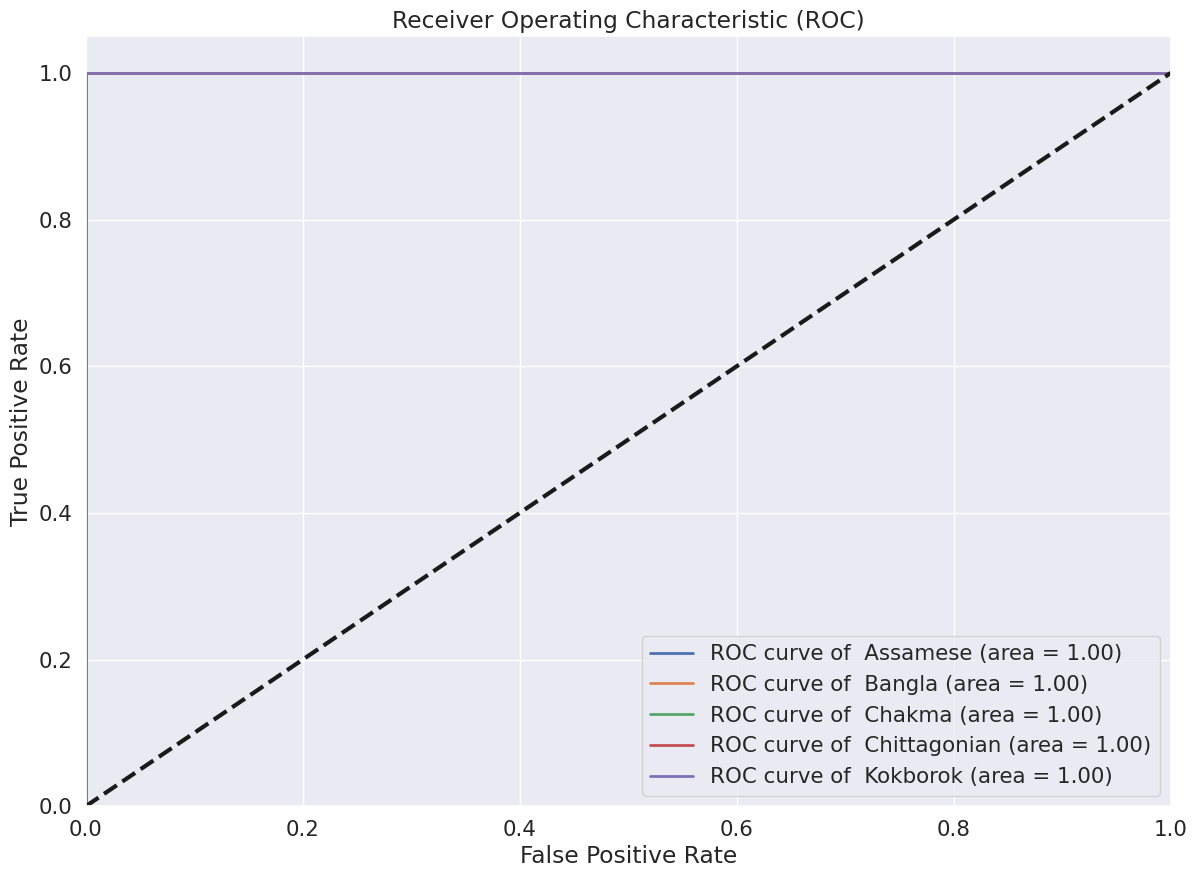

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = CNN_BiLSTM_model.predict(X_test_pad)


# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## **GRU**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, Dropout
from keras.initializers import Constant

# Define the Sequential model
GRU_model = Sequential()

# Add the embedding layer to the Sequential model
GRU_model.add(Embedding(input_dim=num_words,
                                   output_dim=EMBEDDING_DIM,
                                   embeddings_initializer=Constant(embedding_matrix),
                                   trainable=False,
                                   input_length=max_length))

# Add GRU layers with different configurations
GRU_model.add(GRU(units=128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
GRU_model.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2))

# Add a Dropout layer
GRU_model.add(Dropout(0.5))

# Add the output Dense layer with 5 units (assuming 5 classes for classification)
GRU_model.add(Dense(5, activation='softmax'))

# Build the model with the input shape
GRU_model.build(input_shape=(None, max_length))

# Compile the model
GRU_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print summary of the built model
print('Summary of the built model:')
GRU_model.summary()


Summary of the built model:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ (None, 200, 100)            │       9,503,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 200, 128)            │          88,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,629,193 (36.73 MB)

 Trainable params: 125,893 (491.77 KB)

 Non-trainable params: 9,503,300 (36.25 MB)

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()



history_gru = GRU_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/20
59/59 - 66s - 1s/step - accuracy: 0.2192 - loss: 1629165715456.0000 - val_accuracy: 0.2283 - val_loss: 1.6054
Epoch 2/20
59/59 - 58s - 991ms/step - accuracy: 0.2200 - loss: 235431247872.0000 - val_accuracy: 0.2283 - val_loss: 1.6028
Epoch 3/20
59/59 - 82s - 1s/step - accuracy: 0.2069 - loss: 124345972162560.0000 - val_accuracy: 0.2283 - val_loss: 1.6025
Epoch 4/20
59/59 - 82s - 1s/step - accuracy: 0.2219 - loss: 7814085345280.0000 - val_accuracy: 0.2283 - val_loss: 1.6007
Epoch 5/20
59/59 - 82s - 1s/step - accuracy: 0.2347 - loss: 702255136768.0000 - val_accuracy: 0.2339 - val_loss: 1.6004
Epoch 6/20
59/59 - 85s - 1s/step - accuracy: 0.2326 - loss: 393685344.0000 - val_accuracy: 0.2339 - val_loss: 1.6001
Epoch 7/20
59/59 - 78s - 1s/step - accuracy: 0.2296 - loss: 47874637299712.0000 - val_accuracy: 0.2339 - val_loss: 1.6007
Epoch 8/20
59/59 - 82s - 1s/step - accuracy: 0.2315 - loss: 88835526492160.0000 - val_accuracy: 0.2339 - val_loss: 1.6011
Epoch 9/20
59/59 - 60s - 1s/ste

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()

score,acc=GRU_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.2266 - loss: 1.5987
Elapsed time: 2.6086103916168213 seconds
Test Score: 1.6000512838363647
Accuracy: 0.2339228242635727


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


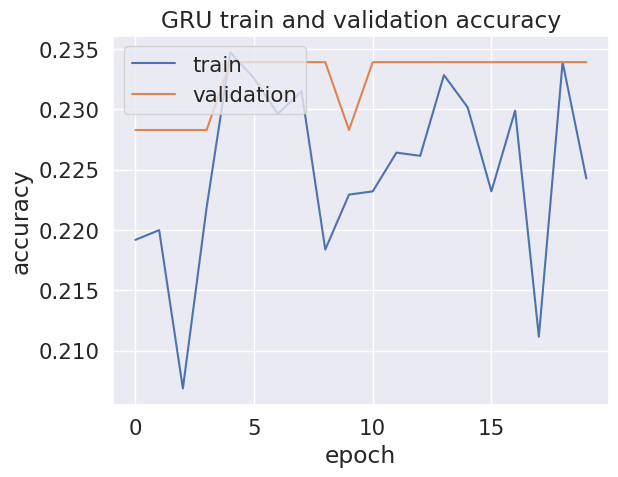

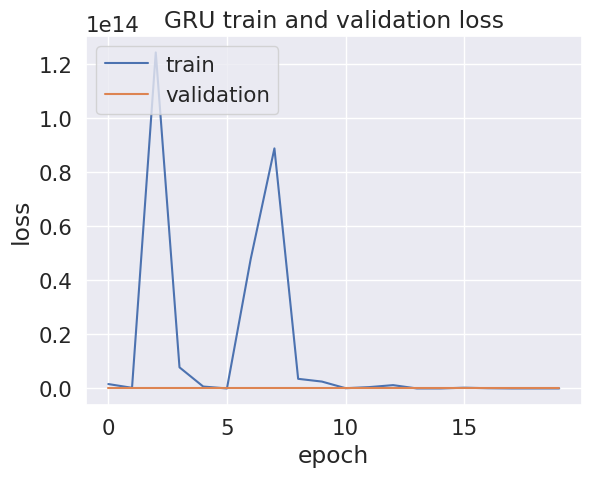

In [ ]:
print(history_gru.history.keys())
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('GRU train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = GRU_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step
              precision    recall  f1-score   support

    Assamese     0.0000    0.0000    0.0000       284
      Bangla     0.2339    1.0000    0.3792       291
      Chakma     0.0000    0.0000    0.0000       203
Chittagonian     0.0000    0.0000    0.0000       246
    Kokborok     0.0000    0.0000    0.0000       220

    accuracy                         0.2339      1244
   macro avg     0.0468    0.2000    0.0758      1244
weighted avg     0.0547    0.2339    0.0887      1244



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step


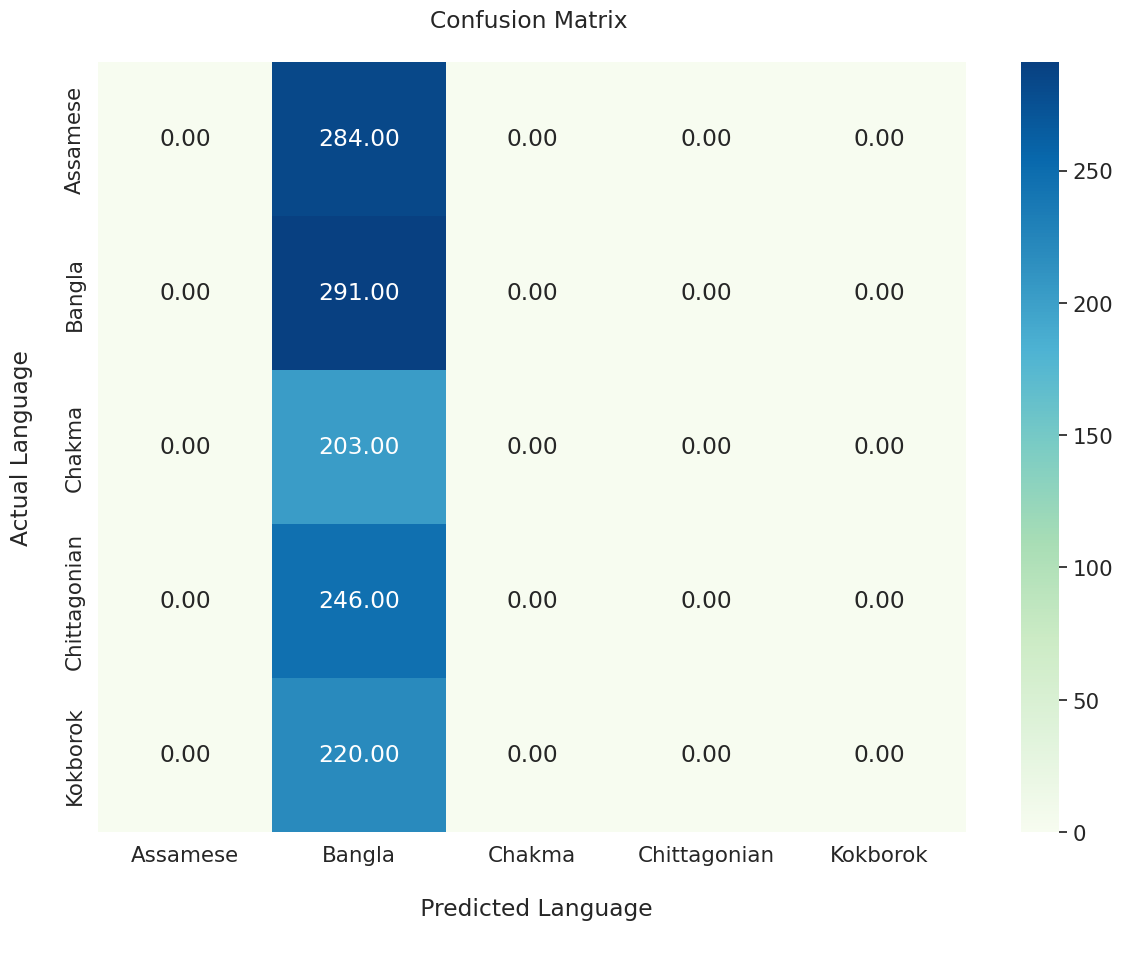

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = GRU_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step


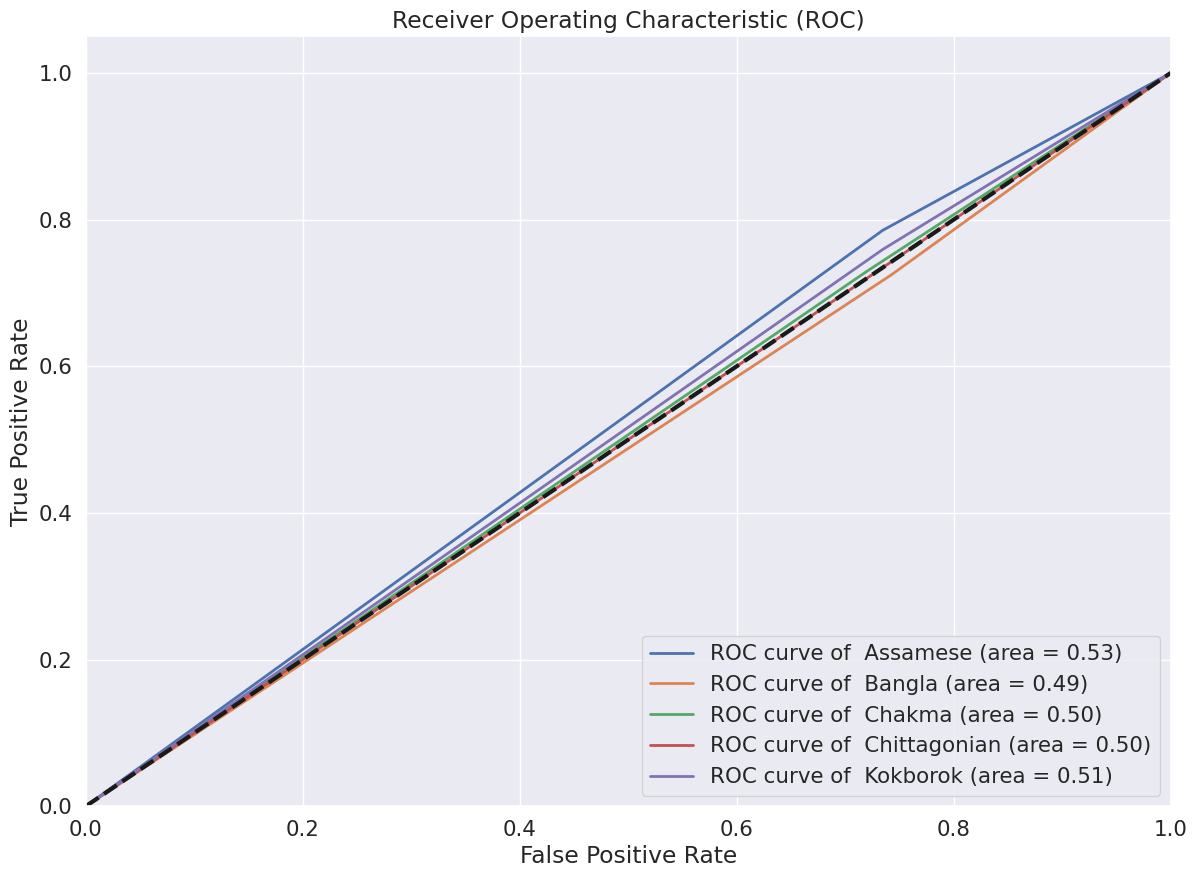

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = GRU_model.predict(X_test_pad)


# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## **CNN-GRU**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model

num_classes = 5         # Number of classes for classification
filters = 128           # Number of filters in the Conv1D layer
kernel_sizes = [3, 4, 5]  # Kernel sizes for Conv1D

hidden_dim_1 = 64            # Hidden dimension for the first LSTM layer
hidden_dim_2 = 128           # Hidden dimension for the second LSTM layer
dropout_1 = 0.2              # Dropout for the first LSTM layer
dropout_2 = 0.1              # Dropout for the second LSTM layer

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Add embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)  # Apply the input tensor here

# Convolutional and Max-Pooling layers
conv_pools = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu')(embedding_layer)
    pool = MaxPooling1D(pool_size=max_length - kernel_size + 1)(conv)
    conv_pools.append(pool)

# Concatenate pooled features
concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

# Add the GRU layer
GRU_Layer = GRU(units=128, dropout=0.2, recurrent_dropout=0.2)(concat)

# Add the output Dense layer with 5 units (assuming 5 classes for classification)
dense_layer = Dense(num_classes, activation='softmax')(GRU_Layer)

# Create and compile the model
CNN_GRU_model = Model(inputs=input, outputs=dense_layer)

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

CNN_GRU_model.summary()

# Build the model with the input shape
CNN_GRU_model.build(input_shape=(None, max_length))

# Compile the model
CNN_GRU_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# # Optionally, visualize the model architecture
# plot_model(CNN_GRU_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 200)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_19 (Embedding)  │ (None, 200, 100)       │      9,503,300 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_48 (Conv1D)        │ (None, 198, 128)       │         38,528 │ embedding_19[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_49 (Conv1D)        │ (None, 197, 128)       │         51,328 │ embedding_19[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_50 (Conv1D)        │ (None, 196, 128)       │         64,128 │ embedding_19[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_48          │ (None, 1, 128)         │              0 │ conv1d_48[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_49          │ (None, 1, 128)         │              0 │ conv1d_49[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_50          │ (None, 1, 128)         │              0 │ conv1d_50[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_12            │ (None, 1, 384)         │              0 │ max_pooling1d_48[0][0… │
│ (Concatenate)             │                        │                │ max_pooling1d_49[0][0… │
│                           │                        │                │ max_pooling1d_50[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_2 (GRU)               │ (None, 128)            │        197,376 │ concatenate_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_37 (Dense)          │ (None, 5)              │            645 │ gru_2[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,855,305 (37.60 MB)

 Trainable params: 352,005 (1.34 MB)

 Non-trainable params: 9,503,300 (36.25 MB)

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


history_CNN_GRU_model = CNN_GRU_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/20
59/59 - 4s - 73ms/step - accuracy: 0.9143 - loss: 0.2797 - val_accuracy: 0.9984 - val_loss: 0.0073
Epoch 2/20
59/59 - 2s - 36ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.9984 - val_loss: 0.0062
Epoch 3/20
59/59 - 1s - 24ms/step - accuracy: 0.9997 - loss: 0.0042 - val_accuracy: 0.9992 - val_loss: 0.0057
Epoch 4/20
59/59 - 1s - 24ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9984 - val_loss: 0.0069
Epoch 5/20
59/59 - 2s - 34ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9992 - val_loss: 0.0060
Epoch 6/20
59/59 - 1s - 14ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9992 - val_loss: 0.0061
Epoch 7/20
59/59 - 1s - 16ms/step - accuracy: 1.0000 - loss: 7.7883e-04 - val_accuracy: 0.9984 - val_loss: 0.0070
Epoch 8/20
59/59 - 1s - 16ms/step - accuracy: 1.0000 - loss: 5.8050e-04 - val_accuracy: 0.9984 - val_loss: 0.0061
Epoch 9/20
59/59 - 1s - 16ms/step - accuracy: 1.0000 - loss: 5.1033e-04 - val_accuracy: 0.9992 - val_loss: 0.006

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()

score,acc=CNN_GRU_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.6700e-04
Elapsed time: 0.14795589447021484 seconds
Test Score: 0.0003003983583766967
Accuracy: 1.0


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


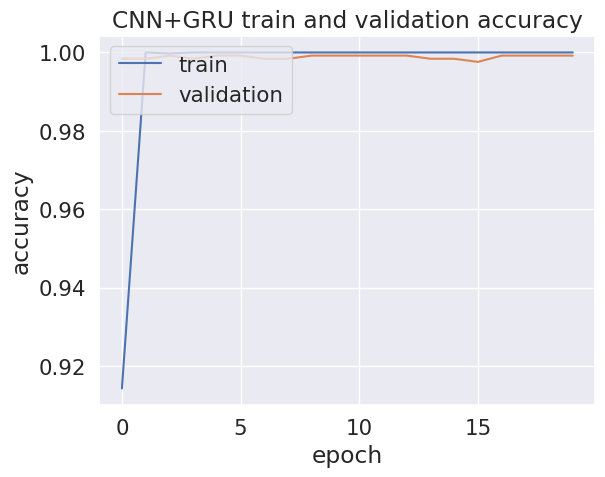

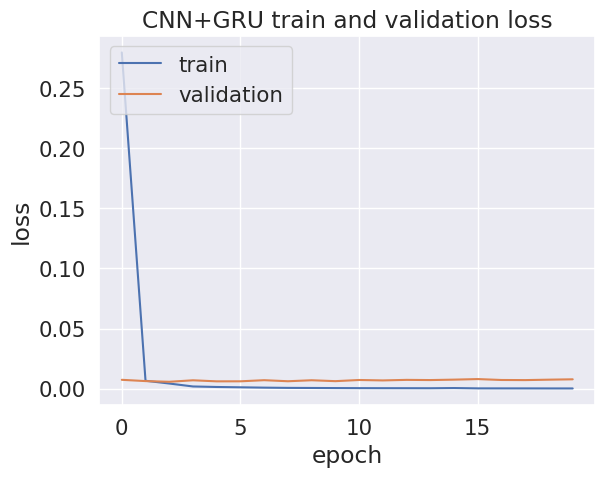

In [ ]:
print(history_CNN_GRU_model.history.keys())
plt.plot(history_CNN_GRU_model.history['accuracy'])
plt.plot(history_CNN_GRU_model.history['val_accuracy'])
plt.title('CNN+GRU train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_CNN_GRU_model.history['loss'])
plt.plot(history_CNN_GRU_model.history['val_loss'])
plt.title('CNN+GRU train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = CNN_GRU_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

    Assamese     1.0000    1.0000    1.0000       284
      Bangla     1.0000    1.0000    1.0000       291
      Chakma     1.0000    1.0000    1.0000       203
Chittagonian     1.0000    1.0000    1.0000       246
    Kokborok     1.0000    1.0000    1.0000       220

    accuracy                         1.0000      1244
   macro avg     1.0000    1.0000    1.0000      1244
weighted avg     1.0000    1.0000    1.0000      1244



39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


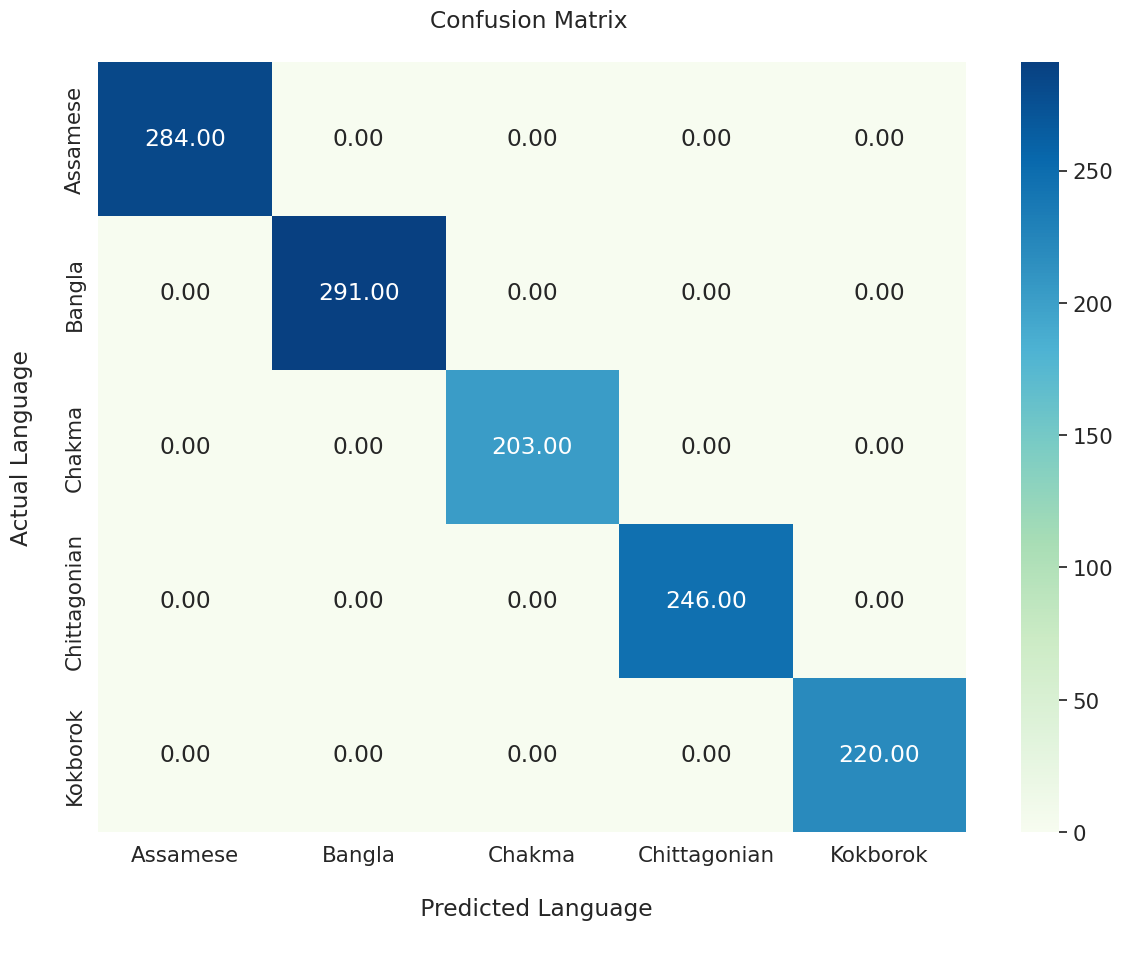

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = CNN_GRU_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


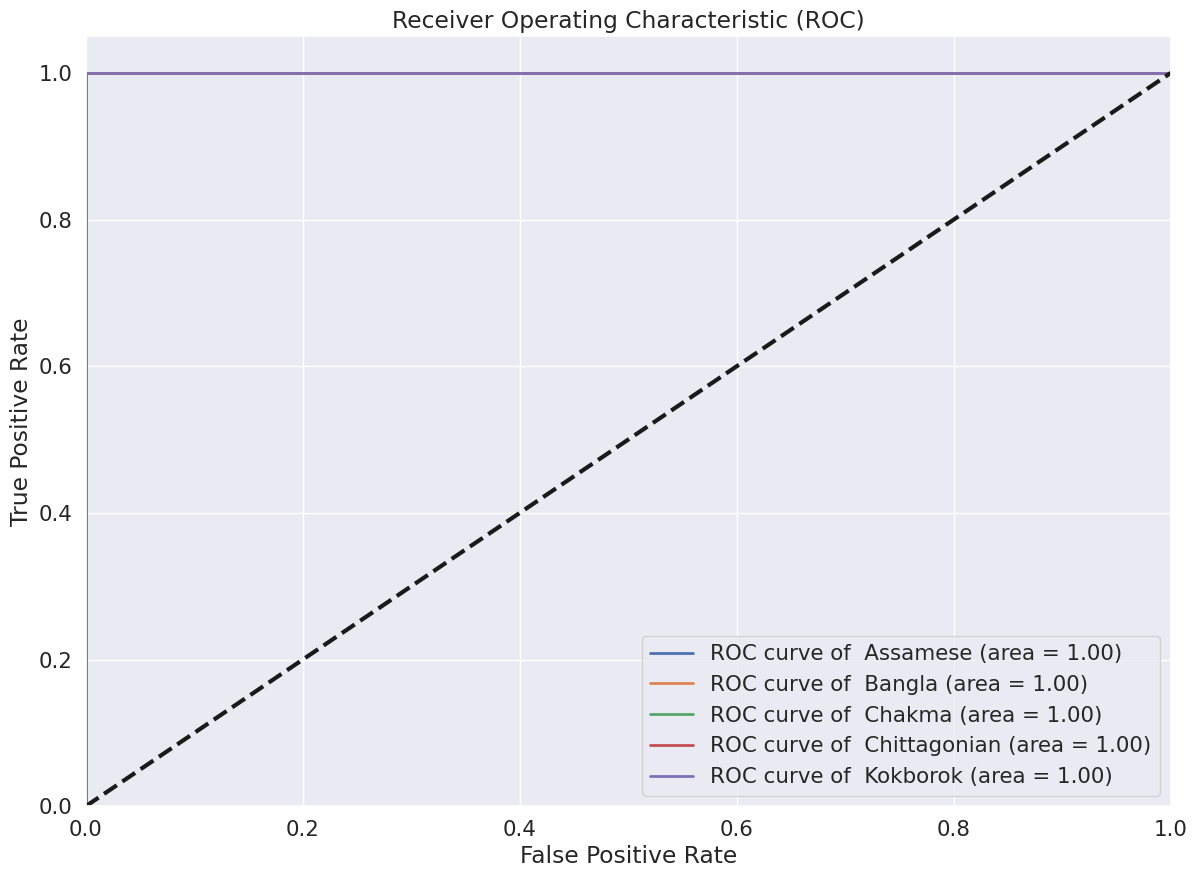

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = CNN_GRU_model.predict(X_test_pad)


# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# **DPCNN**

In [ ]:
# from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, BatchNormalization, ReLU, add, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras import optimizers

# # Parameters
# filter_nr = 250  # DPCNN typically uses 250 filters
# filter_size = 3
# max_pool_size = 3
# max_pool_strides = 2
# dense_nr = 256
# spatial_dropout = 0.2
# dense_dropout = 0.5
# train_embed = False
# num_classes = 5  # Number of classes for classification

# # Input and Embedding layer
# inputs = Input(shape=(max_length,))
# embedding = Embedding(num_words, EMBEDDING_DIM, weights=[embedding_matrix], trainable=train_embed)(inputs)
# embedding = SpatialDropout1D(spatial_dropout)(embedding)

# block0 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(embedding)
# block0 = BatchNormalization()(block0)
# block0 = ReLU()(block0)


# # Block 1
# block1 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block0)
# block1 = BatchNormalization()(block1)
# block1 = ReLU()(block1)
# block1 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block1)
# block1 = BatchNormalization()(block1)
# block1 = ReLU()(block1)

# # Resize embedding to match the shape of the convolutional block for skip connection
# resize_emb = Conv1D(filter_nr, kernel_size=1, padding='same', activation='linear')(embedding)
# resize_emb = ReLU()(resize_emb)

# block1_output = add([block1, resize_emb])  # Skip connection
# block1_output = MaxPooling1D(pool_size=max_pool_size, strides=max_pool_strides)(block1_output)

# # Block 2
# block2 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block1_output)
# block2 = BatchNormalization()(block2)
# block2 = ReLU()(block2)
# block2 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block2)
# block2 = BatchNormalization()(block2)
# block2 = ReLU()(block2)

# block2_output = add([block2, block1_output])  # Skip connection
# block2_output = MaxPooling1D(pool_size=max_pool_size, strides=max_pool_strides)(block2_output)

# # Block 3
# block3 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block2_output)
# block3 = BatchNormalization()(block3)
# block3 = ReLU()(block3)
# block3 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block3)
# block3 = BatchNormalization()(block3)
# block3 = ReLU()(block3)

# block3_output = add([block3, block2_output])  # Skip connection
# block3_output = MaxPooling1D(pool_size=max_pool_size, strides=max_pool_strides)(block3_output)

# # Block 4
# block4 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block3_output)
# block4 = BatchNormalization()(block4)
# block4 = ReLU()(block4)
# block4 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block4)
# block4 = BatchNormalization()(block4)
# block4 = ReLU()(block4)

# block4_output = add([block4, block3_output])  # Skip connection
# block4_output = MaxPooling1D(pool_size=max_pool_size, strides=max_pool_strides)(block4_output)

# # Global Max Pooling
# output = GlobalMaxPooling1D()(block4_output)

# # Dense Layer with Dropout
# output = Dense(dense_nr, activation='linear')(output)
# output = BatchNormalization()(output)
# output = ReLU()(output)
# output = Dropout(dense_dropout)(output)

# # Final output layer for multi-class classification (softmax)
# output = Dense(num_classes, activation='softmax')(output)

# # Model definition
# model = Model(inputs, output)
# print(model.summary())

# # Compile model
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.Adam(),
#               metrics=['accuracy'])


# # # # Optionally, visualize the model architecture
# # plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
# from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, ReLU, add, GlobalAveragePooling1D, Dense, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras import optimizers

# # Parameters
# filter_nr = 128  # Reduced filters to 128
# filter_size = 3
# dense_nr = 128  # Smaller dense layer
# spatial_dropout = 0.2
# dense_dropout = 0.5
# num_classes = 5  # Number of classes for classification
# activation = 'linear'

# # Input and Embedding layer
# inputs = Input(shape=(max_length,))
# # Add embedding layer
# embedding = Embedding(input_dim=num_words,
#                             output_dim=EMBEDDING_DIM,
#                             embeddings_initializer=Constant(embedding_matrix),
#                             input_length=max_length,
#                             trainable=False)(input)  # Apply the input tensor here

# embedding = SpatialDropout1D(spatial_dropout)(embedding)

# block0 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation=activation)(embedding)
# block0 = ReLU()(block0)

# # Block 1
# block1 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation=activation)(block0)
# block1 = ReLU()(block1)
# block1 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation=activation)(block1)
# block1 = ReLU()(block1)

# # Resize embedding to match the shape of the convolutional block for skip connection
# resize_emb = Conv1D(filter_nr, kernel_size=1, padding='same', activation=activation)(embedding)
# resize_emb = ReLU()(resize_emb)

# block1_output = add([block1, resize_emb])  # Skip connection

# # Block 2
# block2 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation=activation)(block1_output)
# block2 = ReLU()(block2)
# block2 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation=activation)(block2)
# block2 = ReLU()(block2)

# block2_output = add([block2, block1_output])  # Skip connection

# # Global Average Pooling
# output = GlobalAveragePooling1D()(block2_output)

# # Dense Layer with Dropout
# output = Dense(dense_nr, activation=activation)(output)
# output = ReLU()(output)
# output = Dropout(dense_dropout)(output)

# # Final output layer for multi-class classification (softmax)
# output = Dense(num_classes, activation='softmax')(output)

# # Model definition
# model = Model(inputs, output)
# print(model.summary())

# # Compile model
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.Adam(),
#               metrics=['accuracy'])


In [ ]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.9 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, ReLU, add, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt



# Define the model builder function
def build_model(hp):
    # Hyperparameters to tune
    filter_nr = hp.Int('filter_nr', min_value=64, max_value=256, step=32)  # Number of filters
    filter_size = hp.Int('filter_size', min_value=2, max_value=5, step=1)  # Kernel size
    dense_nr = hp.Int('dense_nr', min_value=64, max_value=256, step=32)    # Dense layer size
    spatial_dropout = hp.Float('spatial_dropout', min_value=0.1, max_value=0.5, step=0.1)
    dense_dropout = hp.Float('dense_dropout', min_value=0.1, max_value=0.5, step=0.1)
    num_blocks = hp.Int('num_blocks', min_value=1, max_value=5, step=1)    # Number of convolutional blocks

    # Hyperparameters for activation, batch size, and learning rate
    activation = hp.Choice('activation', values=['relu', 'tanh', 'softmax', 'linear'])  # Activation function
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')  # Learning rate
    batch_size = hp.Int('batch_size', min_value=16, max_value=128, step=16)  # Batch size

    num_classes = 5

    # Input and Embedding Layer
    inputs = Input(shape=(max_length,))
    embedding = Embedding(input_dim=num_words,
                          output_dim=EMBEDDING_DIM,
                          embeddings_initializer=Constant(embedding_matrix),
                          input_length=max_length,
                          trainable=False)(inputs)
    embedding = SpatialDropout1D(spatial_dropout)(embedding)

    # Function to create a convolutional block
    def conv_block(x, filters, filter_size):
        block = Conv1D(filters, kernel_size=filter_size, padding='same', activation=activation)(x)
        block = Conv1D(filters, kernel_size=filter_size, padding='same', activation=activation)(block)
        return block

    # Create initial block
    block_output = conv_block(embedding, filter_nr, filter_size)

    # Residual blocks with skip connections
    for i in range(num_blocks):
        resize_emb = Conv1D(filter_nr, kernel_size= filter_size, padding='same', activation=activation)(embedding)
        block_output = conv_block(block_output, filter_nr, filter_size)
        block_output = add([block_output, resize_emb])

    # Global Average Pooling
    output = GlobalAveragePooling1D()(block_output)

    # Dense Layer with Dropout
    output = Dense(dense_nr, activation=activation)(output)
    output = Dropout(dense_dropout)(output)

    # Final output layer for multi-class classification (softmax)
    output = Dense(num_classes, activation='softmax')(output)

    # Model definition
    model = Model(inputs, output)

    # Compile model with dynamic learning rate
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizers.Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    return model



# # Set up RandomSearch for hyperparameter optimization
# tuner = kt.RandomSearch(
#     build_model,              # Model-building function
#     objective='val_accuracy',  # Objective to optimize
#     max_trials=100,             # Number of different hyperparameter combinations to try
#     executions_per_trial=2,    # Number of times to repeat each trial
#     directory='my_dir1',        # Directory to save logs and results
#     project_name='cnn_tuning1'  # Project name for organizing logs
# )




In [ ]:
import keras_tuner as kt
import json
from google.colab import drive



# Define the path to save the log file in Google Drive
log_file_path = '/content/drive/MyDrive/Language_Research/Notebooks/hyperparam_log.json'

# Step 2: Create a custom tuner class to log hyperparameters and results
class MyTuner(kt.RandomSearch):
    def on_trial_end(self, trial):
        super(MyTuner, self).on_trial_end(trial)  # Call the parent class method

        trial_info = {
            'trial_id': trial.trial_id,
            'hyperparameters': trial.hyperparameters.values,
            'score': trial.score
        }

        # Save trial info to the log file in Google Drive
        with open(log_file_path, 'a') as f:
            json.dump(trial_info, f)
            f.write('\n')  # Separate each trial log with a newline for readability

# Step 3: Set up RandomSearch for hyperparameter optimization using the custom tuner
tuner = MyTuner(
    build_model,              # Model-building function
    objective='val_accuracy',  # Objective to optimize
    max_trials=200,            # Number of different hyperparameter combinations to try
    executions_per_trial=1,    # Number of times to repeat each trial
    directory='/content/drive/MyDrive/Language_Research/Notebooks/my_dir',        # Directory to save logs and results
    project_name='cnn_tuning'  # Project name for organizing logs
)

# Step 4: Start the search with hyperparameter logging to Google Drive
tuner.search(X_train_pad, y_train,
             epochs=20,
             validation_data=(X_val_pad, y_val),
             callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


Trial 135 Complete [00h 04m 02s]
val_accuracy: 0.7394678592681885

Best val_accuracy So Far: 0.9678491950035095
Total elapsed time: 1d 14h 32m 38s

Search: Running Trial #136

Value             |Best Value So Far |Hyperparameter
256               |64                |filter_nr
5                 |3                 |filter_size
96                |256               |dense_nr
0.1               |0.1               |spatial_dropout
0.2               |0.3               |dense_dropout
2                 |2                 |num_blocks
softmax           |relu              |activation
0.00078764        |0.0019222         |learning_rate
32                |96                |batch_size



In [ ]:
# Set up RandomSearch for hyperparameter optimization
tuner = kt.RandomSearch(
    build_model,              # Model-building function
    objective='val_accuracy',  # Objective to optimize
    max_trials=200,             # Number of different hyperparameter combinations to try
    executions_per_trial=2,    # Number of times to repeat each trial
    directory='my_dir',        # Directory to save logs and results
    project_name='cnn_tuning'  # Project name for organizing logs
)

# Search for the best hyperparameters, including batch size, with multiprocessing
tuner.search(X_train_pad, y_train,
             epochs=20,
             validation_data=(X_val_pad, y_val),
             callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Trial 17 Complete [00h 01m 01s]
val_accuracy: 0.8891352415084839

Best val_accuracy So Far: 0.9268292784690857
Total elapsed time: 00h 26m 57s

Search: Running Trial #18

Value             |Best Value So Far |Hyperparameter
96                |192               |filter_nr
5                 |2                 |filter_size
256               |256               |dense_nr
0.2               |0.4               |spatial_dropout
0.1               |0.1               |dense_dropout
4                 |2                 |num_blocks
relu              |relu              |activation
0.0053758         |0.009973          |learning_rate
16                |96                |batch_size

Epoch 1/20
108/113 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5631 - loss: 1.2633

In [ ]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters: ", best_hps.values)


In [ ]:
# Best model from GridSearchCV
best_model = grid_result.best_estimator_

# Evaluate the model on your validation set (X_val_pad, y_val)
test_accuracy = best_model.score(X_val_pad, y_val)

print(f"Test Accuracy: {test_accuracy}")

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


history_cnn=model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
start_time = time.time()

score,acc=model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

In [ ]:
print(history_cnn.history.keys())
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
A

## **Texting the Model with External Content**

In [ ]:
def get_sentence_embedding1(sentence, word2vec_model1, max_length):
    embedding_matrix = []
    for word in sentence:
        if word in word2vec_model1.wv:
            embedding_matrix.append(word2vec_model1.wv[word])
        else:
            embedding_matrix.append(np.zeros(word2vec_model1.vector_size))

    # Pad the sentence if it's shorter than max_length
    while len(embedding_matrix) < max_length:
        embedding_matrix.append(np.zeros(word2vec_model1.vector_size))

    return np.array(embedding_matrix)

In [ ]:
# Load the Word2Vec model from disk
word2vec_model1 = Word2Vec.load('/content/word2vec_model.model')

print("Word2Vec model loaded successfully")


In [ ]:
# Example paragraph
paragraph = input()

# Preprocess the paragraph
preprocessed_paragraph = preprocess_text(paragraph)

# Convert the preprocessed paragraph into Word2Vec embeddings
X_paragraph = np.array([get_sentence_embedding1(preprocessed_paragraph, word2vec_model1, max_length)])



# Make predictions (this will return probabilities for each class)
predictions = model.predict(X_paragraph)

# Convert probabilities to percentages (multiply by 100)
predicted_percentages = predictions[0] * 100

print("Prediction")

# Print the percentages for each class
for i, percentage in enumerate(predicted_percentages):
    label = label_encoder.inverse_transform([i])[0]  # Get the class label from the index
    print(f"Class: {label} : {percentage:.2f}%")


# ***Similarity Measures of word2vec***

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics.pairwise import cosine_similarity
import gensim

# Step 1: Load word pairs and similarity scores from Excel
word_pairs = pd.read_excel('word_pairs.xlsx')  # Replace with your Excel file path
# Assume the Excel contains columns 'Word1', 'Word2', and 'Human_Similarity'

# Step 2: Load your trained Word2Vec model
w2v_model = gensim.models.Word2Vec.load('your_word2vec_model')  # Replace with your model path

# Step 3: Calculate cosine similarity for each word pair using Word2Vec embeddings
cosine_similarities = []
for index, row in word_pairs.iterrows():
    word1, word2 = row['Word1'], row['Word2']
    if word1 in w2v_model.wv and word2 in w2v_model.wv:
        # Get the embeddings
        vec1 = w2v_model.wv[word1].reshape(1, -1)
        vec2 = w2v_model.wv[word2].reshape(1, -1)
        # Compute cosine similarity
        cosine_sim = cosine_similarity(vec1, vec2)[0][0]
        cosine_similarities.append(cosine_sim)
    else:
        # If a word is not in the vocabulary, assign a similarity of 0
        cosine_similarities.append(0)

# Step 4: Calculate Pearson and Spearman correlation between human similarity and cosine similarity
word_pairs['Cosine_Similarity'] = cosine_similarities
pearson_corr, _ = pearsonr(word_pairs['Human_Similarity'], word_pairs['Cosine_Similarity'])
spearman_corr, _ = spearmanr(word_pairs['Human_Similarity'], word_pairs['Cosine_Similarity'])

# Print the results
print(f'Pearson Correlation: {pearson_corr}')
print(f'Spearman Correlation: {spearman_corr}')


In [ ]:
import gensim
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load word pairs and similarity scores from Excel
word_pairs = pd.read_excel('word_pairs.xlsx')  # Replace with your Excel file path
# Assume the Excel contains columns 'Word1', 'Word2', and 'Human_Similarity'

# Step 2: Define your embedding dimensions and window sizes to try
embedding_dims = [50, 100, 200]  # Change these to the dimensions you want to try
window_sizes = [3, 5, 7]  # Change these to the window sizes you want to try

# Function to calculate cosine similarity for word pairs
def calculate_similarity(w2v_model, word_pairs):
    cosine_similarities = []
    for index, row in word_pairs.iterrows():
        word1, word2 = row['Word1'], row['Word2']
        if word1 in w2v_model.wv and word2 in w2v_model.wv:
            # Get the embeddings
            vec1 = w2v_model.wv[word1].reshape(1, -1)
            vec2 = w2v_model.wv[word2].reshape(1, -1)
            # Compute cosine similarity
            cosine_sim = cosine_similarity(vec1, vec2)[0][0]
            cosine_similarities.append(cosine_sim)
        else:
            # If a word is not in the vocabulary, assign a similarity of 0
            cosine_similarities.append(0)
    return cosine_similarities

# Function to compute Pearson and Spearman correlations
def compute_correlations(word_pairs, cosine_similarities):
    word_pairs['Cosine_Similarity'] = cosine_similarities
    pearson_corr, _ = pearsonr(word_pairs['Human_Similarity'], word_pairs['Cosine_Similarity'])
    spearman_corr, _ = spearmanr(word_pairs['Human_Similarity'], word_pairs['Cosine_Similarity'])
    return pearson_corr, spearman_corr

# Step 3: Iterate over different embedding dimensions and window sizes
for EMBEDDING_DIM in embedding_dims:
    for WINDOW_SIZE in window_sizes:
        print(f"Training model with EMBEDDING_DIM={EMBEDDING_DIM} and WINDOW_SIZE={WINDOW_SIZE}")

        # Train Word2Vec model
        model = gensim.models.Word2Vec(sentences=reviews_lines1, vector_size=EMBEDDING_DIM, window=WINDOW_SIZE, min_count=2)

        # Step 4: Calculate cosine similarities
        cosine_similarities = calculate_similarity(model, word_pairs)

        # Step 5: Compute Pearson and Spearman correlations
        pearson_corr, spearman_corr = compute_correlations(word_pairs, cosine_similarities)

        # Print results for the current combination of parameters
        print(f"Pearson Correlation: {pearson_corr}")
        print(f"Spearman Correlation: {spearman_corr}")


In [ ]:
import pandas as pd

# Load the CSV file (replace 'file.csv' with your actual file name)
csv_file = '/content/Chittagong Test Translation.csv'
data = pd.read_csv(csv_file)

In [ ]:
data

bangla_speech   \
0                           তোমার আব্বু কেমন আছে?   
1                  আমার বড় বোনের আজকে মন ভালো নেই   
2          তুমি কি আমাকে এই কাজটি করে দিতে পারবে?   
3             এই গরমে বাহিরে বের হতে ইচ্ছা করে না   
4                               তোমার সব কথাই ভুল   
..                                            ...   
370  তুমি কি আমাকে এক গ্লাস পানি এনে দিতে পারবে ?   
371                       আমি পারবো না পানি দিতে    
372              তোমার ভাই পড়ালেখাতে অনেক মেধাবি    
373          আচ্ছা বলো দেখি বাংলাদেশে কয়টি জেলা?    
374            সামনের দিকে যেয়ে মেয়েটি অনেক হাসবে   

                                 banglish_speech   \
0                          tomar abbu kemon ache?   
1              amar boro  boner ajke mon valo nei   
2         tumi ki amake ei kajti kore dite parbe?   
3         ei gorome bahire ber hote iccha kore na   
4                            tomar sob kothai vul   
..                                            ...   
370  tumi ki amake ek glass pani ene dite parbe ?   
371                        ami parbo na pani dite   
372            tomar vai poralekhate onek medhabi   
373      accha bolo dekhi bangladeshe koyti jela?   
374           samner dike jeye meyeti onek hashbe   

                             chittagong_bangla_speech   \
0                                 তোয়ার আব্বু কেন আসে?   
1                        আর বর বইনোর আজিয়া মন ভালা নাই   
2                  তুইকি আরে হাম্মান গরি দিত্তারিবানা?   
3                         এই গরমত বাইর ওইতো মনত নো সার   
4                                  তোয়ার বেক হোতাই ভুল   
..                                                 ...   
370  তুই কি আরে এক্কা্কান গ্লাস ফানি আনি দিত্তারিবা...   
371                           আই ন ফাইজ্জুম ফানি দিতাম   
372                   তোয়ার ভাই ফন্নাফরনত বহুত মেধাবি    
373                 আচ্ছা হো সাই বাংলাদেশর জেলা হইয়ান?   
374   সামনর মিক্কা যাইয়েরে মাইয়াফোয়া ইবা বহুত হাসিব দে   

                           chittagong_banglish_speech  region_name   \
0                                  toyar abbu ken ase?   Chittagong   
1                     ar bor boinor ajiya mon vala nai   Chittagong   
2                   tuiki are hamman gori dittaribana?   Chittagong   
3                    ei goromot bair oito monot no sar   Chittagong   
4                                  toyar bek hotai vul   Chittagong   
..                                                 ...          ...   
370    tui ki are ekkakan glass fani ani dittariba na?   Chittagong   
371                            ai n faijjum fani ditam   Chittagong   
372               toyar vai fonnaforonot bohut medhabi   Chittagong   
373             accha ho sai bangladeshor jela hoiyan?   Chittagong   
374  samnor mikka jaiyere maiyafoya iba bohut hasib de   Chittagong   

                                     english_speech  
0                               How is your father?  
1         My elder sister is not feeling well today  
2                           Can you do this for me?  
3               Don't want to go out in this summer  
4                       Everything you say is wrong  
..                                              ...  
370                Can you get me a glass of water?  
371                              I can't give water  
372        Your brother is very talented in studies  
373  Well tell me how many districts in Bangladesh?  
374         The girl will smile a lot going forward  

[375 rows x 6 columns]

In [ ]:
data1 = pd.read_csv('/content/Chittagong Train Translation.csv')
data1

bangla_speech   \
0                                            কেমন আছো ?   
1                                 আজকে আমার মন ভালো নেই   
2                                         তুমি কি করো ?   
3                        এই গরমে আমার কিছু ভালো লাগে না   
4               ছেলেটি সাদা রঙয়ের একটি শার্ট পরে এসেছিল   
...                                                 ...   
1870  কাউকে মিথ্যা বলে খুশী করার থেকে সত্যি বলে কাঁদ...   
1871  একে অপরের প্রতি যতো বেশী বিশ্বাস থাকবে, তাদের ...   
1872  বৃষ্টি বেড়ে তাপমাত্রা কমার সুখবর দিয়েছে আবহা...   
1873  পুরো বর্ষা মৌসুমে হাতে গোনা কয়েকদিন মাত্র বৃষ...   
1874  খাওয়ার অনেক আগেই যদি ভাত রান্না শেষ হয়ে গিয়ে থ...   

                                       banglish_speech   \
0                                           kemon acho?   
1                                 ajke amr mon valo nei   
2                                        tumi ki koro?    
3                     ei gorome amar kichu valo lage na   
4         cheleti sada ronger ekti shirt pore eshechilo   
...                                                 ...   
1870  kauke mittha bole khushi korar theke sotti bol...   
1871  eke oporer proti joto beshi bisshas thakbe, ta...   
1872  brishti bere tapmatra komar sukhobor diyeche a...   
1873  puro borsha moushume hate gona koyekdin matro ...   
1874  khaoyar onek agei jodi vat ranna shesh hoye gi...   

                              chittagong_bangla_speech   \
0                                              কেন আচো?   
1                                 আযিয়া আর মন বালা নাই?   
2                                          তুঁই কি গরো?   
3                      এই গরমত আত্তুন কিচু বালা ন লাগের   
4             ফোয়াইবা সাদা রংওর উজ্ঞা শার্ট ফরি আইস্যিল   
...                                                 ...   
1870  কোনিক্কারে  মিথ্যা খইয়েরে  কুশী করিবার তুন সত্...   
1871  এইজ্ঞো আরেজ্ঞোর   ফ্রতি বোত বিশ্বাস থাইবো, ইতা...   
1872  বৃষ্টি বাইরলে তাপমাত্রা কমিবার  সুখবর দিয়ে আব...   
1873  ফুরা বর্ষা মৌসুমোত হাতে গুনা হোয়োজ্ঞা দিন মাত্...   
1874  খাওয়ার বহুত   আগোত যদি ভাত রান্না শেষ ওয় গি তা...   

                            chittagong_banglish_speech  region_name   \
0                                             Ken acho?   Chittagong   
1                                ajiya ar mon bala nai?   Chittagong   
2                                          tui ki goro?   Chittagong   
3                  ei goromot attun kichu bala no lager   Chittagong   
4           foyaiba sada rongor ugga shirt fori aissilo   Chittagong   
...                                                 ...          ...   
1870  konikkare  mittha khoiyere  khushi koribar tun...   Chittagong   
1871  eiggoareggor froti bot bishsas thaibo, itaror ...   Chittagong   
1872  brishti bairle tapmatra komibar sukhobor diye ...   Chittagong   
1873  fura borsha mousumot hate guna hoyogga din mat...   Chittagong   
1874  khaoyar bohut agot jodi vat ranna shesh oy gi ...   Chittagong   

                                         english_speech  
0                                          How are you?  
1                            I'm not feeling well today  
2                                   what are you doing?  
3                     I don't like anything this summer  
4                    The boy came wearing a white shirt  
...                                                 ...  
1870  It's better to be happy for telling a lie than...  
1871  The more trust they have in each other, the he...  
1872  Meteorological office has given the good news ...  
1873  After only a handful of days of rain in the en...  
1874  If the rice is done cooking long before eating...  

[1875 rows x 6 columns]

In [ ]:
data2 = pd.read_csv('/content/Chittagong Validation Translation.csv')
data2

bangla_speech                       banglish_speech   \
0                 বাংলাদেশে ৬৪ টা জেলা                bangladeshe ৬৪ ta jela   
1    আমরা সবাই গতকাল বাহিরে গিয়েছিলাম   amra sobai gotokal bahire giyechilam   
2      তোমার কথা বলার ধরন অনেক সুন্দর   tomar kotha bolar dhoron onek sundor   
3             বরিশালের মানুষ কেমন হয়?           barishaler manush kemon hoy?   
4          খুলনা জেলা কি অনেক সুন্দর?            khulna jela ki onek sundor?   
..                                 ...                                   ...   
245                 তুমি যাও এখান থেকে                  tumi jao ekhan theke   
246                 আপনি যান এখান থেকে                  apni jan ekhan theke   
247                   তুই যা এখান থেকে                    tui ja ekhan theke   
248           আপনারা পার্কে ঘুরে বেড়ান              apnara parke ghure beran   
249                    উনি চেষ্টা করেন                     uni cheshta koren   

               chittagong_bangla_speech   \
0                 বাংলাদেশত ৬৪ ইয়ান জেলা   
1    আরা বেয়াক্কুন গতহালিয়া বাইরে গেইলাম   
2        তোইয়ার হতা বলার ধরণ বহুত সুন্দর   
3            বরিশালর মানুষ হইল্লে অয় দে?   
4        খুলনা জেলা কি বহুত সুন্দর নাকি?   
..                                   ...   
245                    তুই যো গয় এরে তুন   
246                       ওরে যন এরে তুন   
247                   তুই যা গয় এরের তুন   
248            ওনোরা ফার্কত গুরি বেড়াতোক   
249                   ঐইবা চেষ্টা খজ্জিল   

               chittagong_banglish_speech  region_name   \
0                bangladeshot ৬৪ iyan jela   Chittagong   
1     ara beyakkun gotohaliya baire geilam   Chittagong   
2    toiyar hota bolar dhoron bohut sundor   Chittagong   
3          barishalor manush hoille oy de?   Chittagong   
4        khulna jela ki bohut sundor naki?   Chittagong   
..                                     ...          ...   
245                     tui jo goy ere tun   Chittagong   
246                        ore jon ere tun   Chittagong   
247                    tui ja goy erer tun   Chittagong   
248              onora farkot guri beratok   Chittagong   
249                  oiiba cheshta khojjil   Chittagong   

                         english_speech  
0            64 districts in Bangladesh  
1             We all went out yesterday  
2     Your way of speaking is very nice  
3        How are the people of Barisal?  
4    Khulna district is very beautiful?  
..                                  ...  
245                    you go from here  
246                    You go from here  
247                    you go from here  
248       You go for a walk in the park  
249                            He tries  

[250 rows x 6 columns]

In [ ]:
data2.columns


Index(['bangla_speech ', 'banglish_speech ', 'chittagong_bangla_speech ',
       'chittagong_banglish_speech ', 'region_name ', 'english_speech'],
      dtype='object')

In [ ]:
data = pd.concat([data, data1, data2], ignore_index=True)

In [ ]:
data = data.drop(columns=['bangla_speech ', 'banglish_speech ', 'english_speech', 'chittagong_banglish_speech '])


In [ ]:
data

chittagong_bangla_speech  region_name 
0                    তোয়ার আব্বু কেন আসে?   Chittagong
1           আর বর বইনোর আজিয়া মন ভালা নাই   Chittagong
2     তুইকি আরে হাম্মান গরি দিত্তারিবানা?   Chittagong
3            এই গরমত বাইর ওইতো মনত নো সার   Chittagong
4                     তোয়ার বেক হোতাই ভুল   Chittagong
...                                   ...          ...
2495                    তুই যো গয় এরে তুন   Chittagong
2496                       ওরে যন এরে তুন   Chittagong
2497                   তুই যা গয় এরের তুন   Chittagong
2498            ওনোরা ফার্কত গুরি বেড়াতোক   Chittagong
2499                   ঐইবা চেষ্টা খজ্জিল   Chittagong

[2500 rows x 2 columns]

In [ ]:
import pandas as pd


df = data

# Calculate word count
df['word_count'] = df['chittagong_bangla_speech '].apply(lambda x: len(x.split()))

print(df)




                chittagong_bangla_speech  region_name   word_count
0                    তোয়ার আব্বু কেন আসে?   Chittagong           4
1           আর বর বইনোর আজিয়া মন ভালা নাই   Chittagong           7
2     তুইকি আরে হাম্মান গরি দিত্তারিবানা?   Chittagong           5
3            এই গরমত বাইর ওইতো মনত নো সার   Chittagong           7
4                     তোয়ার বেক হোতাই ভুল   Chittagong           4
...                                   ...          ...         ...
2495                    তুই যো গয় এরে তুন   Chittagong           5
2496                       ওরে যন এরে তুন   Chittagong           4
2497                   তুই যা গয় এরের তুন   Chittagong           5
2498            ওনোরা ফার্কত গুরি বেড়াতোক   Chittagong           4
2499                   ঐইবা চেষ্টা খজ্জিল   Chittagong           3

[2500 rows x 3 columns]


In [ ]:
# Add punctuation if missing
df['processed_speech'] = df['chittagong_bangla_speech '].apply(
    lambda x: x if x.endswith(('।', '!', '?', '।')) else x + '।'
)

In [ ]:
df

chittagong_bangla_speech  region_name   word_count  \
0                    তোয়ার আব্বু কেন আসে?   Chittagong           4   
1           আর বর বইনোর আজিয়া মন ভালা নাই   Chittagong           7   
2     তুইকি আরে হাম্মান গরি দিত্তারিবানা?   Chittagong           5   
3            এই গরমত বাইর ওইতো মনত নো সার   Chittagong           7   
4                     তোয়ার বেক হোতাই ভুল   Chittagong           4   
...                                   ...          ...         ...   
2495                    তুই যো গয় এরে তুন   Chittagong           5   
2496                       ওরে যন এরে তুন   Chittagong           4   
2497                   তুই যা গয় এরের তুন   Chittagong           5   
2498            ওনোরা ফার্কত গুরি বেড়াতোক   Chittagong           4   
2499                   ঐইবা চেষ্টা খজ্জিল   Chittagong           3   

                         processed_speech  
0                    তোয়ার আব্বু কেন আসে?  
1          আর বর বইনোর আজিয়া মন ভালা নাই।  
2     তুইকি আরে হাম্মান গরি দিত্তারিবানা?  
3           এই গরমত বাইর ওইতো মনত নো সার।  
4                    তোয়ার বেক হোতাই ভুল।  
...                                   ...  
2495                   তুই যো গয় এরে তুন।  
2496                      ওরে যন এরে তুন।  
2497                  তুই যা গয় এরের তুন।  
2498           ওনোরা ফার্কত গুরি বেড়াতোক।  
2499                  ঐইবা চেষ্টা খজ্জিল।  

[2500 rows x 4 columns]

In [ ]:
# Count the number of sentences for each word count
sentence_counts = df['word_count'].value_counts().sort_index()

print(sentence_counts)

word_count
2       7
3     152
4     318
5     424
6     453
7     378
8     268
9     185
10    120
11     64
12     52
13     28
14     22
15     13
16      7
17      3
18      4
19      2
Name: count, dtype: int64


In [ ]:
# Extract the columns
bangla_sentences = data['chittagong_bangla_speech ']


# Write 'বাংলা' sentences to a text file
with open('bangla_sentences.txt', 'w', encoding='utf-8') as bangla_file:
    for sentence in bangla_sentences:
        bangla_file.write(f"{sentence}\n")


print("Text files created successfully!")

Text files created successfully!


In [ ]:
pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
import re
import openpyxl
from docx import Document

# Load the .docx file
doc_file = "ctg.docx"  # Replace with your .docx file path
doc = Document(doc_file)

# Read all paragraphs from the .docx file
bengali_text = ""
for para in doc.paragraphs:
    text = para.text.strip()
    if text:  # Ignore empty paragraphs
        bengali_text += text + "\n"

# Tokenize the text into sentences based on Bengali punctuation
# We use regex to split the text into sentences based on Bengali punctuation marks (।, ?, !)
sentence_endings = re.compile(r'([।!?])')
sentences = sentence_endings.split(bengali_text)
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]  # Remove empty sentences

# Function to count words in a sentence
def count_words(sentence):
    return len(sentence.split())

# Group sentences into rows with 130 to 150 words
rows = []
current_row = []
current_word_count = 0

for sentence in sentences:
    sentence_word_count = count_words(sentence)

    # If adding this sentence would exceed 150 words, save the current row and start a new row
    if current_word_count + sentence_word_count > 150:
        if 130 <= current_word_count <= 150:  # Ensure current row has between 130 and 150 words
            rows.append(" ".join(current_row))
        # Start a new row with the current sentence
        current_row = [sentence]
        current_word_count = sentence_word_count
    else:
        # Add the sentence to the current row
        current_row.append(sentence)
        current_word_count += sentence_word_count

# Add the last row if it contains between 130 and 150 words
if 95 <= current_word_count <= 110:
    rows.append(" ".join(current_row))

# Ensure there are exactly 350 rows (fill with empty rows if needed)
while len(rows) < 220:
    rows.append("")  # Add empty rows if there are fewer than 350 rows

# Truncate to exactly 350 rows if necessary
rows = rows[:220]

# Save the rows into an Excel file
excel_file = "ctgooooutput.xlsx"  # Replace with your desired .xlsx file path
wb = openpyxl.Workbook()
ws = wb.active
ws.title = "Bengali Sentences"

# Write rows to the Excel file
for row_index, sentence in enumerate(rows, start=1):
    ws.cell(row=row_index, column=1).value = sentence

# Save the file
wb.save(excel_file)
print(f"Excel file '{excel_file}' created successfully!")


Excel file 'ctgooooutput.xlsx' created successfully!


In [ ]:
import re
import openpyxl
from docx import Document

# Load the .docx file
doc_file = "ctg.docx"  # Replace with your .docx file path
doc = Document(doc_file)

# Read all paragraphs from the .docx file
bengali_text = ""
for para in doc.paragraphs:
    text = para.text.strip()
    if text:  # Ignore empty paragraphs
        bengali_text += text + "\n"

# Tokenize the text into sentences based on Bengali punctuation
# We use regex to split the text into sentences based on Bengali punctuation marks (।, ?, !)
sentence_endings = re.compile(r'([।!?])')
sentences = sentence_endings.split(bengali_text)
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]  # Remove empty sentences

# Function to count words in a sentence
def count_words(sentence):
    return len(sentence.split())

# Group sentences into rows with 130 to 150 words
rows = []
current_row = []
current_word_count = 0

for sentence in sentences:
    sentence_word_count = count_words(sentence)

    # If adding this sentence would exceed 150 words, save the current row and start a new row
    if current_word_count + sentence_word_count > 120:
        if 110 <= current_word_count <= 120:  # Ensure current row has between 130 and 150 words
            rows.append(" ".join(current_row))
        # Start a new row with the current sentence
        current_row = [sentence]
        current_word_count = sentence_word_count
    else:
        # Add the sentence to the current row
        current_row.append(sentence)
        current_word_count += sentence_word_count

# Add the last row if it contains between 130 and 150 words
if 110 <= current_word_count <= 120:
    rows.append(" ".join(current_row))

# Save the rows into an Excel file
excel_file = "newt.xlsx"  # Replace with your desired .xlsx file path
wb = openpyxl.Workbook()
ws = wb.active
ws.title = "Bengali Sentences"

# Write rows to the Excel file
for row_index, sentence in enumerate(rows, start=1):
    ws.cell(row=row_index, column=1).value = sentence

# Save the file
wb.save(excel_file)
print(f"Excel file '{excel_file}' created successfully with {len(rows)} rows!")


Excel file 'newt.xlsx' created successfully with 7 rows!


In [ ]:
import pandas as pd

# Example data (replace this with your document content)
content = input()


# Split the content into words
words = content.split()

# Define a function to create chunks of 95-110 words
def split_content(words, min_words=80, max_words=95):
    chunks = []
    i = 0
    while i < len(words):
        chunk = words[i:i + max_words]
        # Ensure chunk length is between 95 and 110 words
        if len(chunk) >= min_words:
            chunks.append(' '.join(chunk))
        i += max_words
    return chunks

# Get the chunks of text
content_chunks = split_content(words)

# Create a DataFrame with the content chunks
df = pd.DataFrame(content_chunks, columns=['Content'])

# Save to Excel
df.to_excel('content1.xlsx', index=False)


অ্যাঁই ভাত ন হাইয়্যুম গুসসা ওইয়্যুম অ্যাঁর মনত জ্বালাএকদিন বুড়ি চিন্তা গরিল কুরোঅ্যাঁই যে হাইতে দ্যি যদিইতে উজ্ঞো গরে দিম দেইতার হানা দিলে বেশি গরে দিম দিতিআর অ্যাঁর বেশি টিঁয়া ঘরত আইব্যুবুড়ি কুরোর হাওন বেশি গরে দেকুরো বেশি হানা হাই বেশি গরে দিম দেকিন্তু ফরর দিন আর দিম ন দেআবার দিম দিইয়্যি কুরোকুরো উজ্ঞো গরে দিম দন লারইতে দিম দিবে বন্ধ গরে দেউজ্ঞো ডঁর ব্যবসায়ী আইসসিলইতার আইসসিল বহুত ধন সম্পত্তিইতার উজ্ঞো ডঁর কুত্তাদুয়ো বদ্দা বহুত বছর ডঁরবয়স যেত্তে বেশিআর তহন তুন দেহা গরে আর লেয়াপড়া খরচ দেএহন বহুত ডঁর উজ্ঞো বাড়িআর হথা হইবের সুজুগ ন দেইতারে লইয়্যে চলি অ্যাইয়েবহুত ডর পাইয়্যে বুজা যারডরে কিছু গরিতে যাইতাম ন চায়এগিন চ্যাঁই ইতারে বেজ্ঞুনে হইলোনা অনে ন যাইবেনঅ্যাঁই আর ন গইজ্জুম আজিয়ে কিসুইতারা আবার আইব্যুআর অ্যাঁরে লগে গরে লইয়্যে যাইব্যুতুঁই অ্যাঁরে কি দন ফারিবিইতে লাই সুজুগ গরে দন চাইতুঁরা তো বুঝস হক্কলকি ভুল হইদ্দি হইয়্যুনতোঁরে কিল্লাই যাইতাম দিতি হ তোতুঁর কষ্ট অইব্যু শাড়ি ফড়িতাই হইদ্দি হক্কল গরে লইতআইচ্ছা তুঁই কাম গরে শেষ গরহথায় এব্বেরে হইদ্দিফিছে ঘুরি বৈ বেজ্ঞুনেরাহি আইসসে এহন যাইতাম অইব

In [ ]:
pip install indic-transliteration


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 3.4 MB/s eta 0:00:00


In [ ]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=44ec02a2d1ef46d9041d88e8bfdfc62d9f495b2f43eb20fbf78d058517b6fd4e
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succ

In [ ]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=ace07a09d7b8da33293a62f7bc549a86776fb9dab6d022578476eea1bb470c97
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succ

In [ ]:
from googletrans import Translator

# Initialize translator
translator = Translator()

# Romanized text
text = input()

# Transliterate to Bengali using Google Translate API
translated = translator.translate(text, src='en', dest='bn')

# Output the transliterated text
print("Transliterated Text in Bengali:")
print(translated.text)


Haste hamjakma bai motivate wngwi, colonial ni thani wngwi thangna bagwi naisingwi tongo. Rabindranath ni swijak koktwmarok koktwma swnammani, borokrokno phunukmani, kokthai swngmani, jorani bagwi uansukma, bwkhani kokno swngmani tei abo hai kheno belai kheno nukjak. Bini swijak kokrwbai bwlaini bisingni jotoni kuchuk kothoma wngkha Eksh bali, Gora, Ghara Biri, Char chhaya tei Samaya . Abu Ishaq ni swijak koktwma, Zaheer Raihan ni Hajar Bisi, Abdul Gaffar Hananiyasan Azamans ni koktwma, Shaukat o. zul Haque ni Agunpakhi, Syed shamsul hawk ni kok Mahasoon o paran master, selina hossain ni deepanvita etc. Borok bai kamiyungni bwkhaktwi swijak koktwmarok: Alauddin al azad ni wngwi tongmani wngwi tongmani, shahidullah kaiser ni compiler, sardar zain uddin ni kwbangma salni khatungmani, abul fazl ni rangprabhat, anwar pasha ni nest finder, tei kwbangma.
Transliterated Text in Bengali:
তাড়াতাড়ি হামজাকমা বাই অনুপ্রেরণায় wngwi, Colon পনিবেশিক নি থানি উইংউই থাংগনা বাগ্বী নাইজেসি টোঙ্গো।রবীন্

In [ ]:
pip install indic-nlp-library


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.9 MB/s eta 0:00:00


In [ ]:
from indicnlp.transliterate.unicode_transliterate import UnicodeIndicTransliterator

# Romanized text
text = "Empty flat o bachawi, bohrok khorokbrwi khoroksa tei khoroksano majra berna chengkha."

# Transliterate to Bengali
transliterated_text = UnicodeIndicTransliterator.transliterate(text, 'it', 'bn')

print("Transliterated Text in Bengali:")
print(transliterated_text)


Transliterated Text in Bengali:
Empty flat o bachawi, bohrok khorokbrwi khoroksa tei khoroksano majra berna chengkha.


In [ ]:
from transliterate import translit

# Romanized Bengali text
text = "Empty flat o bachawi, bohrok khorokbrwi khoroksa tei khoroksano majra berna chengkha."

# Transliterate to Bengali
transliterated_text = translit(text, 'bn')

print("Transliterated Text in Bengali:")
print(transliterated_text)


Transliterated Text in Bengali:
Емптй флат о бачаwи, бохрок кхорокбрwи кхорокса теи кхороксано маjра берна ченгкха.


In [ ]:
!pip install polyglot
!pip install polyglot.contrib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52562 sha256=3ad9dc6d82e3c4bcb88b5d32b9771069c4980dca874af405088a6703ede04ba0
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f27fe71217981c14ac368
Successfully built polyglot
ERROR: Could not find a version that satisfies the requirement polyglot.contrib (from versions: none)
ERROR: No matching distribution found for polyglot.contrib


In [ ]:
pip install pyicu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.9/263.9 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyicu: filename=PyICU-2.14-cp310-cp310-linux_x86_64.whl size=1809839 sha256=f39a046796fccddf1e69870b5223a444c634be761824bbeff4d93cad34705afb
  Stored in directory: /root/.cache/pip/wheels/78/6e/76/17c73021179c06c29d9b108896b9248da0de4f2af93f63d405
Successfully built pyicu


In [ ]:
pip install pycld2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=9904034 sha256=cff7eb03e90a9adc12db7116faa261939036f6dd0a266a92f49286e7e26f9ae3
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d98542325270007de595bfd356eb0b06c
Successfully built pycld2


In [ ]:
from polyglot.text import Text

# Romanized Bengali text
text = "Maharaj je jagao phano chwrai rokni kok wansukya."

# Create a Polyglot Text object
poly_text = Text(text)

# Use the transliterate method for Bengali
transliterated_text = poly_text.transliterate(to="bn")

print("Transliterated Text in Bengali:", transliterated_text)


TypeError: BaseBlob.transliterate() got an unexpected keyword argument 'to'

In [ ]:
from transliterate import translit

# Input text in Romanized form
text = "Maharaj je jagao phano chwrai rokni kok wansukya."

# Transliterate to Bengali script
transliterated_text = translit(text, 'bn')

# Print the transliterated text
print("Transliterated Text in Bengali:", transliterated_text)



LanguagePackNotFound: Language pack for code bn is not found.

In [ ]:
pip install google-cloud-translate


In [ ]:
from google.cloud import translate_v2 as translate

# Set up the client
client = translate.Client()

# Romanized input text
text = "Maharaj je jagao phano chwrai rokni kok wansukya."

# Transliterate
result = client.translate(text, target_language='bn')

# Print the transliterated text
print("Transliterated Text in Bengali:", result['translatedText'])


RefreshError: ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Engine metadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7a51a95d81f0>)

In [ ]:
data

content  category
0     কবি মহাদেৱ সাহাই ১৯৬০ চনত বগড়াৰ ধনুট হাইস্কুল...  Assamese
1     মহাদেৱ সাহা বাংলা সাহিত্য আৰু কবিতাৰ জগতৰ অন্য...  Assamese
2     শৈশৱত ফুলেজোৰা নদীৰ পাৰত ডাঙৰ-দীঘল হোৱা মহাদেৱ...  Assamese
3     এই সাধাৰণ জীৱনত যে কিছু জটিলতা আছে জানেনে? - প...  Assamese
4     মেহৰাজ চাহাবৰ লগত মোৰ বহুত ভাল সম্পৰ্ক আছে। ঘৈ...  Assamese
...                                                 ...       ...
6381  ইতিমধ্যে নির্মলের কাছে দুই বিপরীত মানসিকতার পা...    Bangla
6382  হয়তো মহিলা বলেই এখনও সে কিছুটা কাজ করে যেতে প...    Bangla
6383  । কিছু অরাজনৈতিক ছেলেমেয়েকে নিয়ে কাজ শুরু কর...    Bangla
6384  এখন সে প্যান্ট আর সার্টের ওপর ভরসা রেখেছে । শা...    Bangla
6385  লিফটের  দরজাটা খুলে সন্তর্পণে যে লোকটি নামলতার...    Bangla

[6386 rows x 2 columns]

In [ ]:
df =data
df

content  category
0     কবি মহাদেৱ সাহাই ১৯৬০ চনত বগড়াৰ ধনুট হাইস্কুল...  Assamese
1     মহাদেৱ সাহা বাংলা সাহিত্য আৰু কবিতাৰ জগতৰ অন্য...  Assamese
2     শৈশৱত ফুলেজোৰা নদীৰ পাৰত ডাঙৰ-দীঘল হোৱা মহাদেৱ...  Assamese
3     এই সাধাৰণ জীৱনত যে কিছু জটিলতা আছে জানেনে? - প...  Assamese
4     মেহৰাজ চাহাবৰ লগত মোৰ বহুত ভাল সম্পৰ্ক আছে। ঘৈ...  Assamese
...                                                 ...       ...
6381  ইতিমধ্যে নির্মলের কাছে দুই বিপরীত মানসিকতার পা...    Bangla
6382  হয়তো মহিলা বলেই এখনও সে কিছুটা কাজ করে যেতে প...    Bangla
6383  । কিছু অরাজনৈতিক ছেলেমেয়েকে নিয়ে কাজ শুরু কর...    Bangla
6384  এখন সে প্যান্ট আর সার্টের ওপর ভরসা রেখেছে । শা...    Bangla
6385  লিফটের  দরজাটা খুলে সন্তর্পণে যে লোকটি নামলতার...    Bangla

[6386 rows x 2 columns]

In [ ]:
import pandas as pd
import random
import numpy as np

# Sample dataset loading (replace with your actual dataset)
# Assuming `df` has columns ['content', 'label'], where 'label' is either 'Bangla' or 'Assamese'
# df = pd.read_csv('your_dataset.csv')

# 1. Select 100 Bengali and Assamese contents randomly
bengali_contents =  df[df['category'] == 'Kokborok'].sample(n=150)['content'].tolist()
assamese_contents = df[df['category'] == 'Bangla'].sample(n=150)['content'].tolist()

# 2. Interchange one Bengali content with one Assamese content
mixed_contents = []
for b, a in zip(bengali_contents, assamese_contents):
    mixed_contents.append((b, a))

# 3. Perform sentence-level shuffling
def shuffle_sentences(content):
    sentences = content.split('.')
    random.shuffle(sentences)
    return ' '.join([s.strip() + '.' for s in sentences if s.strip()])

# 4. Ensuring the content length between 130-150 words before shuffling
def ensure_length(content):
    word_count = len(content.split())
    if word_count < 130:
        # Add dummy words if the length is too short
        additional_words = random.choices(content.split(), k=(130 - word_count))
        content += ' ' + ' '.join(additional_words)
    elif word_count > 150:
        # Trim words if the length is too long
        content = ' '.join(content.split()[:150])
    return content

# 5. Generate the new content with label 'Assamese'
new_contents = []
new_labels = []
for bengali, assamese in mixed_contents:
    # Combine Bengali and Assamese content
    combined_content = bengali + ' ' + assamese

    # Ensure the content length is between 130-150 words
    combined_content = ensure_length(combined_content)

    # Shuffle sentences of the combined content
    mixed_content = shuffle_sentences(combined_content)

    # Append the content and its label
    new_contents.append(mixed_content)
    new_labels.append('Kokborok')  # The new label will be Assamese

# 6. Save the new dataset to a DataFrame
Kokborok = pd.DataFrame({
    'content': new_contents,
    'category': new_labels
})


# Optionally, save the new dataframe to a CSV
# new_df.to_csv('modified_dataset.csv', index=False)


In [ ]:
import pandas as pd
import random
import numpy as np

# Sample dataset loading (replace with your actual dataset)
# Assuming `df` has columns ['content', 'label'], where 'label' is either 'Bangla' or 'Assamese'
# df = pd.read_csv('your_dataset.csv')

# 1. Select 100 Bengali and Assamese contents randomly
bengali_contents =  df[df['category'] == 'Chittagonian'].sample(n=150)['content'].tolist()
assamese_contents = df[df['category'] == 'Bangla'].sample(n=150)['content'].tolist()

# 2. Interchange one Bengali content with one Assamese content
mixed_contents = []
for b, a in zip(bengali_contents, assamese_contents):
    mixed_contents.append((b, a))

# 3. Perform sentence-level shuffling
def shuffle_sentences(content):
    sentences = content.split('.')
    random.shuffle(sentences)
    return ' '.join([s.strip() + '.' for s in sentences if s.strip()])

# 4. Ensuring the content length between 130-150 words before shuffling
def ensure_length(content):
    word_count = len(content.split())
    if word_count < 130:
        # Add dummy words if the length is too short
        additional_words = random.choices(content.split(), k=(130 - word_count))
        content += ' ' + ' '.join(additional_words)
    elif word_count > 150:
        # Trim words if the length is too long
        content = ' '.join(content.split()[:150])
    return content

# 5. Generate the new content with label 'Assamese'
new_contents = []
new_labels = []
for bengali, assamese in mixed_contents:
    # Combine Bengali and Assamese content
    combined_content = bengali + ' ' + assamese

    # Ensure the content length is between 130-150 words
    combined_content = ensure_length(combined_content)

    # Shuffle sentences of the combined content
    mixed_content = shuffle_sentences(combined_content)

    # Append the content and its label
    new_contents.append(mixed_content)
    new_labels.append('Chittagonian')  # The new label will be Assamese

# 6. Save the new dataset to a DataFrame
Chittagonian = pd.DataFrame({
    'content': new_contents,
    'category': new_labels
})


# Optionally, save the new dataframe to a CSV
# new_df.to_csv('modified_dataset.csv', index=False)


In [ ]:
import pandas as pd
import random
import numpy as np

# Sample dataset loading (replace with your actual dataset)
# Assuming `df` has columns ['content', 'label'], where 'label' is either 'Bangla' or 'Assamese'
# df = pd.read_csv('your_dataset.csv')

# 1. Select 100 Bengali and Assamese contents randomly
bengali_contents =  df[df['category'] == 'Chakma'].sample(n=150)['content'].tolist()
assamese_contents = df[df['category'] == 'Bangla'].sample(n=150)['content'].tolist()

# 2. Interchange one Bengali content with one Assamese content
mixed_contents = []
for b, a in zip(bengali_contents, assamese_contents):
    mixed_contents.append((b, a))

# 3. Perform sentence-level shuffling
def shuffle_sentences(content):
    sentences = content.split('.')
    random.shuffle(sentences)
    return ' '.join([s.strip() + '.' for s in sentences if s.strip()])

# 4. Ensuring the content length between 130-150 words before shuffling
def ensure_length(content):
    word_count = len(content.split())
    if word_count < 130:
        # Add dummy words if the length is too short
        additional_words = random.choices(content.split(), k=(130 - word_count))
        content += ' ' + ' '.join(additional_words)
    elif word_count > 150:
        # Trim words if the length is too long
        content = ' '.join(content.split()[:150])
    return content

# 5. Generate the new content with label 'Assamese'
new_contents = []
new_labels = []
for bengali, assamese in mixed_contents:
    # Combine Bengali and Assamese content
    combined_content = bengali + ' ' + assamese

    # Ensure the content length is between 130-150 words
    combined_content = ensure_length(combined_content)

    # Shuffle sentences of the combined content
    mixed_content = shuffle_sentences(combined_content)

    # Append the content and its label
    new_contents.append(mixed_content)
    new_labels.append('Chakma')  # The new label will be Assamese

# 6. Save the new dataset to a DataFrame
Chakma = pd.DataFrame({
    'content': new_contents,
    'category': new_labels
})


# Optionally, save the new dataframe to a CSV
# new_df.to_csv('modified_dataset.csv', index=False)


In [ ]:
import pandas as pd
import random
import numpy as np

# Sample dataset loading (replace with your actual dataset)
# Assuming `df` has columns ['content', 'label'], where 'label' is either 'Bangla' or 'Assamese'
# df = pd.read_csv('your_dataset.csv')

# 1. Select 100 Bengali and Assamese contents randomly
bengali_contents =  df[df['category'] == 'Assamese'].sample(n=150)['content'].tolist()
assamese_contents = df[df['category'] == 'Bangla'].sample(n=150)['content'].tolist()

# 2. Interchange one Bengali content with one Assamese content
mixed_contents = []
for b, a in zip(bengali_contents, assamese_contents):
    mixed_contents.append((b, a))

# 3. Perform sentence-level shuffling
def shuffle_sentences(content):
    sentences = content.split('.')
    random.shuffle(sentences)
    return ' '.join([s.strip() + '.' for s in sentences if s.strip()])

# 4. Ensuring the content length between 130-150 words before shuffling
def ensure_length(content):
    word_count = len(content.split())
    if word_count < 130:
        # Add dummy words if the length is too short
        additional_words = random.choices(content.split(), k=(130 - word_count))
        content += ' ' + ' '.join(additional_words)
    elif word_count > 150:
        # Trim words if the length is too long
        content = ' '.join(content.split()[:150])
    return content

# 5. Generate the new content with label 'Assamese'
new_contents = []
new_labels = []
for bengali, assamese in mixed_contents:
    # Combine Bengali and Assamese content
    combined_content = bengali + ' ' + assamese

    # Ensure the content length is between 130-150 words
    combined_content = ensure_length(combined_content)

    # Shuffle sentences of the combined content
    mixed_content = shuffle_sentences(combined_content)

    # Append the content and its label
    new_contents.append(mixed_content)
    new_labels.append('Assamese')  # The new label will be Assamese

# 6. Save the new dataset to a DataFrame
Assamese = pd.DataFrame({
    'content': new_contents,
    'category': new_labels
})


# Optionally, save the new dataframe to a CSV
# new_df.to_csv('modified_dataset.csv', index=False)


In [ ]:
Chakma['content'][0]

"না হঅন ত নানুত্তুন হি মাক্কোচ্চোই হিজেনী? সোরোন্দুরা লোই লড়া হেনেয় দাবা দি পিয়োজ। ত নানু হলদে তুই বেলে দা -বা দোজ ঘরত্তুন। বড়ই চারাও ন চিনিলে হালা চরমা দিনেয় বেড়েঝ। শনখলা আদাম হানা ধক গুরিনেয় চুপার হিজিরাবো। চা মুই হিয়ান্ন্যে বড়ই চারা লাগেয়োঙ। জুমবি, ভালক্ দিন পর এলে, অলহ্ দেঘা তামানা মুর'বোওত পাহ্গজ্যা গাঝত্ তলে পাহ্গজ্যা গাঝত্ বোই কদক দিক্কে সবন। জুমবি, এদক্ দিন হুদু গেল, হুদু যাচ্ খবর ন পাং কোচপাঙ তরে মুই, তুই সারা ম' জীংকানী কালা মেঘহ্ ধক আন্ধার কোচপাঙ মুই তরে ম' মন চিদর ভিদেরত্তুন। টেপী বলল , আপনার কি শরীর খারাপ করেছে ? তিনি জবাব দিলেন না , তবে প্রশ্নটা শোনার পর থেকে তাঁর শরীর একটু খারাপ লগতে লাগল । মাথা ঝিম ধরে আছে । বমি ভাবটা যায় নি । তিনি শোবার ঘরের জানালার দিকে এগুলেন–একটা জানোলা খুলে দিতে হবে । ঘরে বিশুদ্ধ কিছু বাতাস ঢুকুক । এয়ারকুলার চলছে বলে সব ক ’ টা."

In [ ]:
Assamese['content'][0]


'মইন আছিল বিচিএছৰ কেডাৰ। চুলিৰ জেল লৈ ওলাই যাওঁতে মা ঘৰলৈ আহিল। হাতত মাংসৰ মোনা। মোৰ হাতত বেগটো দি সি ক\'লে, "আমাৰ দাসী মাইনাৰ মাকৰ ঘৰলৈ লৈ আহা।" দ্ৰুততাৰে তোমাৰ চকুত মোৰ ধ্বংস দেখিলোঁ। ৰাজীৱে বিচনাত মৃত পত্নীক দেখা বুলি শুনি আচৰিত হোৱা নাছিলো। এনে ভুৱা তথ্যক অবিশ্বাস কৰিবলৈ মনোৰোগ বিশেষজ্ঞ হোৱাৰ প্ৰয়োজন নাই, চকু কাণ মেলি ৰাখিলেই যথেষ্ট। মোৰ ডাঙৰ ভনীয়েক বিন্তী আঠ বছৰ বয়সত পানীত ডুব গৈছিল। তাইৰ মৃত্যুৰ পিছত ৰাতি অকলে বাথৰুমলৈ যাবলৈ মোৰ ভয় লাগিছিল। আনকি খিৰিকীৰ ওচৰত তেওঁৰ কথাৰ মানদণ্ডও শুনিবলৈ পালোঁ। সারাদিন কাজ করে মাহিমা বাসায় ফিরে এক ধরণের ডিপ্রেশনে ভুগতে শুরু করে । মানুষ নানান কুপ্রস্তাব দেয় । খারাপ চোখে তাকায় । ডিপ্রেশন কাটাতে মাহিমা নেশা করা শুরু করে । একটা সময় আসে যখন মাহিমার শরীর থেকে যৌবন হারাতে শুরু করে । তার চাহিদাও কমতে শুরু করে । কাজ নেই , টাকা নেই । সেজন্যই মাহিমা আমার কাছে এসেছে টাকার জন্য । একটা.'

In [ ]:
Kokborok['content'][0]

"আবত' সইন' অংনারে ? আব বদে তাতাল ?' সাতুং ফাইসিং ফিকুঙ ফারানীই কীনীয় আচুকলাইজাক। সামপারি বিনি ককনি কীচার' সাসাখা, “নাঙ আনি ককসে খীনায়া হিনখাই তাম’খাই আঙ নন' বুজিরীমাননাই ? ” “তাই তাম’ খীনানানি তঙসি,” শিল্পী কক ফিলখা মুনুইসুরুখাই, “কুনু চালা নিজিনি জানন' কীথীয় বুথুগ খিকৗলাই ইমপ্রেসন খীলাইনা বাগাই সিমি বীরাই মাসান' মীতাঙগ্লাক । বিনি বীখাঅ কুবুইন' কাহাম গুন কীরাই হিনখাই। বরক কাহাম হাময়াত’ মাতাই বিরমাননি জরাঅন' সিজাগ। তঙথকফুরুত' জত'ন' নিনি গানা, ফিয়া কুবুই কিচিত আবন' জে দসা সনতানি জরা নিনি গানা বাচাফাইনাই।” “আঙ তাবুক বিনি উপকারন' গসিয়া অংয়াখুরে,” কালকে আমার পঞ্চাশ হাজার ফলোয়ার পূর্ণ হইছে । সেজন্য উইশ করে কয়েকশো লোক পোস্ট দেয়ার পরপর কিভাবে যেন হুট করে আমার ভাব বেড়ে গেলো । আমি বিছানার ওপর উঠে বসে আলমারি থেকে নতুন প্যান্ট শার্ট বের করে পরে একা একাই ভাবের চোটে ফুলতেছি । এমন সময় আম্মু এসে বলে ময়লার বালতি বাইরে ফেলে দিয়ে আয় । মানে ? বুঝলাম না আমি ।."

In [ ]:
Chittagonian['content'][0]

'মিছিলর আবাজ ওনি পোয়াছা পন্নার টেবিলত্তুন ওডি পথত বাইরয়। মা-বইন অক্কলে ইঁক্কা হান পাতে। ইঁন দেই বুরা মুছলেদ্দিন আঁসে। নিজে নিজে হয়- নশু মিয়া ভালা লোক! ইন্দি নিঝাব রাতিয়া মিছিলর আগদ্দি মাইক টেসটিং গরিবর সতি ডর গরি আবাজ অয়। আতিক্কা মিক্কা আবাজ উনি গাছর টেইলে-টেইলে পাইক পক্খি অলে ওজর গইত্তে-গইত্তে এই টেইলত্তুন ওই টেইলত উরি যায়। রাতিয়া মিছিল বাইরইলেই পারার কুত্তা অক্কলে চিক্কারে। এ্যাদিন্না নশু মিয়ার মিছিলর মাইক ছারনর ফোয়ারে ফোয়ারে ঘাও ঘাও গরি ওডে মাদলক মুন্সিরো বাঘা কুত্তাউয়া। ইবার ডাক উনি পারার কুত্তা বেয়া¹ুন চাইর’মিক্কা এক্কু ফোয়ারে ডাই ওডে। ঘাও ঘাও বারে। একমাস পরেই শ্বশুরের ছেলে দেশে আসে । ছেলের নাম সায়েম । তারপর সেই কাংখিত বাসর রাত । না , ভুল বুঝবেন না । ছেলে এয়ারপোর্ট থেকে নেমেই বাসররাতে ঢুকেনাই । এর মাঝে আরো একমাস গেছে । দুইজনের কথাবার্তা হয়েছে । হয়েছে ঘোরাঘুরি এবং তিনবার কবুল বলা ও । মাইশা বসে আছে বাসর ঘরে । ঘোমটা দিয়ে ৷.'

In [ ]:
New_Df = pd.concat([ Chakma, Assamese, Kokborok, Chittagonian], ignore_index=True)

In [ ]:
New_Df

content      category
0    না হঅন ত নানুত্তুন হি মাক্কোচ্চোই হিজেনী? সোরো...        Chakma
1    তুই নিত্তো সিদেক্কে। সিউলি কল’। ন’ চেবে না মুই...        Chakma
2    মান্য রস্ শুনি বাঘ্যা ডরে পানিত্ জাম্ দিল। সিয...        Chakma
3    ফেজেরা মুজুঙে তুই -মুই থেলে কায়কুয় নেই লাজ, নে...        Chakma
4    অক্ত বাশপাদা হবরর অসূগত ধুলি ধুলি বান্দর’ ধক ও...        Chakma
..                                                 ...           ...
595  এণ্ বউত্ দেশ আছে হত খানা তারার দেশত্ খানা তারা...  Chittagonian
596  এবার ডাঁই চউক না. ইয়ারপরর রইবাদ্দিন বেইন্যা ফজ...  Chittagonian
597  : জানিলে কঅতো চাই? : আচমানত উড়ে। : কি ? : পাখ...  Chittagonian
598  এই গান ইবা চলের, এহন এডে একজন ইতে কিরজে খনে জা...  Chittagonian
599  দিন ধরি ইতে গম হাইতে ন পায়গাছেত গাছেত পেয়ারা হ...  Chittagonian

[600 rows x 2 columns]

In [ ]:
data

content  category
0     কবি মহাদেৱ সাহাই ১৯৬০ চনত বগড়াৰ ধনুট হাইস্কুল...  Assamese
1     মহাদেৱ সাহা বাংলা সাহিত্য আৰু কবিতাৰ জগতৰ অন্য...  Assamese
2     শৈশৱত ফুলেজোৰা নদীৰ পাৰত ডাঙৰ-দীঘল হোৱা মহাদেৱ...  Assamese
3     এই সাধাৰণ জীৱনত যে কিছু জটিলতা আছে জানেনে? - প...  Assamese
4     মেহৰাজ চাহাবৰ লগত মোৰ বহুত ভাল সম্পৰ্ক আছে। ঘৈ...  Assamese
...                                                 ...       ...
6381  ইতিমধ্যে নির্মলের কাছে দুই বিপরীত মানসিকতার পা...    Bangla
6382  হয়তো মহিলা বলেই এখনও সে কিছুটা কাজ করে যেতে প...    Bangla
6383  । কিছু অরাজনৈতিক ছেলেমেয়েকে নিয়ে কাজ শুরু কর...    Bangla
6384  এখন সে প্যান্ট আর সার্টের ওপর ভরসা রেখেছে । শা...    Bangla
6385  লিফটের  দরজাটা খুলে সন্তর্পণে যে লোকটি নামলতার...    Bangla

[6386 rows x 2 columns]

In [ ]:
# Concatenate the DataFrames
data = pd.concat([ data4, data1, data3, data2], ignore_index=True)

In [ ]:
df=data

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# First, filter out Bangla content
bangla_df = df[df['category'] == 'Assamese']

# Randomly sample 150 rows from the Bangla DataFrame
sampled_bangla_df = bangla_df.sample(n=150, random_state=42)

# Change the class name to 'Assamese'
sampled_bangla_df['category'] = 'Kokborok'

# Now, you can save this modified DataFrame into another DataFrame or save it as a CSV
modified_df = sampled_bangla_df




In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# First, filter out Bangla content
bangla_df = df[df['category'] == 'Kokborok']

# Randomly sample 150 rows from the Bangla DataFrame
sampled_bangla_df = bangla_df.sample(n=150, random_state=42)

# Change the class name to 'Assamese'
sampled_bangla_df['category'] = 'Assamese'

# Now, you can save this modified DataFrame into another DataFrame or save it as a CSV
modified_df1 = sampled_bangla_df




In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# First, filter out Bangla content
bangla_df = df[df['category'] == 'Chittagonian']

# Randomly sample 150 rows from the Bangla DataFrame
sampled_bangla_df = bangla_df.sample(n=150, random_state=42)

# Change the class name to 'Assamese'
sampled_bangla_df['category'] = 'Chakma'

# Now, you can save this modified DataFrame into another DataFrame or save it as a CSV
modified_df2 = sampled_bangla_df




In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# First, filter out Bangla content
bangla_df = df[df['category'] == 'Chakma']

# Randomly sample 150 rows from the Bangla DataFrame
sampled_bangla_df = bangla_df.sample(n=150, random_state=42)

# Change the class name to 'Assamese'
sampled_bangla_df['category'] = 'Chittagonian'

# Now, you can save this modified DataFrame into another DataFrame or save it as a CSV
modified_df3 = sampled_bangla_df




In [ ]:
import pandas as pd
import random

# Assuming your DataFrame is named 'df'
# First, filter out Bangla content
bangla_df = df[df['category'] == 'Bangla']

# Randomly sample 150 rows from the Bangla DataFrame
sampled_bangla_df = bangla_df.sample(n=150, random_state=42)

# List of possible classes
classes = ['Assamese', 'Bengali', 'Chittagonian', 'Kokborok', 'Chakma']

# Assign a random class from the list to the 'category' column
sampled_bangla_df['category'] = [random.choice(classes) for _ in range(len(sampled_bangla_df))]

# Now, you can save this modified DataFrame into another DataFrame or save it as a CSV
modified_df4 = sampled_bangla_df




In [ ]:
dddd = pd.concat([ modified_df, modified_df1, modified_df2, modified_df3, modified_df4 ], ignore_index=True)

In [ ]:
dddd = pd.concat([ dddd, New_Df ], ignore_index=True)

In [ ]:
data1 = dddd

In [ ]:
import random

import pandas as pd

import re







# Function to shuffle sentences in Bengali text

def shuffle_bengali_sentences(text):

    # Split the text into sentences based on Bengali sentence delimiters

    sentences = re.split(r'(?<=।|!|\?)\s*', text.strip())



    # Randomly shuffle the sentences

    random.shuffle(sentences)



    # Join the sentences back with appropriate punctuation

    return ' '.join(sentences)



# Apply the sentence shuffling

data1['content'] = data1['content'].apply(shuffle_bengali_sentences)



data1

content      category
0     তাতোকৈ আচৰিত কথাটো হ’ল তেওঁলোকৰ লণ্ডনত এটা ঘৰ ...      Kokborok
1     লগ পাব গায়কক। মই ভবা নাছিলো যে স্বীকৃতি কিমান...      Kokborok
2     মই তোমাৰ লগত খেলা নকৰো মই তোমাৰ পেঁপা নাখাম। আ...      Kokborok
3     মিনহাজুল আবেদিন বাংলাদেশ ক্ৰিকেটৰ ইতিহাসৰ অন্য...      Kokborok
4     কপালত বিৰিয়ানী নাই আৰু কি কৰিব।  ঠিকেই কৈছে, ...      Kokborok
...                                                 ...           ...
1345  আমার টাকা পয়সা থাকলে তারে নিয়ে একটা খাবার এর হ...  Chittagonian
1346  কেইচ গরি আস্যি. ডাহাতি গইত্য ঘরত ডুকিবাল্লাই ত...  Chittagonian
1347  : আচমানত উড়ে।  বুড়ির মুখুত্ নিজুর নাম ফুনি ছ...  Chittagonian
1348  এডে একজন মেইন আছে, ইতেরে দেরদে মূলত গালি। . বড়...  Chittagonian
1349  আশঙ্কা হচ্ছিল আরও এমন খবর পাবেন যা শিহরিত করবে...  Chittagonian

[1350 rows x 2 columns]

In [ ]:
# Save the DataFrame to an Excel file
data1.to_excel('/content/drive/MyDrive/Language_Research/Dataset/Final Dataset/Normal/Noisy.xlsx', index=False, engine='openpyxl')